In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get -qq install libeccodes-dev
!pip install pygrib

In [ ]:
import pandas as pd # proporciona estructuras de datos para su análisis, exploración, limpieza, manipulación y visualización
import numpy as np #  para computación numérica y científica, también con matrices multidimensionales
import matplotlib.pyplot as plt # para visualización de datos
import seaborn as sns # biblioteca de visualización de datos (especialmente para análisis estadístico y exploración de datos) construida sobre Matplotlib

from datetime import datetime, timedelta # para trabajar con fechas y horas

import pygrib # para trabajar con archivos de datos meteorológicos en formato GRIB

### 1.Lectura de datos

**Número de variables y mensajes (datos) de las variables en el fichero GRIB de Copernicus.**

In [ ]:
# ruta del fichero GRIB
#ruta_fichero = '/Users/montse/01_DATOS/01_ESTUDIOS/02_MASTER_VIU/21_TFM/01_Convocatoria_2023_2024/04_Codigo/14MBID_TFM_datos_version3.grib'
ruta_fichero = '/content/drive/MyDrive/VIU_Master Big Data/14 TFM/04_Codigo/14MBID_TFM_datos_version3.grib'

# se abre el fichero GRIB
fichero_grib = pygrib.open(ruta_fichero)

# lista para almacenar las variables
variables = []

# diccionario para almacenar el número de mensajes por variable
mensajes_por_variable = {}

# se itera sobre cada mensaje en el archivo GRIB
for grb in fichero_grib:

    variable = grb.name # nombre de la variable del mensaje

    if grb.name not in variables:
        variables.append(grb.name)

    if variable in mensajes_por_variable: # si la variable ya está en el diccionario, incrementa su conteo
        mensajes_por_variable[variable] += 1

    else: # si no está en el diccionario, inicializa su conteo en 1
        mensajes_por_variable[variable] = 1

# número de variables del estudio
print(f'\033[1mNúmero total de variables del fichero grib:\033[0m {len(variables)} variables\n')

# se imprime el número de mensajes por variable
for variable, conteo in mensajes_por_variable.items():
    print(f'Número de mensajes para la variable \033[1m{variable}\033[0m: {conteo} mensajes')

# se cierra el fichero grib
fichero_grib.close()

Número total de variables del fichero grib: 47 variables

Número de mensajes para la variable Air density over the oceans: 1010 mensajes
Número de mensajes para la variable Coefficient of drag with waves: 1010 mensajes
Número de mensajes para la variable Free convective velocity over the oceans: 1010 mensajes
Número de mensajes para la variable Friction velocity: 1010 mensajes
Número de mensajes para la variable Instantaneous 10 metre wind gust: 1010 mensajes
Número de mensajes para la variable Instantaneous surface sensible heat flux: 1010 mensajes
Número de mensajes para la variable Maximum individual wave height: 1010 mensajes
Número de mensajes para la variable Mean direction of total swell: 1010 mensajes
Número de mensajes para la variable Mean direction of wind waves: 1010 mensajes
Número de mensajes para la variable Mean period of total swell: 1010 mensajes
Número de mensajes para la variable Mean period of wind waves: 1010 mensajes
Número de mensajes para la variable Mean squar

**Extracción de los datos.**

In [ ]:
# ruta del fichero GRIB
#ruta_fichero = '/Users/montse/01_DATOS/01_ESTUDIOS/02_MASTER_VIU/21_TFM/01_Convocatoria_2023_2024/04_Codigo/14MBID_TFM_datos_version3.grib'
ruta_fichero = '/content/drive/MyDrive/VIU_Master Big Data/14 TFM/04_Codigo/14MBID_TFM_datos_version3.grib'

# Abrir el fichero GRIB
fichero_grib = pygrib.open(ruta_fichero)

# diccionario para almacenar toda la información necesaria para nuestro estudio
datos = {}

for grb in fichero_grib:

    if grb.validDate not in datos:
        datos[grb.validDate] = {} # diccionario para guardar los datos por fecha

    datos[grb.validDate][grb.name + ' - media'] = grb.average
    datos[grb.validDate][grb.name + ' - dsv'] = grb.standardDeviation

# Cerrar el fichero grib
fichero_grib.close()

df_datos = pd.DataFrame(datos)
df_datos = df_datos.T
df_datos

Air density over the oceans - media  \
1940-01-01 00:00:00                             1.246275   
1939-12-31 18:00:00                                  NaN   
1940-02-01 00:00:00                             1.231941   
1940-01-31 18:00:00                                  NaN   
1940-03-01 00:00:00                             1.229107   
...                                                  ...   
2023-11-30 18:00:00                                  NaN   
2024-01-01 00:00:00                             1.236663   
2023-12-31 18:00:00                                  NaN   
2024-02-01 00:00:00                             1.231668   
2024-01-31 18:00:00                                  NaN   

                     Air density over the oceans - dsv  \
1940-01-01 00:00:00                           0.001613   
1939-12-31 18:00:00                                NaN   
1940-02-01 00:00:00                           0.000460   
1940-01-31 18:00:00                                NaN   
1940-03-01 00:00:00                           0.000507   
...                                                ...   
2023-11-30 18:00:00                                NaN   
2024-01-01 00:00:00                           0.001095   
2023-12-31 18:00:00                                NaN   
2024-02-01 00:00:00                           0.000403   
2024-01-31 18:00:00                                NaN   

                     Coefficient of drag with waves - media  \
1940-01-01 00:00:00                                0.000879   
1939-12-31 18:00:00                                     NaN   
1940-02-01 00:00:00                                0.000853   
1940-01-31 18:00:00                                     NaN   
1940-03-01 00:00:00                                0.000860   
...                                                     ...   
2023-11-30 18:00:00                                     NaN   
2024-01-01 00:00:00                                0.000859   
2023-12-31 18:00:00                                     NaN   
2024-02-01 00:00:00                                0.000988   
2024-01-31 18:00:00                                     NaN   

                     Coefficient of drag with waves - dsv  \
1940-01-01 00:00:00                              0.000030   
1939-12-31 18:00:00                                   NaN   
1940-02-01 00:00:00                              0.000017   
1940-01-31 18:00:00                                   NaN   
1940-03-01 00:00:00                              0.000016   
...                                                   ...   
2023-11-30 18:00:00                                   NaN   
2024-01-01 00:00:00                              0.000021   
2023-12-31 18:00:00                                   NaN   
2024-02-01 00:00:00                              0.000030   
2024-01-31 18:00:00                                   NaN   

                     Free convective velocity over the oceans - media  \
1940-01-01 00:00:00                                          0.563487   
1939-12-31 18:00:00                                               NaN   
1940-02-01 00:00:00                                          0.331838   
1940-01-31 18:00:00                                               NaN   
1940-03-01 00:00:00                                          0.386922   
...                                                               ...   
2023-11-30 18:00:00                                               NaN   
2024-01-01 00:00:00                                          0.452850   
2023-12-31 18:00:00                                               NaN   
2024-02-01 00:00:00                                          0.478973   
2024-01-31 18:00:00                                               NaN   

                     Free convective velocity over the oceans - dsv  \
1940-01-01 00:00:00                                        0.063526   
1939-12-31 18:00:00                                             NaN   
1940-02-01 00:00:00    

**Guardar el dataset df_datos en un fichero csv.**

In [ ]:
df_datos.to_csv('/content/drive/MyDrive/VIU_Master Big Data/14 TFM/04_Codigo/dataset_original.csv', index=True)

### 2.Transformación de los datos

In [ ]:
#df_datos = pd.read_csv('/Users/montse/01_DATOS/01_ESTUDIOS/02_MASTER_VIU/21_TFM/01_Convocatoria_2023_2024/04_Codigo/dataset_original.csv', index_col=0)
df_datos = pd.read_csv('/content/drive/MyDrive/VIU_Master Big Data/14 TFM/04_Codigo/dataset_original.csv', index_col=0)

# Ordenar por el índice 'fecha'
df_datos = df_datos.sort_index()
df_datos

Air density over the oceans - media  \
1939-12-31 18:00:00                                  NaN   
1940-01-01 00:00:00                             1.246275   
1940-01-31 18:00:00                                  NaN   
1940-02-01 00:00:00                             1.231941   
1940-02-29 18:00:00                                  NaN   
...                                                  ...   
2023-12-01 00:00:00                             1.235656   
2023-12-31 18:00:00                                  NaN   
2024-01-01 00:00:00                             1.236663   
2024-01-31 18:00:00                                  NaN   
2024-02-01 00:00:00                             1.231668   

                     Air density over the oceans - dsv  \
1939-12-31 18:00:00                                NaN   
1940-01-01 00:00:00                           0.001613   
1940-01-31 18:00:00                                NaN   
1940-02-01 00:00:00                           0.000460   
1940-02-29 18:00:00                                NaN   
...                                                ...   
2023-12-01 00:00:00                           0.000928   
2023-12-31 18:00:00                                NaN   
2024-01-01 00:00:00                           0.001095   
2024-01-31 18:00:00                                NaN   
2024-02-01 00:00:00                           0.000403   

                     Coefficient of drag with waves - media  \
1939-12-31 18:00:00                                     NaN   
1940-01-01 00:00:00                                0.000879   
1940-01-31 18:00:00                                     NaN   
1940-02-01 00:00:00                                0.000853   
1940-02-29 18:00:00                                     NaN   
...                                                     ...   
2023-12-01 00:00:00                                0.000935   
2023-12-31 18:00:00                                     NaN   
2024-01-01 00:00:00                                0.000859   
2024-01-31 18:00:00                                     NaN   
2024-02-01 00:00:00                                0.000988   

                     Coefficient of drag with waves - dsv  \
1939-12-31 18:00:00                                   NaN   
1940-01-01 00:00:00                              0.000030   
1940-01-31 18:00:00                                   NaN   
1940-02-01 00:00:00                              0.000017   
1940-02-29 18:00:00                                   NaN   
...                                                   ...   
2023-12-01 00:00:00                              0.000032   
2023-12-31 18:00:00                                   NaN   
2024-01-01 00:00:00                              0.000021   
2024-01-31 18:00:00                                   NaN   
2024-02-01 00:00:00                              0.000030   

                     Free convective velocity over the oceans - media  \
1939-12-31 18:00:00                                               NaN   
1940-01-01 00:00:00                                          0.563487   
1940-01-31 18:00:00                                               NaN   
1940-02-01 00:00:00                                          0.331838   
1940-02-29 18:00:00                                               NaN   
...                                                               ...   
2023-12-01 00:00:00                                          0.527120   
2023-12-31 18:00:00                                               NaN   
2024-01-01 00:00:00                                          0.452850   
2024-01-31 18:00:00                                               NaN   
2024-02-01 00:00:00                                          0.478973   

                     Free convective velocity over the oceans - dsv  \
1939-12-31 18:00:00                                             NaN   
1940-01-01 00:00:00                                        0.063526   
1940-01-31 18:00:00    

In [ ]:
print(f'Número de variables (columnas): {df_datos.shape[1]}')
print(f'Número de registros: {df_datos.shape[0]}')

Número de variables (columnas): 94
Número de registros: 2020


Se tiene 94 columnas correspondiente a las medias mensuales y las desviaciones típicas de las 47 variables obtenidos del fichero grib.

Se tiene 2020 resgistros el doble del número de registros obtenidos por variable en el fichero grib. Se analiza el motivo de este desfase cuántico.

In [ ]:
df_datos.head(20) # muestra los veinte primeros registros del dataset

Mirando el dataset df_datos, podemos ver un patron claro en los valores missing: hay un grupo de variables que tienen valores missing en las mismas fechas y otro grupo de variables con valores missing en otras fechas distintas.
Se verifica que esto patrón ocurre en todo el dataset.

In [ ]:
# Crear dos lista
lista_variables_grupo1 = [df_datos.columns[0]] # esta lista tendrá todas las variables que tienen valores missing en las mismas fechas comparadas con la primera variable de df_datos
lista_variables_grupo2 = [] # esta lista tendremos todas las variables que no tienen los valores missing en las mismas fechas

# Generar una lista con todas las variables menos la primera de df_datos
columnas_para_comparar = df_datos.columns.drop(df_datos.columns[0])

# Generar una lista con todos las fechas(índices) que tienen valores nulos en la primera variable de df_datos
indices_con_missing = df_datos[df_datos[df_datos.columns[0]].isnull()].index.tolist()

for var in columnas_para_comparar:
    indices_con_missing_var = df_datos[df_datos[var].isnull()].index.tolist()
    if indices_con_missing == indices_con_missing_var:
        lista_variables_grupo1.append(var) # añadimos la variable a la lista de las variables con valores missing en las mismas fechas(índices) que la primera variables de df_datos
    else:
        lista_variables_grupo2.append(var) # si no, añadimos la variables a la lista de variables con valores missing con fechas(índices) distintas a las fechas(índices) de la primera variable de df_datos

print('\033[1mPRIMERA COMPARACIÓN de variables con valores missing en las mismas fechas: \033[0m')
print('\033[1mVariables con valores missing en las mismas fechas:\033[0m')
i = 1
if len(lista_variables_grupo1) != 0:
    for var in lista_variables_grupo1:
        print(f' {i}. {var}')
        i += 1
else:
    print('Ninguna variable tiene valores missing en distintas fechas')

print('')
print('\033[1mVariables con valores missing en distintas fechas:\033[0m')
i = 1
if len(lista_variables_grupo2) != 0:
    for var in lista_variables_grupo2:
        print(f' {i}. {var}')
        i += 1
else:
    print('Ninguna variable tiene valores missing en distintas fechas')

print('')
print(f'\033[1mNúmero de variables con valores missing en las mismas fechas:\033[0m  {len(lista_variables_grupo1)}')
print(f'\033[1mNúmero de variables con valores missing en distintas fechas:\033[0m {len(lista_variables_grupo2)}')
total_listas = len(lista_variables_grupo1) + len(lista_variables_grupo2)
print(f'\033[1mNúmero total de variables en las dos listas:\033[0m {total_listas}')

if df_datos.shape[1] == total_listas:
    print('El número total de variables de las dos listas COINCIDE con el total de variables de df_total\n')
else:
    print('El número total de variables de las dos listas NO COINCIDE con el total de variables de df_total\n')

# -- realizar la misma operación pero con la lista 'lista_variables_grupo2' para confirmar si todas sus variables tienen sus valores missing en las mismas fechas(índices).
# -- en caso contrario, realizar la operación tantas veces como grupos de variables distintos aparezcan

# Copiar lista_variables_grupo2
columnas_para_comparar = lista_variables_grupo2.copy()

# Eliminar la primera variable de la lista columnas_para_comparar
columnas_para_comparar.remove(lista_variables_grupo2[0])

lista_variables_grupo21 = [lista_variables_grupo2[0]]
lista_variables_grupo22 = []

indices_con_missing = df_datos[df_datos[lista_variables_grupo2[0]].isnull()].index.tolist()

for var in columnas_para_comparar:
    indices_con_missing_var = df_datos[df_datos[var].isnull()].index.tolist()
    if indices_con_missing == indices_con_missing_var:
        lista_variables_grupo21.append(var)
    else:
        lista_variables_grupo22.append(var)

print('\033[1mSEGUNDA COMPARACIÓN de variables con valores missing en las mismas fechas:\033[0m')
print('\033[1mVariables con valores missing en las mismas fechas del segundo bloque:\033[0m')
i = 1
if len(lista_variables_grupo21) != 0:
    for var in lista_variables_grupo21:
        print(f' {i}. {var}')
        i += 1
else:
    print('Ninguna variable tiene valores missing en distintas fechas')

print('')
print('\033[1mVariables con valores missing en distintas fechas:\033[0m')
i = 1
if len(lista_variables_grupo22) != 0:
    for var in lista_variables_grupo22:
        print(f' {i}. {var}')
        i += 1
else:
    print('Ninguna variable tiene valores missing en distintas fechas')

print('')
print(f'\033[1mNúmero de variables con valores missing en las mismas fechas:\033[0m  {len(lista_variables_grupo21)}')
print(f'\033[1mNúmero de variables con valores missing en distintas fechas:\033[0m {len(lista_variables_grupo22)}')


PRIMERA COMPARACIÓN de variables con valores missing en las mismas fechas: 
Variables con valores missing en las mismas fechas:
 1. Air density over the oceans - media
 2. Air density over the oceans - dsv
 3. Coefficient of drag with waves - media
 4. Coefficient of drag with waves - dsv
 5. Free convective velocity over the oceans - media
 6. Free convective velocity over the oceans - dsv
 7. Instantaneous surface sensible heat flux - media
 8. Instantaneous surface sensible heat flux - dsv
 9. Maximum individual wave height - media
 10. Maximum individual wave height - dsv
 11. Mean direction of total swell - media
 12. Mean direction of total swell - dsv
 13. Mean direction of wind waves - media
 14. Mean direction of wind waves - dsv
 15. Mean period of total swell - media
 16. Mean period of total swell - dsv
 17. Mean period of wind waves - media
 18. Mean period of wind waves - dsv
 19. Mean square slope of waves - media
 20. Mean square slope of waves - dsv
 21. Mean wave dire

Las variables 'Friction velocity- media', 'Friction velocity- dsv', 'Instantaneous 10 metre wind gust- media', 'Instantaneous 10 metre wind gust- dsv, Surface latent heat flux- media', 'Surface latent heat flux- dsv' tienen valores missing en distintas fechas(índices) que el resto de las variables. Estas fechas corresponden el día anterior a las 18:00 horas del resto de las variables.
Para mantener los datos de estas variables, se copia los datos en el día siguiente.

In [ ]:
indices_con_missing_Air = df_datos[df_datos[lista_variables_grupo1[0]].isnull()].index.tolist()
indices_con_missing_Friction = df_datos[df_datos[lista_variables_grupo2[0]].isnull()].index.tolist()

print(f'Fechas con valores en las variables indicadas anteriormente:\n {indices_con_missing_Air}\n')
print(f'Fechas con valores missing en las fechas indicadas anteriormente:\n {indices_con_missing_Friction}')

# Pensando que las condiciones climáticas de un día para otro pueden afectar horas después, cumplimentaremos el valor de estas variables en el día siguiente
# Para ello, cuando encontremos un valor no missing en cada una de las variables antes mencionadas
# comparamos si la siguiente fila es el día siguiente y, si es así, copiamos los datos a dicha fila

df_datos.index = pd.to_datetime(df_datos.index) # se pasa a formato fecha

# se itera desde la segunda fila hasta la penúltima
for i in range(len(df_datos)-1):
    # Iteramos sobre todas las variables en cada fila
    for var in df_datos.columns:
        if pd.notnull(df_datos.iloc[i][var]): # si el valor en la variable actual no es nulo
            fecha_actual = df_datos.index[i].date()
            fecha_siguiente = df_datos.index[i+1].date()

            if fecha_actual + pd.Timedelta(days=1) == fecha_siguiente: # si la fecha de la fila actual es un día antes que la fecha de la siguiente fila
                df_datos.iloc[i+1][var] = df_datos.iloc[i][var]


# Eliminar las filas donde no hay valores en el resto de las variables
for fecha in indices_con_missing_Air:
    df_datos = df_datos.drop(fecha, axis=0) # eliminamos la fila


Fechas con valores en las variables indicadas anteriormente:
 ['1939-12-31 18:00:00', '1940-01-31 18:00:00', '1940-02-29 18:00:00', '1940-03-31 18:00:00', '1940-04-30 18:00:00', '1940-05-31 18:00:00', '1940-06-30 18:00:00', '1940-07-31 18:00:00', '1940-08-31 18:00:00', '1940-09-30 18:00:00', '1940-10-31 18:00:00', '1940-11-30 18:00:00', '1940-12-31 18:00:00', '1941-01-31 18:00:00', '1941-02-28 18:00:00', '1941-03-31 18:00:00', '1941-04-30 18:00:00', '1941-05-31 18:00:00', '1941-06-30 18:00:00', '1941-07-31 18:00:00', '1941-08-31 18:00:00', '1941-09-30 18:00:00', '1941-10-31 18:00:00', '1941-11-30 18:00:00', '1941-12-31 18:00:00', '1942-01-31 18:00:00', '1942-02-28 18:00:00', '1942-03-31 18:00:00', '1942-04-30 18:00:00', '1942-05-31 18:00:00', '1942-06-30 18:00:00', '1942-07-31 18:00:00', '1942-08-31 18:00:00', '1942-09-30 18:00:00', '1942-10-31 18:00:00', '1942-11-30 18:00:00', '1942-12-31 18:00:00', '1943-01-31 18:00:00', '1943-02-28 18:00:00', '1943-03-31 18:00:00', '1943-04-30 18:00

In [ ]:
# Verificar si en todo el proceso nos ha quedado algún valor missing
print(f'\033[1mValores missing en el dataset final:\033[0m {df_datos.isnull().sum().sum()} valores \n')

# Verificar el número total de filas que debe corresponder con 1010 que son los mensajes en el fichero grib original de cada variable
print(f'\033[1mNúmero de filas total en el dataset final:\033[0m {df_datos.shape[0]} filas(instancias)')

Valores missing en el dataset final: 0 valores 

Número de filas total en el dataset final: 1010 filas(instancias)


In [ ]:
df_datos.to_csv('/content/drive/MyDrive/VIU_Master Big Data/14 TFM/04_Codigo/dataset_final.csv', index=True)

### 3.Extracción y transformación de la serie temporal "Maximum individual wave height". Extración de los datos.

In [ ]:
#df_datos = pd.read_csv('/Users/montse/01_DATOS/01_ESTUDIOS/02_MASTER_VIU/21_TFM/01_Convocatoria_2023_2024/04_Codigo/datos.csv', index_col=0)

df_datos = pd.read_csv('/content/drive/MyDrive/VIU_Master Big Data/14 TFM/04_Codigo/dataset_final.csv', index_col=0)

# Ordenar por el índice
df_datos = df_datos.sort_index()
df_datos

Air density over the oceans - media  \
1940-01-01                             1.246275   
1940-02-01                             1.231941   
1940-03-01                             1.229107   
1940-04-01                             1.230142   
1940-05-01                             1.215846   
...                                         ...   
2023-10-01                             1.189931   
2023-11-01                             1.216603   
2023-12-01                             1.235656   
2024-01-01                             1.236663   
2024-02-01                             1.231668   

            Air density over the oceans - dsv  \
1940-01-01                           0.001613   
1940-02-01                           0.000460   
1940-03-01                           0.000507   
1940-04-01                           0.001179   
1940-05-01                           0.001627   
...                                       ...   
2023-10-01                           0.000277   
2023-11-01                           0.000399   
2023-12-01                           0.000928   
2024-01-01                           0.001095   
2024-02-01                           0.000403   

            Coefficient of drag with waves - media  \
1940-01-01                                0.000879   
1940-02-01                                0.000853   
1940-03-01                                0.000860   
1940-04-01                                0.000835   
1940-05-01                                0.000877   
...                                            ...   
2023-10-01                                0.000890   
2023-11-01                                0.000980   
2023-12-01                                0.000935   
2024-01-01                                0.000859   
2024-02-01                                0.000988   

            Coefficient of drag with waves - dsv  \
1940-01-01                              0.000030   
1940-02-01                              0.000017   
1940-03-01                              0.000016   
1940-04-01                              0.000013   
1940-05-01                              0.000024   
...                                          ...   
2023-10-01                              0.000014   
2023-11-01                              0.000034   
2023-12-01                              0.000032   
2024-01-01                              0.000021   
2024-02-01                              0.000030   

            Free convective velocity over the oceans - media  \
1940-01-01                                          0.563487   
1940-02-01                                          0.331838   
1940-03-01                                          0.386922   
1940-04-01                                          0.452993   
1940-05-01                                          0.434957   
...                                                      ...   
2023-10-01                                          0.452461   
2023-11-01                                          0.556577   
2023-12-01                                          0.527120   
2024-01-01                                          0.452850   
2024-02-01                                          0.478973   

            Free convective velocity over the oceans - dsv  \
1940-01-01                                        0.063526   
1940-02-01                                        0.005647   
1940-03-01                                        0.041105   
1940-04-01                                        0.051265   
1940-05-01                                        0.108397   
...                                                    ...   
2023-10-01                                        0.005554   
2023-11-01                                        0.069107   
2023-12-01                                        0.079868   
2024-01-01                                        0.028703   
2024-02-01                                        0.024743   

            Instantane

**Se define y se transforma la serie temporal "st_Maximum_individual_wave".**

In [ ]:
# Seleccionar unicamente las variables 'Maximum individual wave height' media y desviación típica
df_Maximum_individual_wave = df_datos[['Maximum individual wave height - media', 'Maximum individual wave height - dsv']]

# Definir la serie temporal con los valora de la 'Altura máxima individual de las olas (media por mes)'
st_Maximum_individual_wave = df_Maximum_individual_wave[['Maximum individual wave height - media']]

# Ordenar si no está ordenado
st_Maximum_individual_wave.sort_index(inplace=True)

# Convertir la fecha en formato timestamp
st_Maximum_individual_wave.index = pd.to_datetime(st_Maximum_individual_wave.index, format='%Y-%m-%d')

# Definir la frecuencia de la serie temporal como mensual
st_Maximum_individual_wave = st_Maximum_individual_wave.asfreq('MS')

**Se verifica que hay datos en todos los meses desde enero de 1940 hasta febrero de 2024.**

In [ ]:
# Verificar que un índice temporal está completo
indice_temporal_completo = (st_Maximum_individual_wave.index == pd.date_range( # genera una secuencia de fechas y/o horas
    start = st_Maximum_individual_wave.index.min(),
    end   = st_Maximum_individual_wave.index.max(),
    freq  = st_Maximum_individual_wave.index.freq)
).all()

if indice_temporal_completo.all():
    print('EXISTEN valores en todos los meses desde enero de 1940 hasta febrero de 2024.')
else:
    print('NO existen valores en todos los meses desde enero de 1940 hasta febrero de 2024.')


EXISTEN valores en todos los meses desde enero de 1940 hasta febrero de 2024.


**En el supuesto que solo se quiera analizar una parte de la serie temporal.**

In [ ]:
# Seleccionar un rango de fechas
fecha_inicio = '2024-01-01'
fecha_fin = '2024-02-01'

# Seleccionar la parte de la serie temporal dentro del rango de fechas
parte_stemp_seleccionada = st_Maximum_individual_wave[(st_Maximum_individual_wave.index >= fecha_inicio) & (st_Maximum_individual_wave.index <= fecha_fin)]

print(parte_stemp_seleccionada)

            Maximum individual wave height - media
2024-01-01                                3.126788
2024-02-01                                4.037317


### **4.EDA. Análisis descriptivo del PROCESO ESTOCÁSTICO de la variable "Maximum_individual_wave".**

In [ ]:
# primera fecha de la serie temporal
print(f'Primer dato de la serie temporal: {st_Maximum_individual_wave.index.min()}')

# última fecha de la serie temporal
print(f'Ultimo dato de la serie temporal: {st_Maximum_individual_wave.index.max()}')

Primer dato de la serie temporal: 1940-01-01 00:00:00
Ultimo dato de la serie temporal: 2024-02-01 00:00:00


#### **4.1. Análisis de la distribución muestral de cada una de las variables 'meses' de la serie temporal llamada 'st_Maximum_individual_wave'.**

In [ ]:
# Agrupar los datos por mes y año. Se obtiene una lista de DataFrames, uno por cada mes
st_Maximum_individual_wave_por_mes = [grupo for _, grupo in st_Maximum_individual_wave.groupby([st_Maximum_individual_wave.index.month])]

# Verificar que no exiten valores nulos en ninguno de los meses
dataframes_con_nulos = []

for df in st_Maximum_individual_wave_por_mes:
    if df.isnull().values.any():
        dataframes_con_nulos.append(df) # si hay valores nulos, se añade el DataFrame a la lista de DataFrames con valores nulos

if len(dataframes_con_nulos) == 0: # se verifica si hay DataFrames con valores nulos
    print('NO hay valores nulos.')
else:
    print('Hay valores nulos en los siquientes meses:')
    for df in dataframes_con_nulos:
        print(df)

NO hay valores nulos.


**Tamaño muestral de las variables 'meses' del proceso estocásico.**

In [ ]:
for df_mensual in st_Maximum_individual_wave_por_mes:
    if df_mensual.index.month[0] == 1:
        print(f'El tamaño muestral de la variable ENERO de la serie temporal es: {len(df_mensual)}')
    elif df_mensual.index.month[0] == 2:
        print(f'El tamaño muestral de la variable FEBRERO de la serie temporal es: {len(df_mensual)}')
    elif df_mensual.index.month[0] == 3:
        print(f'El tamaño muestral de la variable MARZO de la serie temporal es: {len(df_mensual)}')
    elif df_mensual.index.month[0] == 4:
        print(f'El tamaño muestral de la variable ABRIL de la serie temporal es: {len(df_mensual)}')
    elif df_mensual.index.month[0] == 5:
        print(f'El tamaño muestral de la variable MAYO de la serie temporal es: {len(df_mensual)}')
    elif df_mensual.index.month[0] == 6:
        print(f'El tamaño muestral de la variable JUNIO de la serie temporal es: {len(df_mensual)}')
    elif df_mensual.index.month[0] == 7:
        print(f'El tamaño muestral de la variable JULIO de la serie temporal es: {len(df_mensual)}')
    elif df_mensual.index.month[0] == 8:
        print(f'El tamaño muestral de la variable AGOSTO de la serie temporal es: {len(df_mensual)}')
    elif df_mensual.index.month[0] == 9:
        print(f'El tamaño muestral de la variable SEPTIEMBRE de la serie temporal es: {len(df_mensual)}')
    elif df_mensual.index.month[0] == 10:
        print(f'El tamaño muestral de la variable OCTUBRE de la serie temporal es: {len(df_mensual)}')
    elif df_mensual.index.month[0] == 11:
        print(f'El tamaño muestral de la variable NOVIEMBRE de la serie temporal es: {len(df_mensual)}')
    else:
        print(f'El tamaño muestral de la variable DICIEMBRE de la serie temporal es: {len(df_mensual)}')

El tamaño muestral de la variable ENERO de la serie temporal es: 85
El tamaño muestral de la variable FEBRERO de la serie temporal es: 85
El tamaño muestral de la variable MARZO de la serie temporal es: 84
El tamaño muestral de la variable ABRIL de la serie temporal es: 84
El tamaño muestral de la variable MAYO de la serie temporal es: 84
El tamaño muestral de la variable JUNIO de la serie temporal es: 84
El tamaño muestral de la variable JULIO de la serie temporal es: 84
El tamaño muestral de la variable AGOSTO de la serie temporal es: 84
El tamaño muestral de la variable SEPTIEMBRE de la serie temporal es: 84
El tamaño muestral de la variable OCTUBRE de la serie temporal es: 84
El tamaño muestral de la variable NOVIEMBRE de la serie temporal es: 84
El tamaño muestral de la variable DICIEMBRE de la serie temporal es: 84


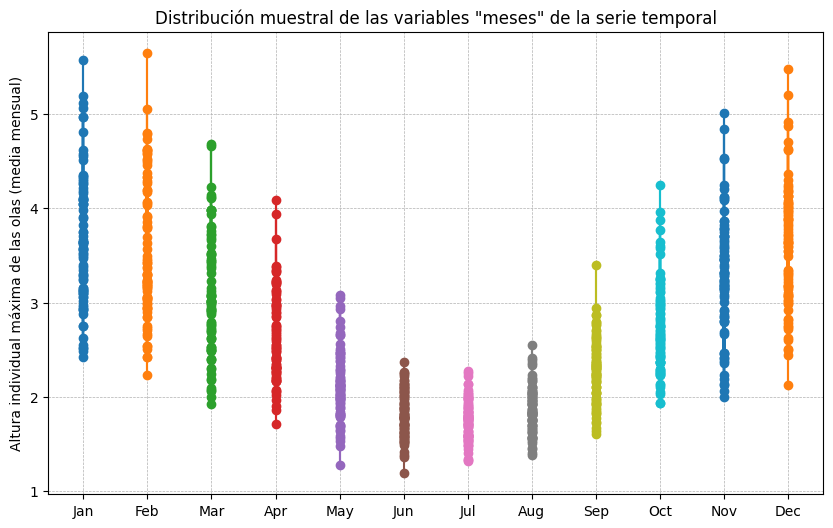

In [ ]:
# distribución muestral de las variables 'meses'
plt.figure(figsize=(10, 6))

for df_mes in st_Maximum_individual_wave_por_mes:
    plt.plot(df_mes.index.strftime('%b'), df_mes['Maximum individual wave height - media'], marker='o', linestyle='-', label=f'Mes {df_mes.index.month}')

plt.title('Distribución muestral de las variables "meses" de la serie temporal')
plt.ylabel('Altura individual máxima de las olas (media mensual)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
# estadísticos de las variables 'meses' del proceso estocático

print('MES         MEDIA               DESVIACIÓN TÍPICA    MÍNIMO               MÁXIMO               PERCENTIL 0.25       PERCENTIL 0.50       PERCENTIL 0.75')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------')

for df_mensual in st_Maximum_individual_wave_por_mes:
    mes = df_mensual.index.month[0]  # Obtener el mes del DataFrame
    nombre_mes = df_mensual.index.month_name()[0].upper()  # Obtener el nombre del mes
    media = df_mensual["Maximum individual wave height - media"].mean()
    desviacion = df_mensual["Maximum individual wave height - media"].std()
    minimo = df_mensual["Maximum individual wave height - media"].min()
    maximo = df_mensual["Maximum individual wave height - media"].max()
    percentil_25 = df_mensual["Maximum individual wave height - media"].quantile(0.25)
    percentil_50 = df_mensual["Maximum individual wave height - media"].quantile(0.50)
    percentil_75 = df_mensual["Maximum individual wave height - media"].quantile(0.75)

    print(f'{nombre_mes:<10} {media:<20} {desviacion:<20} {minimo:<20} {maximo:<20} {percentil_25:<20} {percentil_50:<20} {percentil_75:<20}')

MES         MEDIA               DESVIACIÓN TÍPICA    MÍNIMO               MÁXIMO               PERCENTIL 0.25       PERCENTIL 0.50       PERCENTIL 0.75
---------------------------------------------------------------------------------------------------------------------------------------------------------------------
JANUARY    3.6682991476619944   0.6983186067836749   2.4237648646036782   5.566449165344238    3.1280037562052407   3.625066121419271    4.109988848368327   
FEBRUARY   3.5566199545766795   0.7315619139768942   2.2304986317952475   5.64158821105957     3.035010973612468    3.30341911315918     4.188677469889323   
MARCH      3.080886818113781    0.6301252478857954   1.9235986073811848   4.683957099914551    2.6235012213389077   3.0139942169189453   3.5108960469563804  
APRIL      2.6533359724377825   0.4771877814402757   1.7116591135660808   4.091416676839192    2.3043467998504643   2.5511452356974287   2.979185263315837   
MAY        2.125006936845325    0.3591516834747749

**Diagramas de caja de las distribuciones muestrales de las variables 'meses' del proceso estocástico.**

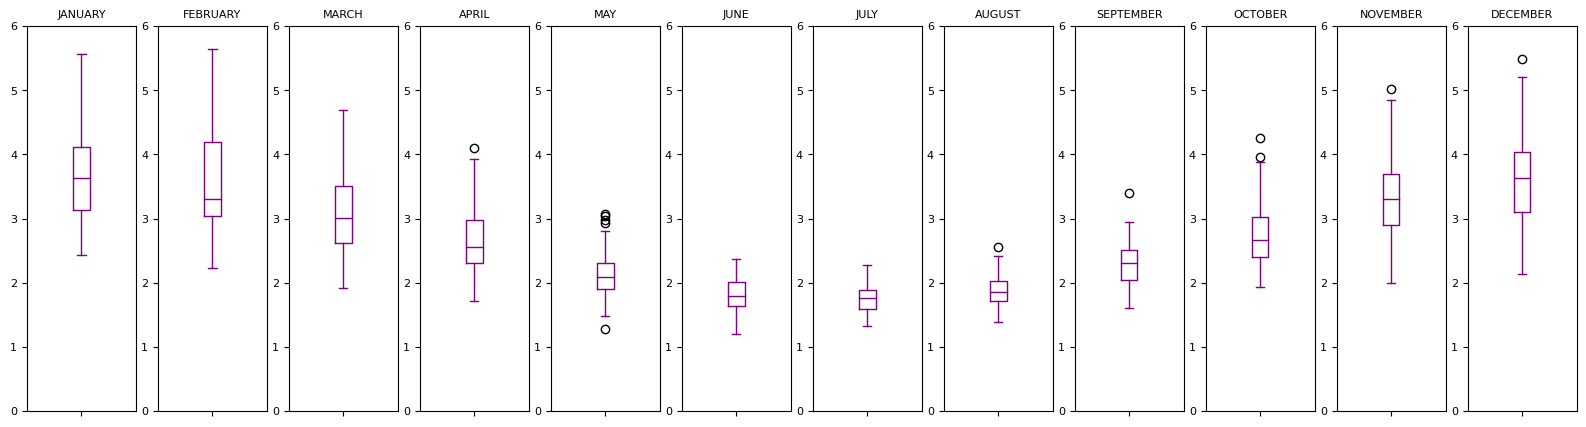

In [ ]:
import calendar

fig, axes = plt.subplots(nrows=1, ncols=12, figsize=(20, 5)) # cuadrícula de subgráficos

# diagrama de cajas de la distribución de cada mes
for i, df_mensual in enumerate(st_Maximum_individual_wave_por_mes):
    mes_numero = df_mensual.index.month[0]
    nombre_mes = calendar.month_name[mes_numero].upper()

    df_mensual.plot.box(ax=axes[i], color='purple', fontsize=8)
    axes[i].set_ylim(0, 6)
    axes[i].set_title(nombre_mes, fontsize=8)
    axes[i].set_xticklabels([])  # se elimina los nombres de los ticks del eje X

**Diagramas de caja con los valores de los estadísticos de las distribuciones muestrales de las variables 'meses' del proceso estocástico.**

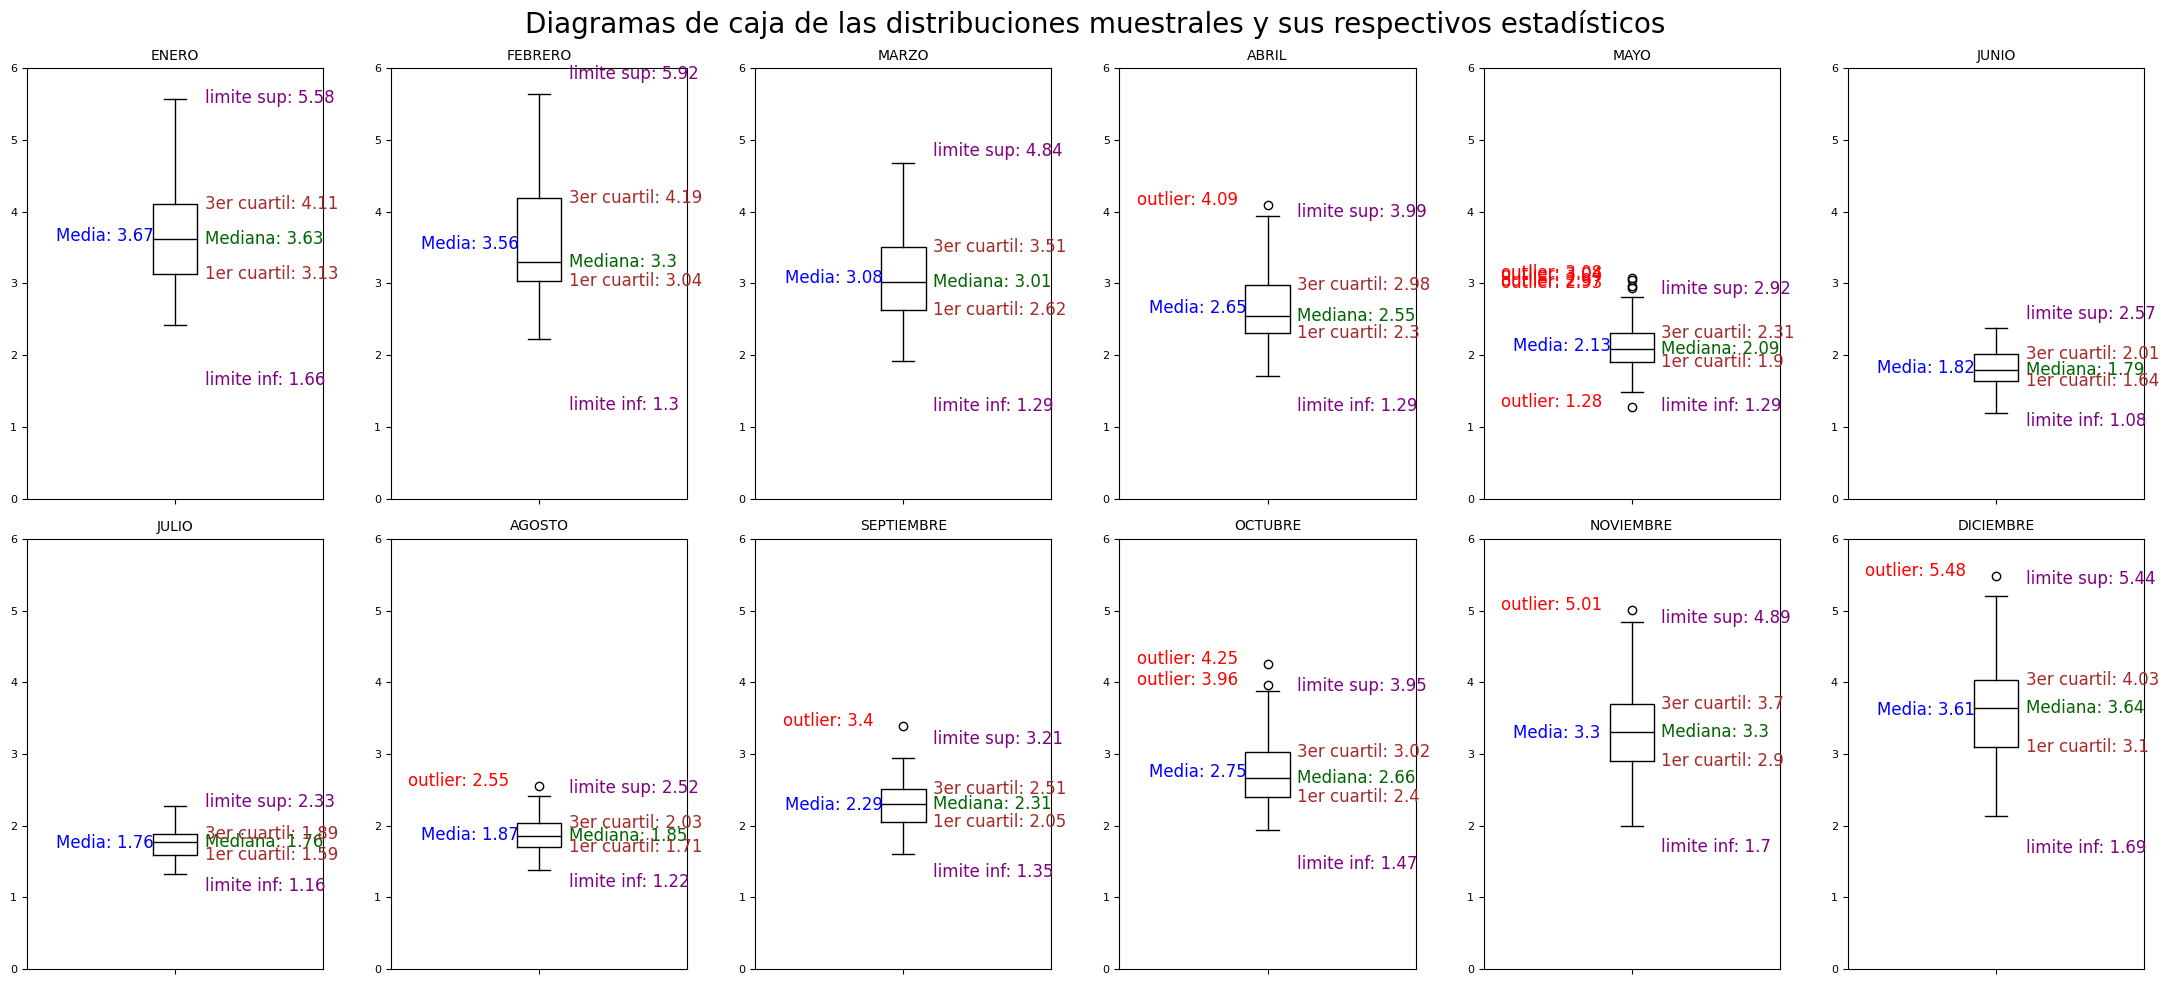

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(22, 10)) # cuadrícula de subgráficos

meses = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']

for i, df_mensual in enumerate(st_Maximum_individual_wave_por_mes):
    fila = i // 6  # determinamos la fila del subgráfico
    columna = i % 6  # determinamos la columna del subgráfico
    mes = meses[i]

    # Diagrama de caja
    df_mensual.plot.box(ax=axes[fila, columna], color='black', fontsize=8)
    axes[fila, columna].set_ylim(0, 6)
    axes[fila, columna].set_title(f'{mes}', fontsize=10)

    # Estadísticos
    median = np.median(df_mensual["Maximum individual wave height - media"])
    media = np.mean(df_mensual["Maximum individual wave height - media"])
    q1 = np.percentile(df_mensual["Maximum individual wave height - media"], 25)
    q3 = np.percentile(df_mensual["Maximum individual wave height - media"], 75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    valores_atipicos = [valor for valor in df_mensual["Maximum individual wave height - media"].values if valor < limite_inferior or valor > limite_superior]

    # Anotaciones
    annotations = [
        (median, f'Mediana: {round(median, 2)}', 'darkgreen'),
        (media, f'Media: {round(media, 2)}', 'blue'),
        (q1, f'1er cuartil: {round(q1, 2)}', 'brown'),
        (q3, f'3er cuartil: {round(q3, 2)}', 'brown'),
        (limite_inferior, f'limite inf: {round(limite_inferior, 2)}', 'purple'),
        (limite_superior, f'limite sup: {round(limite_superior, 2)}', 'purple'),
    ]

    # Posicionamiento de la media
    for value, text, color in annotations:
        if value == media:
            axes[fila, columna].text(0.6, value, text, ha='left', va='center', color=color, fontsize=12)
        else:
            axes[fila, columna].text(1.1, value, text, ha='left', va='center', color=color, fontsize=12)

    for valor in valores_atipicos:
        axes[fila, columna].text(0.9, valor, f'outlier: {round(float(valor), 2)}', ha='right', color='red', fontsize=12)

    axes[fila, columna].set_xticklabels([]) # se eliminan los nombres de los meses en el eje X

fig.suptitle(f'Diagramas de caja de las distribuciones muestrales y sus respectivos estadísticos', fontsize=20)

plt.tight_layout()
plt.show()


**Distribución de frecuencias**

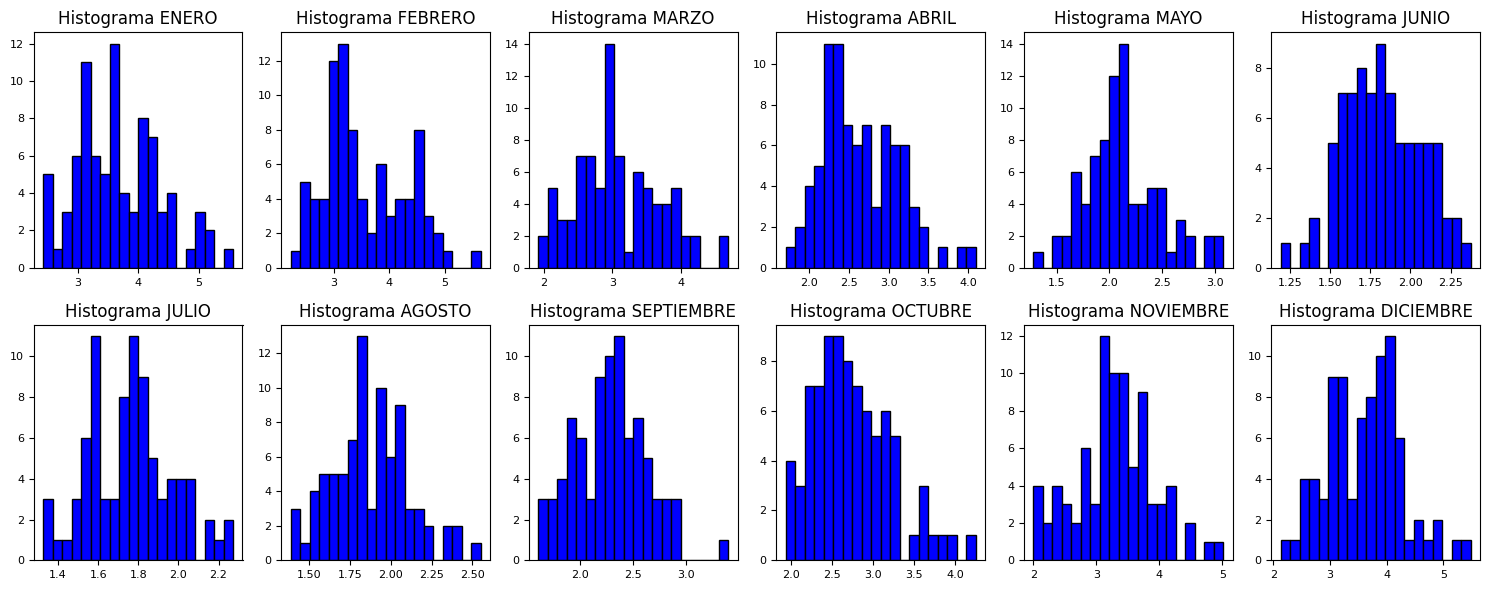

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15, 6)) # cuadrícula de subgráficos

meses = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']

# Iteración sobre los DataFrames y los ejes
for i, (df_mensual, mes) in enumerate(zip(st_Maximum_individual_wave_por_mes, meses), 1):
    fila = (i - 1) // 6  # fila del subgráfico
    columna = (i - 1) % 6  # columna del subgráfico

    # Histogramas
    df_mensual.hist(ax=axes[fila, columna], bins=20, color='blue', edgecolor='black')
    axes[fila, columna].set_title(f'Histograma {mes}', fontsize=12)
    axes[fila, columna].tick_params(axis='both', labelsize=8)
    axes[fila, columna].grid(False)

plt.tight_layout() # ajuste automático para evitar superposiciones
plt.show()

**Para conocer la variabilidad de cada mes con respecto a resto de los meses, se representa el diagrama de frecuencias con la misma escala en el eje X.**

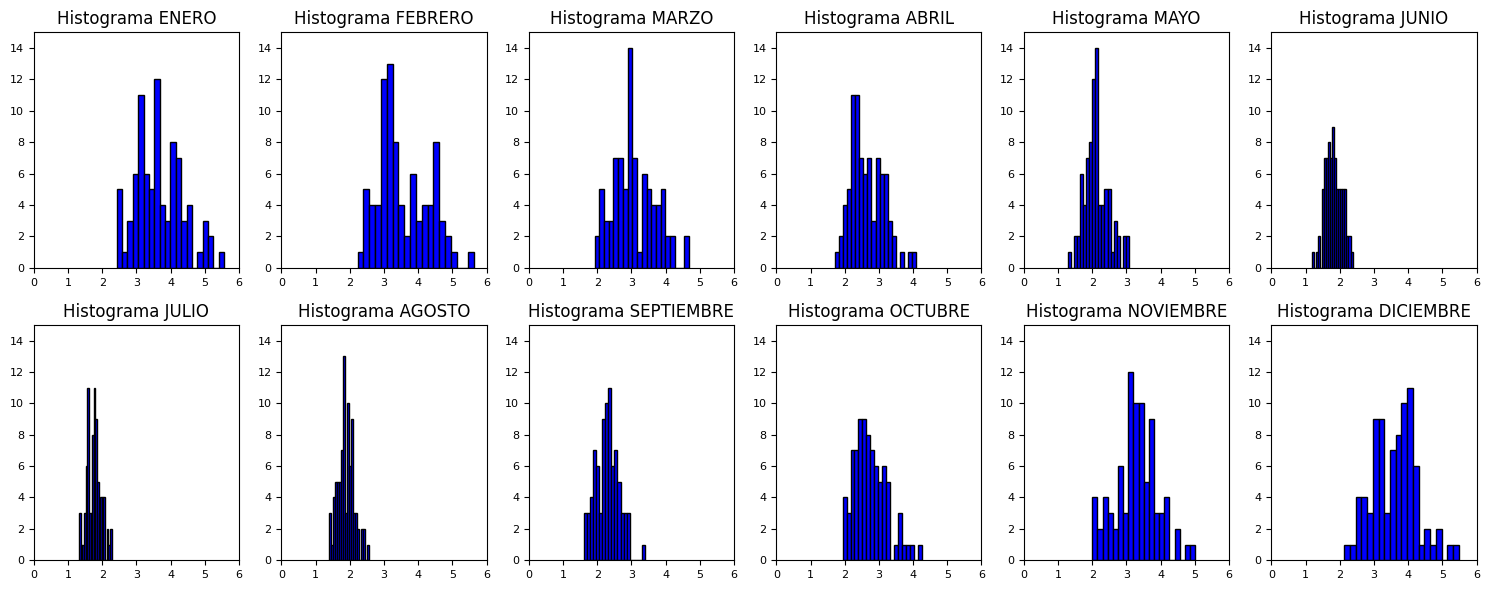

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15, 6)) # cuadrícula de subgráficos

# Definir los meses
meses = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']

# Nombre de la variable
nombre_variable = 'Maximum individual wave height- media'

# Iteración sobre los DataFrames y los ejes
for i, (df_mensual, mes) in enumerate(zip(st_Maximum_individual_wave_por_mes, meses), 1):
    fila = (i - 1) // 6  # determinamos la fila del subgráfico
    columna = (i - 1) % 6  # determinamos la columna del subgráfico

    # Histograma
    df_mensual.hist(ax=axes[fila, columna], bins=20, color='blue', edgecolor='black')
    axes[fila, columna].set_title(f'Histograma {mes}', fontsize=12)
    axes[fila, columna].set_xlim(0, 6)
    axes[fila, columna].set_ylim(0, 15)
    axes[fila, columna].tick_params(axis='both', labelsize=8)
    axes[fila, columna].grid(False)

plt.tight_layout() # ajuste automático para evitar superposiciones y mejorar la legibilidad
plt.show()


**Gráficos de probabilidad normal (Q-Q plot)**

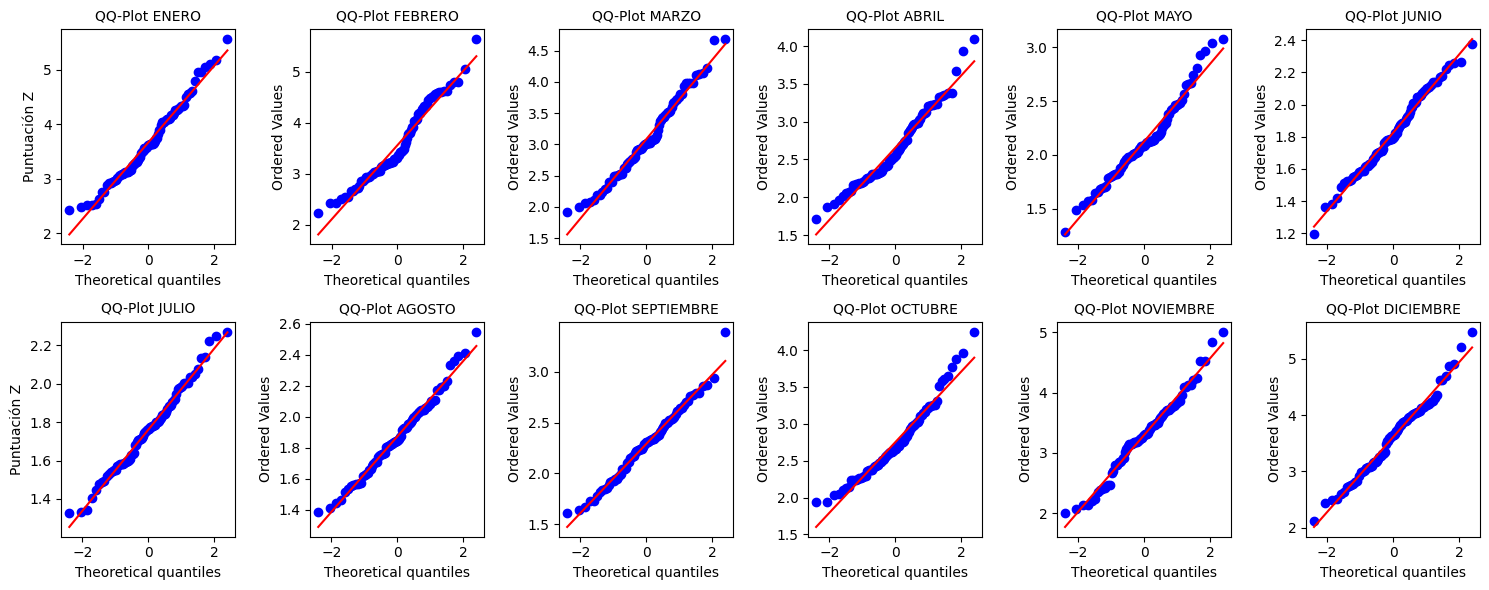

In [ ]:
from scipy import stats

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15, 6)) # cuadrícula de subgráficos
fig.subplots_adjust(hspace=0.5)  # ajuste del espacio vertical entre las filas de los gráficos

# Iteración sobre los meses y dibujar un QQ-plot en cada subgráfico
for i, (df_mensual, mes) in enumerate(zip(st_Maximum_individual_wave_por_mes, range(1, 13)), 1):
    fila = (i - 1) // 6  # fila del subgráfico
    columna = (i - 1) % 6  # columna del subgráfico

    stats.probplot(df_mensual['Maximum individual wave height - media'], plot=axes[fila, columna])
    axes[fila, columna].set_title(f'QQ-Plot {meses[mes - 1]}', fontsize=10)

    if columna == 0:
        axes[fila, columna].set_ylabel('Puntuación Z', fontsize=10)  # se etiqueta solo en la primera columna

    axes[fila, columna].tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.show()

**Gráfica de las medias de la altura máxima de las olas por año.**

<ipython-input-30-3847a27be8ec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered.index.to_series().dt.year


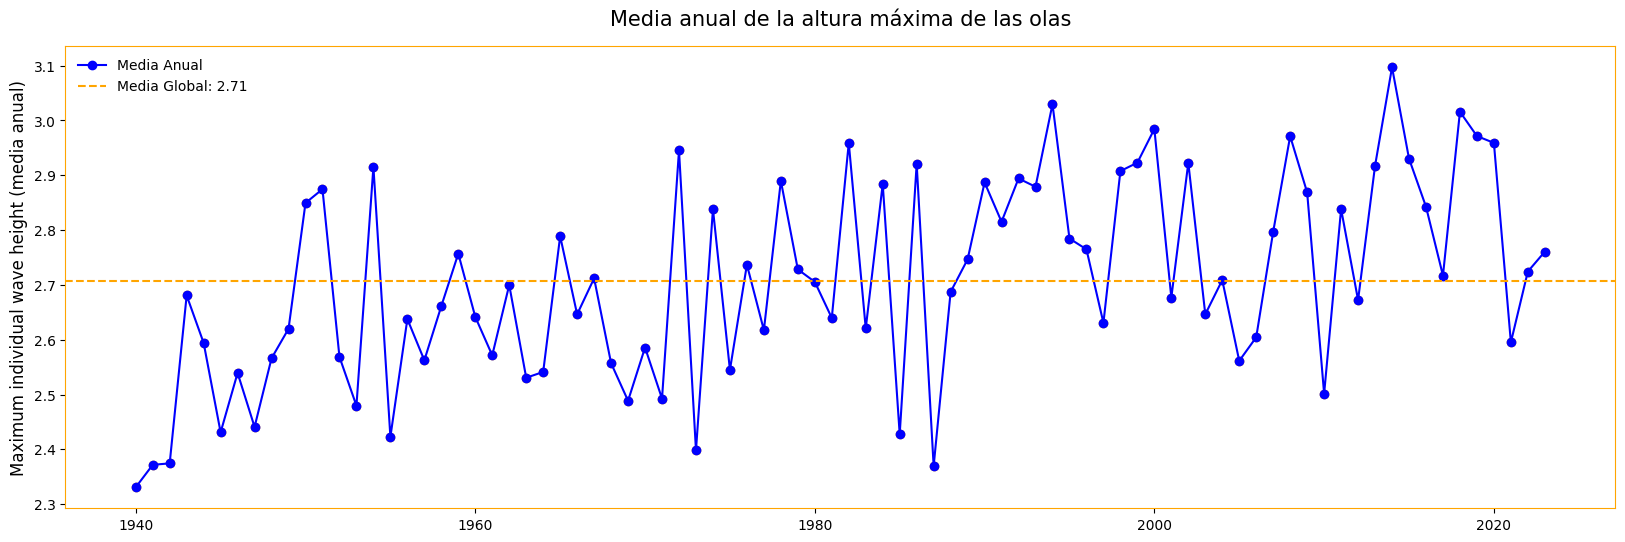

In [ ]:
# Filtramos los datos para excluir enero y febrero de 2024
df_filtered = st_Maximum_individual_wave[
    (st_Maximum_individual_wave.index < '2024-01-01') |
    (st_Maximum_individual_wave.index >= '2024-03-01')
]

# Crear una nueva columna 'Year' a partir del índice datetime
df_filtered['Year'] = df_filtered.index.to_series().dt.year

# Agrupar los datos por año y calculamos la media anual
annual_mean = df_filtered.groupby('Year')['Maximum individual wave height - media'].mean()

# Calcular la media global de la variable
global_mean = annual_mean.mean()

# Crear el gráfico de la serie temporal
plt.figure(figsize=(20, 6))

# Gráfico de la media anual con puntos en amarillo
plt.plot(annual_mean.index, annual_mean.values, marker='o', linestyle='-', color='b', label='Media Anual')
plt.scatter(annual_mean.index, annual_mean.values, color='orange')

# Línea de la media global
plt.axhline(global_mean, color='orange', linestyle='--', label=f'Media Global: {global_mean:.2f}')

# Personalizaciones del gráfico
plt.title('Media anual de la altura máxima de las olas', fontsize=15, pad=15)
plt.ylabel('Maximum individual wave height (media anual)', fontsize=12)

# Cambiar el color del borde del gráfico a naranja
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('orange')

# Añadir leyenda
plt.legend(loc='upper left', frameon=False)

# Mostrar el gráfico
plt.show()


<ipython-input-22-e27731662541>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered.index.to_series().dt.year


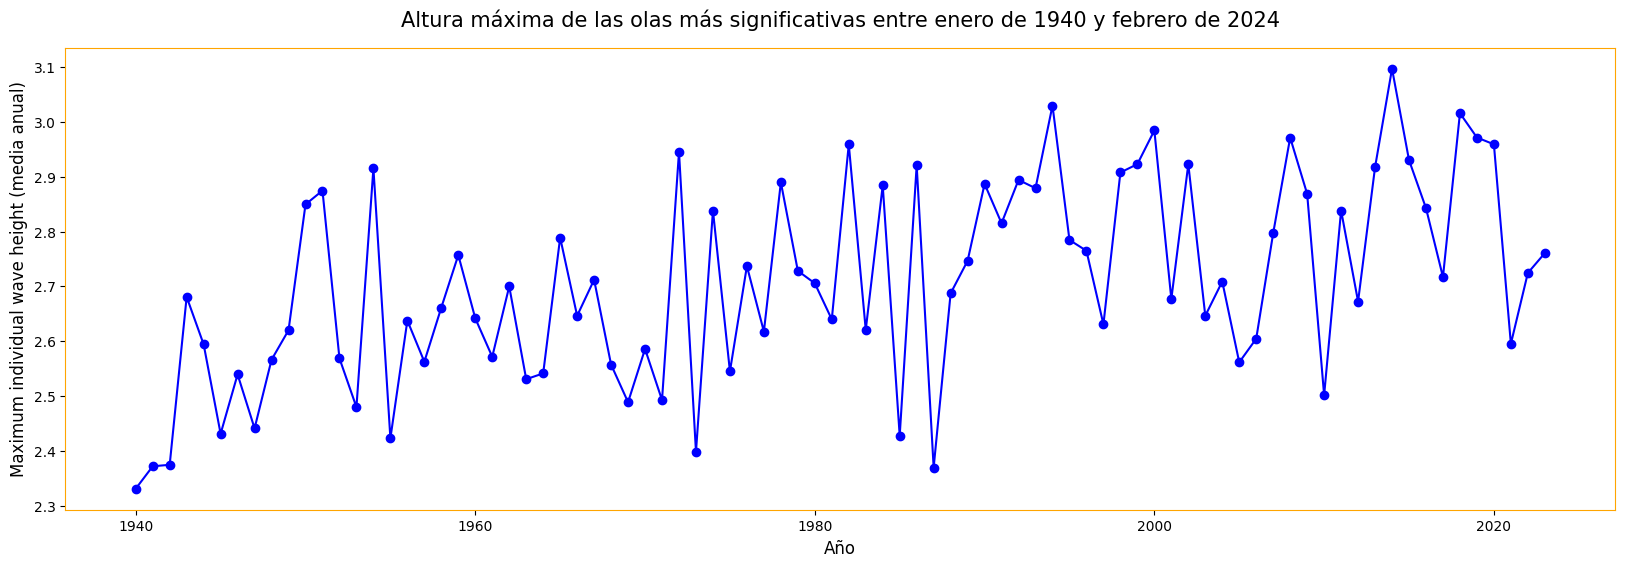

In [ ]:
# Filtar los datos para excluir enero y febrero de 2024
df_filtered = st_Maximum_individual_wave[
    (st_Maximum_individual_wave.index < '2024-01-01') |
    (st_Maximum_individual_wave.index >= '2024-03-01')
]

# Crear una nueva columna 'Year' a partir del índice datetime
df_filtered['Year'] = df_filtered.index.to_series().dt.year

# Agrupar los datos por año y calculamos la media anual
annual_mean = df_filtered.groupby('Year')['Maximum individual wave height - media'].mean()

# Crear el gráfico de la serie temporal
plt.figure(figsize=(20, 6))

plt.plot(annual_mean.index, annual_mean.values, marker='o', linestyle='-', color='b')

plt.title('Altura máxima de las olas más significativas entre enero de 1940 y febrero de 2024', fontsize=15, pad=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Maximum individual wave height (media anual)', fontsize=12)

# Cambiar el color del borde del gráfico a naranja
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('orange')

# Mostrar el gráfico
plt.show()


#### **4.2. Análisis de correlación de la variable 'Maximum individual wave height' con otras variables climáticas.**

**Definición de las variables climáticas que pueden influir en la serie temporal 'Maximum individual wave height'.**

In [ ]:
variables_climaticas = ['Maximum individual wave height - media', 'Air density over the oceans - media', 'Coefficient of drag with waves - media', 'Free convective velocity over the oceans - media',
                        'Instantaneous surface sensible heat flux - media', 'Mean direction of total swell - media', 'Mean direction of wind waves - media', 'Mean period of total swell - media', 'Mean period of wind waves - media',
                        'Mean square slope of waves - media', 'Mean wave direction - media', 'Mean wave direction of first swell partition - media', 'Mean wave direction of second swell partition - media',
                        'Mean wave direction of third swell partition - media', 'Mean wave period - media', 'Mean wave period based on first moment - media', 'Mean wave period based on first moment for swell - media',
                        'Mean wave period based on first moment for wind waves - media', 'Mean wave period based on second moment for swell - media', 'Mean wave period based on second moment for wind waves - media',
                        'Mean wave period of first swell partition - media', 'Mean wave period of second swell partition - media', 'Mean wave period of third swell partition - media', 'Mean zero-crossing wave period - media',
                        'Model bathymetry - media', 'Normalized energy flux into ocean - media', 'Normalized energy flux into waves - media', 'Normalized stress into ocean - media', '10 metre wind direction - media',
                        '10 metre wind speed - media', 'Peak wave period - media', 'Period corresponding to maximum individual wave height - media', 'Significant height of combined wind waves and swell - media',
                        'Significant height of total swell - media', 'Significant height of wind waves - media', 'Significant wave height of first swell partition - media', 'Significant wave height of second swell partition - media',
                        'Significant wave height of third swell partition - media', 'Wave spectral directional width - media', 'Wave spectral directional width for swell - media', 'Wave spectral directional width for wind waves - media',
                        'Wave spectral kurtosis - media', 'Wave spectral peakedness - media','Wave Spectral Skewness - media','Friction velocity - media','Instantaneous 10 metre wind gust - media','Surface latent heat flux - media'
]

**Extracción de los datos del dataset df_datos para el análisis de correlación lineal entre variables.**

In [ ]:
df_correlacion = df_datos[variables_climaticas]
df_correlacion

Maximum individual wave height - media  \
1940-01-01                                2.423765   
1940-02-01                                2.896097   
1940-03-01                                2.077796   
1940-04-01                                2.184891   
1940-05-01                                1.789831   
...                                            ...   
2023-10-01                                2.825013   
2023-11-01                                4.097411   
2023-12-01                                3.596773   
2024-01-01                                3.126788   
2024-02-01                                4.037317   

            Air density over the oceans - media  \
1940-01-01                             1.246275   
1940-02-01                             1.231941   
1940-03-01                             1.229107   
1940-04-01                             1.230142   
1940-05-01                             1.215846   
...                                         ...   
2023-10-01                             1.189931   
2023-11-01                             1.216603   
2023-12-01                             1.235656   
2024-01-01                             1.236663   
2024-02-01                             1.231668   

            Coefficient of drag with waves - media  \
1940-01-01                                0.000879   
1940-02-01                                0.000853   
1940-03-01                                0.000860   
1940-04-01                                0.000835   
1940-05-01                                0.000877   
...                                            ...   
2023-10-01                                0.000890   
2023-11-01                                0.000980   
2023-12-01                                0.000935   
2024-01-01                                0.000859   
2024-02-01                                0.000988   

            Free convective velocity over the oceans - media  \
1940-01-01                                          0.563487   
1940-02-01                                          0.331838   
1940-03-01                                          0.386922   
1940-04-01                                          0.452993   
1940-05-01                                          0.434957   
...                                                      ...   
2023-10-01                                          0.452461   
2023-11-01                                          0.556577   
2023-12-01                                          0.527120   
2024-01-01                                          0.452850   
2024-02-01                                          0.478973   

            Instantaneous surface sensible heat flux - media  \
1940-01-01                                        -10.999420   
1940-02-01                                          1.092821   
1940-03-01                                         -6.176627   
1940-04-01                                        -15.709529   
1940-05-01                                        -20.228210   
...                                                      ...   
2023-10-01                                         -0.499593   
2023-11-01                                         -4.507965   
2023-12-01                                         -1.232521   
2024-01-01                                         -2.419965   
2024-02-01                                         -1.641357   

            Mean direction of total swell - media  \
1940-01-01                             326.929281   
1940-02-01                             303.897420   
1940-03-01                             326.097534   
1940-04-01                             317.824707   
1940-05-01                             323.300293   
...                                           ...   
2023-10-01                             313.390991   
2023-11-01                             313.292419   
2023-12-01                             312.553324   
2024-01-01                       

**Necesitamos normalizar las variables para que todas se encuentren en las misma unidades. Se utiliza la estandarización z-score para transformar las vaariables con media 0 y desviación típica 1.**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializar el objeto StandardScaler
scaler = StandardScaler()

# Normalización de las variables
df_correlacion_normalizado = scaler.fit_transform(df_correlacion)
df_correlacion_normalizado = pd.DataFrame(df_correlacion_normalizado, columns=df_correlacion.columns, index=df_correlacion.index) # los datos normalizados en un DataFrame

df_correlacion_normalizado.head()

Maximum individual wave height - media  \
1940-01-01                               -0.330842   
1940-02-01                                0.217222   
1940-03-01                               -0.732283   
1940-04-01                               -0.608016   
1940-05-01                               -1.066419   

            Air density over the oceans - media  \
1940-01-01                             1.419673   
1940-02-01                             0.624720   
1940-03-01                             0.467556   
1940-04-01                             0.524992   
1940-05-01                            -0.267810   

            Coefficient of drag with waves - media  \
1940-01-01                               -0.232024   
1940-02-01                               -0.676497   
1940-03-01                               -0.550779   
1940-04-01                               -0.965743   
1940-05-01                               -0.262534   

            Free convective velocity over the oceans - media  \
1940-01-01                                         -0.018125   
1940-02-01                                         -2.380573   
1940-03-01                                         -1.818802   
1940-04-01                                         -1.144987   
1940-05-01                                         -1.328925   

            Instantaneous surface sensible heat flux - media  \
1940-01-01                                          0.327383   
1940-02-01                                          1.569674   
1940-03-01                                          0.822850   
1940-04-01                                         -0.156508   
1940-05-01                                         -0.620733   

            Mean direction of total swell - media  \
1940-01-01                               0.413905   
1940-02-01                              -1.304011   
1940-03-01                               0.351866   
1940-04-01                              -0.265193   
1940-05-01                               0.143224   

            Mean direction of wind waves - media  \
1940-01-01                             -0.247923   
1940-02-01                             -0.386980   
1940-03-01                             -0.392227   
1940-04-01                             -0.662022   
1940-05-01                             -0.570547   

            Mean period of total swell - media  \
1940-01-01                            0.436224   
1940-02-01                            1.456234   
1940-03-01                           -0.452394   
1940-04-01                           -0.359373   
1940-05-01                           -1.006855   

            Mean period of wind waves - media  \
1940-01-01                          -0.828591   
1940-02-01                           0.275624   
1940-03-01                          -0.299710   
1940-04-01                          -0.700176   
1940-05-01                           0.265736   

            Mean square slope of waves - media  ...  \
1940-01-01                           -0.266220  ...   
1940-02-01                           -0.557777  ...   
1940-03-01                           -0.674968  ...   
1940-04-01                           -0.863863  ...   
1940-05-01                           -0.403427  ...   

            Significant wave height of third swell partition - media  \
1940-01-01                                           1.870705          
1940-02-01                                           1.323062          
1940-03-01                                           0.785249          
1940-04-01                                           0.005364          
1940-05-01                                           0.140528          

            Wave spectral directional width - media  \
1940-01-01                                 0.487422   
1940-02-01                                -1.007122   
1940-03-01                                 0.754488   
1940-04-01                                 0.413938   
1940-05-01        

**Se obtiene las variables con mayor coeficiente correlación lineal con nuestra variable de estudio.**

In [ ]:
# Calcular los coeficientes de correlación lineal
correlacion_lineal = df_correlacion_normalizado.corr()

# Definir los valores de los coeficientes de correlación
coeficiente_inferior = -0.75
coeficiente_superior = 0.75

# Imprimir las variables con un coeficiente de correlación fuera del rango deseado y crear el diagrama de dispersión
print(f'Coeficiente de correlación entre la variable \033[1mMaximum individual wave height- media\033[0m y las variables:\n')

i = 0 # contador

for j in range(1, len(correlacion_lineal)):
    if correlacion_lineal.iloc[0, j] <= coeficiente_inferior or correlacion_lineal.iloc[0, j] >= coeficiente_superior:
        variables = correlacion_lineal.index[0], correlacion_lineal.columns[j]
        i += 1 # aumnentamos en uno el contador de variables que cumplen la condición
        print(f'\t{i}. \033[1m{variables[1]}\033[0m: {correlacion_lineal.iloc[0, j]}')

Coeficiente de correlación entre la variable Maximum individual wave height- media y las variables:

	1. Mean period of total swell - media: 0.8654496677730876
	2. Mean square slope of waves - media: 0.8063367507236173
	3. Mean wave period - media: 0.8437106033954451
	4. Mean wave period based on first moment - media: 0.8612382819225166
	5. Mean wave period based on first moment for swell - media: 0.8978492258585298
	6. Mean wave period based on first moment for wind waves - media: 0.7866863126126773
	7. Mean wave period based on second moment for swell - media: 0.927732972832354
	8. Mean wave period of first swell partition - media: 0.8349800286085761
	9. Mean zero-crossing wave period - media: 0.8782569014599789
	10. Peak wave period - media: 0.8303206831916914
	11. Period corresponding to maximum individual wave height - media: 0.8508539065069037
	12. Significant height of combined wind waves and swell - media: 0.9997964050053493
	13. Significant height of total swell - media: 0.997

Coeficiente de correlación entre la variable Maximum individual wave height- media y las variables:

	1. Mean period of total swell - media: 0.8654496677730876


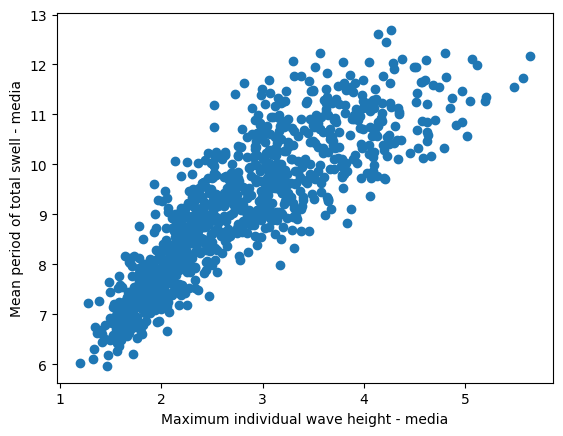

	2. Mean square slope of waves - media: 0.8063367507236173


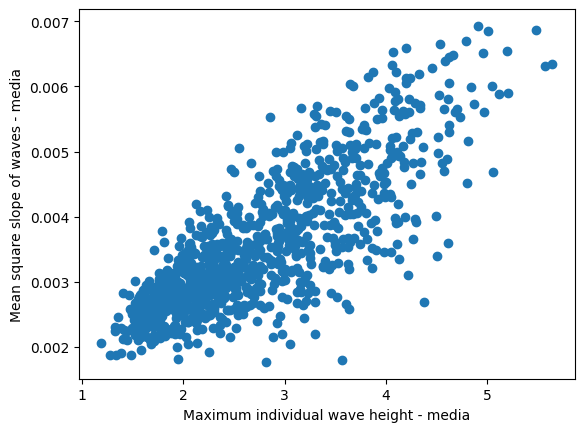

	3. Mean wave period - media: 0.8437106033954451


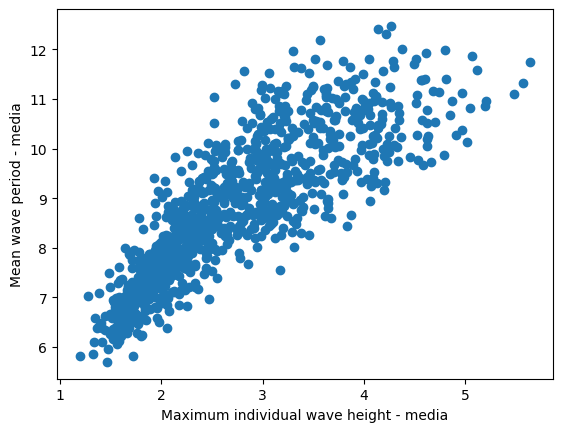

	4. Mean wave period based on first moment - media: 0.8612382819225166


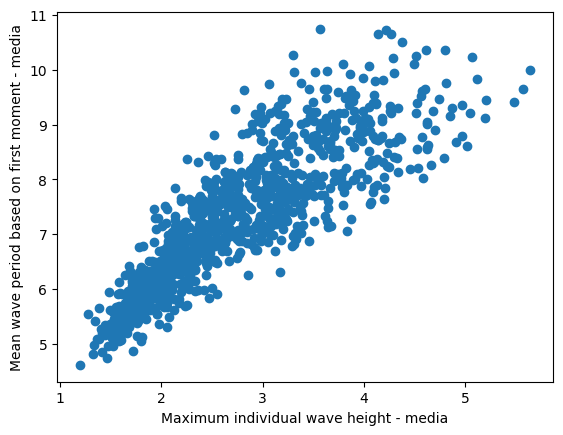

	5. Mean wave period based on first moment for swell - media: 0.8978492258585298


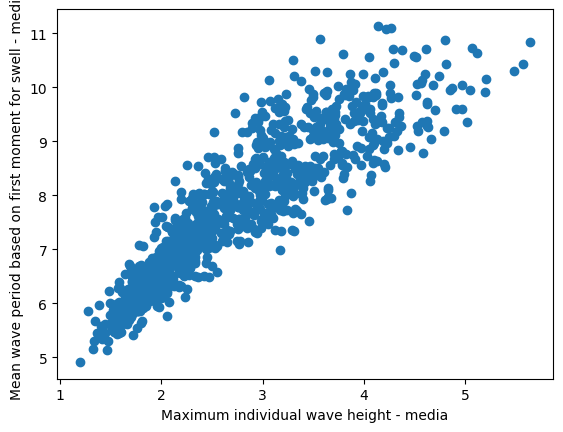

	6. Mean wave period based on first moment for wind waves - media: 0.7866863126126773


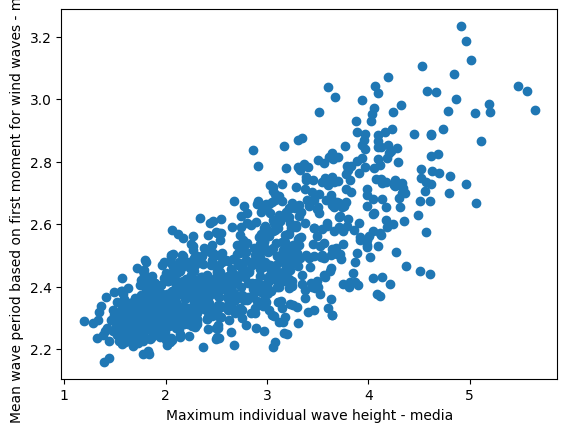

	7. Mean wave period based on second moment for swell - media: 0.927732972832354


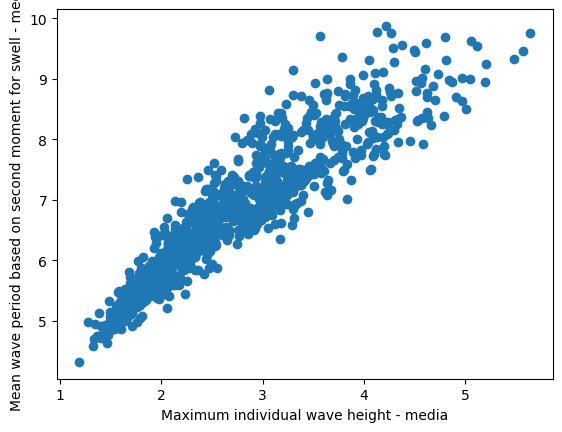

	8. Mean wave period of first swell partition - media: 0.8349800286085761


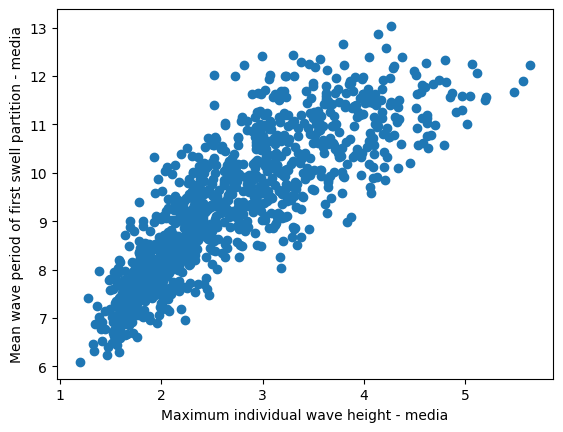

	9. Mean zero-crossing wave period - media: 0.8782569014599789


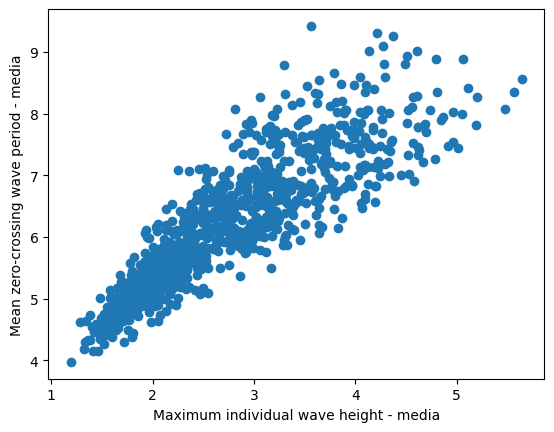

	10. Peak wave period - media: 0.8303206831916914


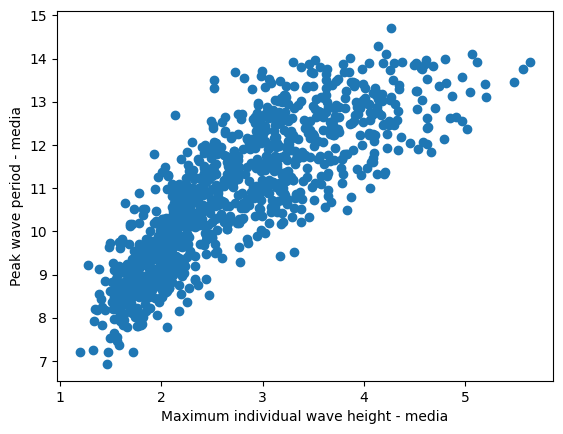

	11. Period corresponding to maximum individual wave height - media: 0.8508539065069037


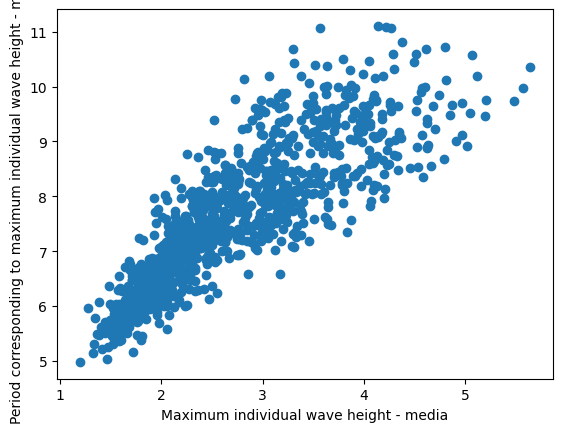

	12. Significant height of combined wind waves and swell - media: 0.9997964050053493


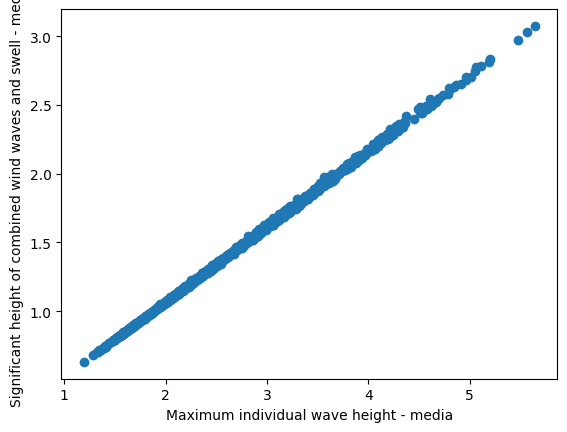

	13. Significant height of total swell - media: 0.9970439163526604


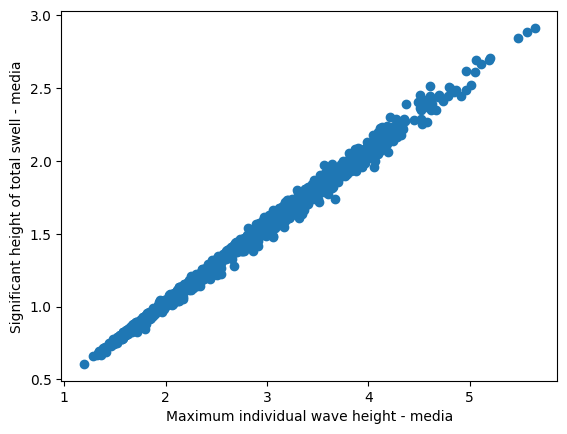

	14. Significant height of wind waves - media: 0.7764513650604274


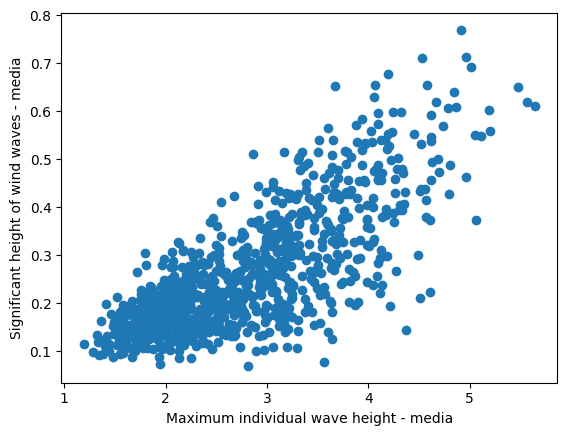

	15. Significant wave height of first swell partition - media: 0.9949818861183342


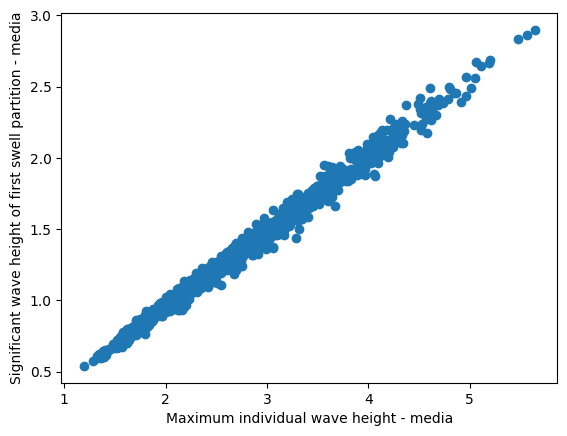

	16. Friction velocity - media: 0.7903301058512676


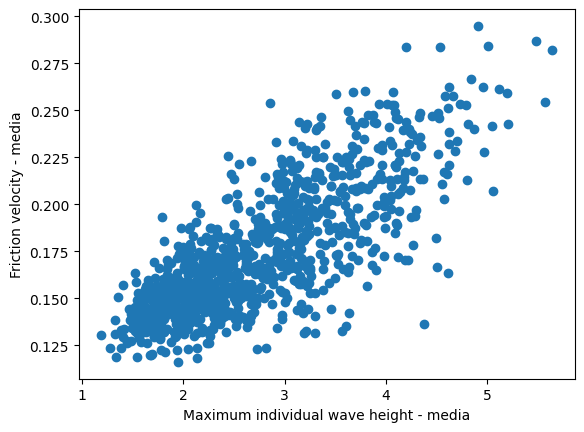

	17. Instantaneous 10 metre wind gust - media: 0.7958113390195564


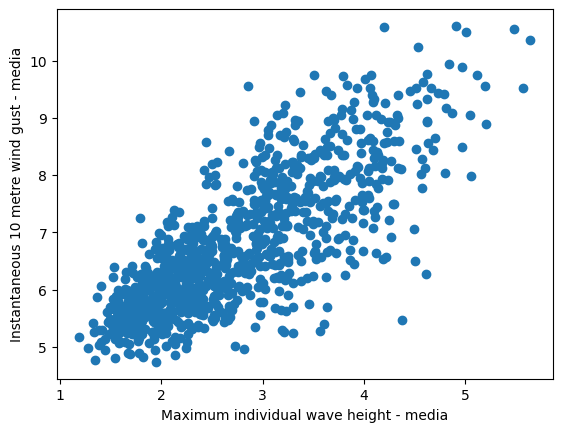

In [ ]:
# Calcular los coeficientes de correlación lineal
correlacion_lineal = df_correlacion_normalizado.corr()

# Definir los valores de los coeficientes de correlación
coeficiente_inferior = -0.75
coeficiente_superior = 0.75

i = 0 # contador

# Imprimir las variables con un coeficiente de correlación fuera del rango deseado y crear el diagrama de dispersión
print(f'Coeficiente de correlación entre la variable \033[1mMaximum individual wave height- media\033[0m y las variables:\n')

for j in range(1, len(correlacion_lineal)):
    if correlacion_lineal.iloc[0, j] <= coeficiente_inferior or correlacion_lineal.iloc[0, j] >= coeficiente_superior:
        variables = correlacion_lineal.index[0], correlacion_lineal.columns[j]
        i += 1 # aumnentamos en uno el contador de variables que cumplen la condición
        print(f'\t{i}. \033[1m{variables[1]}\033[0m: {correlacion_lineal.iloc[0, j]}')

        fig, ax = plt.subplots() # Crear una figura para el diagrama de dispersión
        ax.scatter(x=df_correlacion[correlacion_lineal.index[0]], y=df_correlacion[correlacion_lineal.index[j]], label=f'{variables[1]}')

        # Añadir etiquetas y leyenda al diagrama de dispersión
        ax.set_xlabel(correlacion_lineal.index[0])
        ax.set_ylabel(correlacion_lineal.index[j])

        plt.show()

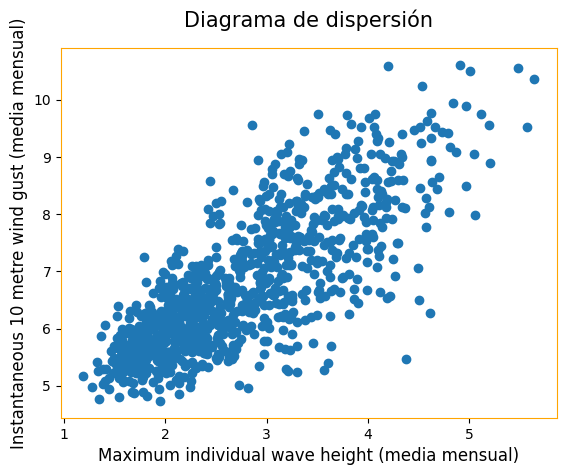

In [ ]:
# Gráfico
fig, ax = plt.subplots()
ax.scatter(x = df_correlacion['Maximum individual wave height - media'], y = df_correlacion['Instantaneous 10 metre wind gust - media'])

# Establecer etiquetas y título
plt.title('Diagrama de dispersión', fontsize=15, pad=15)
plt.xlabel('Maximum individual wave height (media mensual)', fontsize=12)
plt.ylabel('Instantaneous 10 metre wind gust (media mensual)', fontsize=12)

# Cambiar el color del borde del gráfico a naranja
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('orange')

# Mostrar el gráfico
plt.show()

### **5.EDA: Análisis Descriptivo de la SERIE TEMPORAL "st_Maximum_individual_wave".**

**La serie temporal original se llama "st_Maximum_individual_wave".**

#### **5.1. Análisis descriptivo de la serie temporal "st_Maximum_individual_wave".**



In [ ]:
# media de la serie temporal
print(f'La media muestral: {round(st_Maximum_individual_wave["Maximum individual wave height - media"].mean(), 2)}')

# mediana de la serie temporal
print(f'La mediana muestral: {round(st_Maximum_individual_wave["Maximum individual wave height - media"].median(), 2)}')

# mínima de la serie temporal
print(f'El valor mínimo muestral: {round(st_Maximum_individual_wave["Maximum individual wave height - media"].min(), 2)}')

# máxima de la serie temporal
print(f'El valor máximo muestral: {round(st_Maximum_individual_wave["Maximum individual wave height - media"].max(), 2)}')

# varianza de la serie temporal
print(f'La varianza muestral: {round(st_Maximum_individual_wave["Maximum individual wave height - media"].var(), 2)}')

# desviación típica de la serie temporal
print(f'La desviación típica muestral: {round(st_Maximum_individual_wave["Maximum individual wave height - media"].std(), 2)}')


La media muestral: 2.71
La mediana muestral: 2.53
El valor mínimo muestral: 1.19
El valor máximo muestral: 5.64
La varianza muestral: 0.74
La desviación típica muestral: 0.86


**Se identifica las fechas en que las olas fueron más bajas y más altas.**

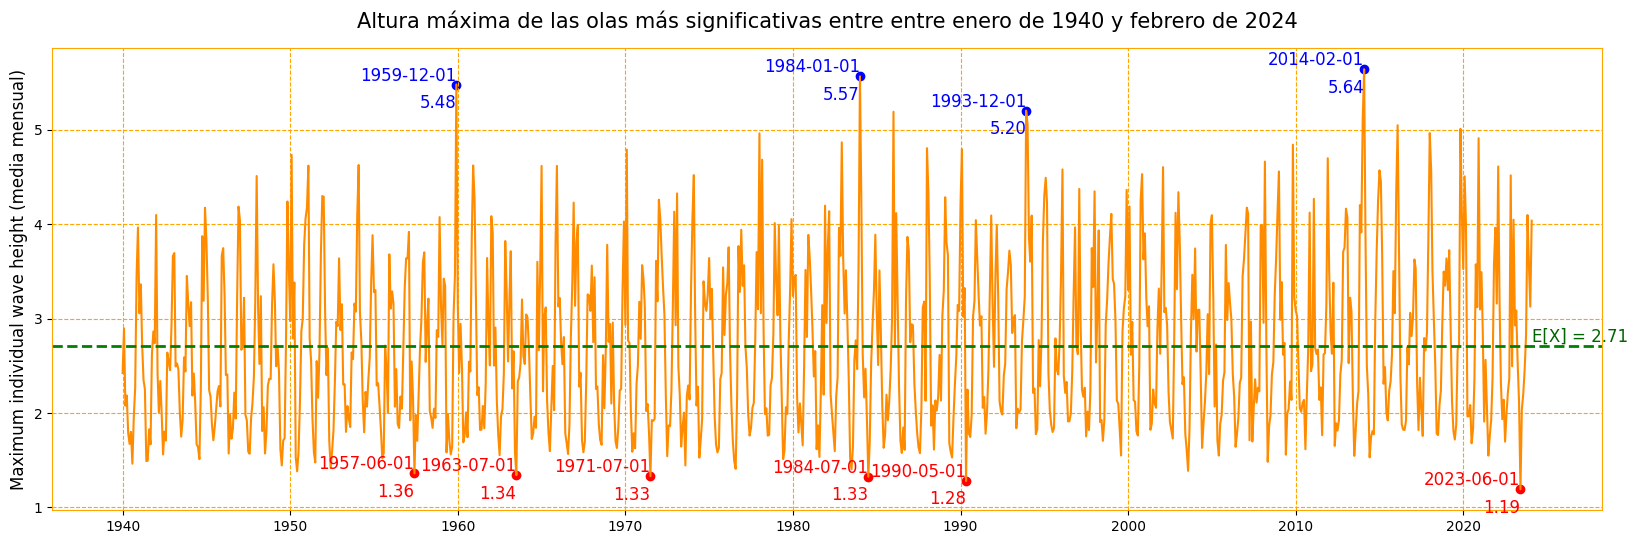

In [ ]:
# Definir el intervalo de la altura de las olas más pequeñas
limite_inferior_ola_pequeña = 1.0
limite_superior_ola_pequeña = 1.38

# Definir el intervalo de la altura de las olas más altas
limite_inferior_ola_grande = 5.2
limite_superior_ola_grande = 6.0

# Graficar la serie temporal
plt.figure(figsize=(20, 6))
plt.plot(st_Maximum_individual_wave.index, st_Maximum_individual_wave.values, color='darkorange')

# Dibujar la línea horizontal de la media de los valores observados
media_valores_observados = st_Maximum_individual_wave['Maximum individual wave height - media'].mean()
plt.axhline(y=media_valores_observados, color='green', linestyle='--', linewidth=2)

# Agregar el valor de la media en la línea
plt.text(st_Maximum_individual_wave.index[-1], media_valores_observados,f'E[X] = {media_valores_observados:.2f}', fontsize=12, ha='left', va='bottom', color='darkgreen')

# Encontrar los índices de los puntos dentro del intervalo de la altura de las olas pequeñas
indices_intervalo_ola_pequeña = (st_Maximum_individual_wave['Maximum individual wave height - media'] >= limite_inferior_ola_pequeña) & (st_Maximum_individual_wave['Maximum individual wave height - media'] <= limite_superior_ola_pequeña)

# Marcar los puntos dentro del intervalo de la altura de las olas pequeñas
plt.scatter(st_Maximum_individual_wave.index[indices_intervalo_ola_pequeña], st_Maximum_individual_wave['Maximum individual wave height - media'][indices_intervalo_ola_pequeña], color='red', label='Rango rojo')

# Encontrar los índices de los puntos dentro del intervalo de la altura de las olas grandes
indices_intervalo_ola_grande = (st_Maximum_individual_wave['Maximum individual wave height - media'] >= limite_inferior_ola_grande) & (st_Maximum_individual_wave['Maximum individual wave height - media'] <= limite_superior_ola_grande)

# Marcar los puntos dentro del intervalo de la altura de las olas grandes
plt.scatter(st_Maximum_individual_wave.index[indices_intervalo_ola_grande], st_Maximum_individual_wave['Maximum individual wave height - media'][indices_intervalo_ola_grande], color='blue', label='Rango azul')

# Agregar las fechas y valores en los puntos resaltados
for fecha, valor in zip(st_Maximum_individual_wave.index[indices_intervalo_ola_pequeña], st_Maximum_individual_wave['Maximum individual wave height - media'][indices_intervalo_ola_pequeña]):
    plt.text(fecha, valor, pd.to_datetime(fecha).strftime('%Y-%m-%d'), fontsize=12, ha='right', va='bottom', color='red')
    plt.text(fecha, valor - 0.1, f'{valor:.2f}', fontsize=12, ha='right', va='top', color='red')

for fecha, valor in zip(st_Maximum_individual_wave.index[indices_intervalo_ola_grande], st_Maximum_individual_wave['Maximum individual wave height - media'][indices_intervalo_ola_grande]):
    plt.text(fecha, valor, pd.to_datetime(fecha).strftime('%Y-%m-%d'), fontsize=12, ha='right', va='bottom', color='blue')
    plt.text(fecha, valor - 0.1, f'{valor:.2f}', fontsize=12, ha='right', va='top', color='blue')

# Establecer etiquetas y título
plt.title('Altura máxima de las olas más significativas entre entre enero de 1940 y febrero de 2024', fontsize=15, pad=15)
plt.ylabel('Maximum individual wave height (media mensual)',  fontsize=12)

plt.grid(True, color='orange', linestyle='--')

# Cambiar el color del borde del gráfico a naranja
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('orange')

# Mostrar el gráfico
plt.show()

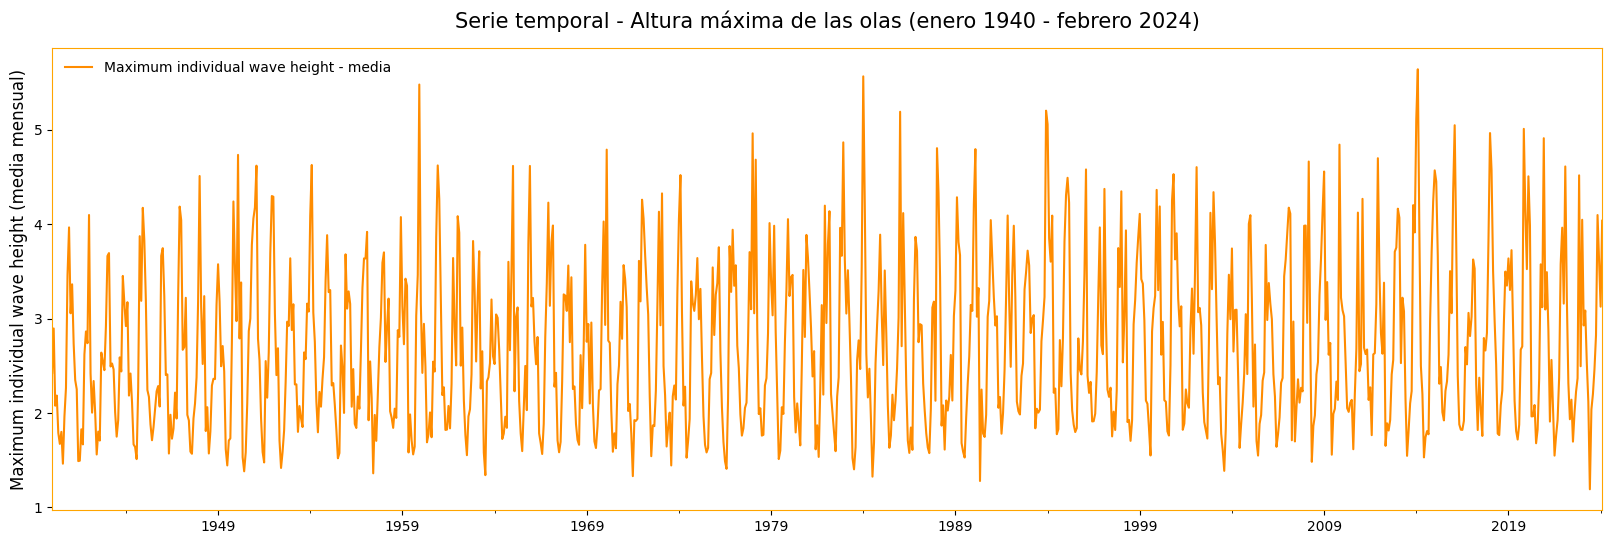

In [ ]:
# Representación gráfica de la serie
st_Maximum_individual_wave.plot(figsize=(20, 6), color='darkorange')

plt.title('Serie temporal - Altura máxima de las olas (enero 1940 - febrero 2024)', fontsize=15, pad=15)
plt.ylabel('Maximum individual wave height (media mensual)', fontsize=12)

plt.legend(frameon=False)

# Cambiar el color del borde del gráfico a naranja
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('orange')

**Tabla de frecuencias de los valores observados de la serie.**

In [ ]:
# Calcular la tabla de frecuencia
tabla_frecuencia = st_Maximum_individual_wave['Maximum individual wave height - media'].value_counts().reset_index()
tabla_frecuencia.columns = ['Valor', 'Frecuencia']

# Ordenar la tabla por los valores
tabla_frecuencia = tabla_frecuencia.sort_values(by='Valor')

# Filtrar para mostrar solo las frecuencias mayores que 1 para saber si la distribución de frecuencias es unimodal o multimodal
frecuencias_mayores_que_1 = tabla_frecuencia[tabla_frecuencia['Frecuencia'] > 1]

# Mostrar la tabla de frecuencia o el mensaje
if frecuencias_mayores_que_1.empty: # verifica si está vacia
    print('No hay frecuencias mayores que 1.')
else:
    print('Tabla de frecuencias con frecuencias mayores que 1:\n', frecuencias_mayores_que_1)

No hay frecuencias mayores que 1.


**Histograma de los valores observados de la serie temporal.**

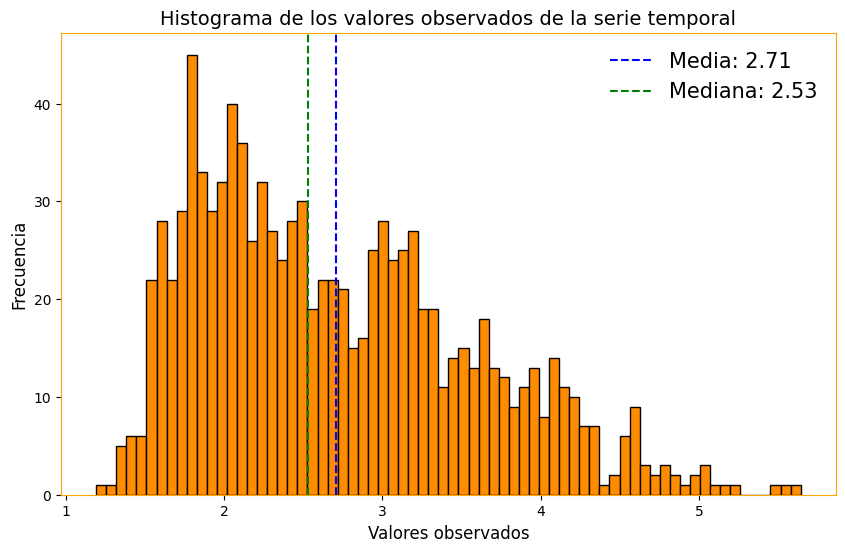

In [ ]:
# Calcular la media, la mediana y la moda
media = st_Maximum_individual_wave['Maximum individual wave height - media'].mean()
mediana = st_Maximum_individual_wave['Maximum individual wave height - media'].median()

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(st_Maximum_individual_wave['Maximum individual wave height - media'], bins=70, color='darkorange', edgecolor='black') # Puedes ajustar el número de bins según tu preferencia

# Agregar líneas verticales para la media, mediana y moda
plt.axvline(media, color='blue', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana: {mediana:.2f}')

plt.title('Histograma de los valores observados de la serie temporal', fontsize=14)
plt.xlabel('Valores observados', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Cambiar el color del borde del gráfico a naranja
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('orange')

# Agregar leyenda
plt.legend(frameon=False, fontsize=15)

plt.show()


**Gráfico QQ-plot, para verificar si la distribución en normal**

<Figure size 1000x600 with 0 Axes>

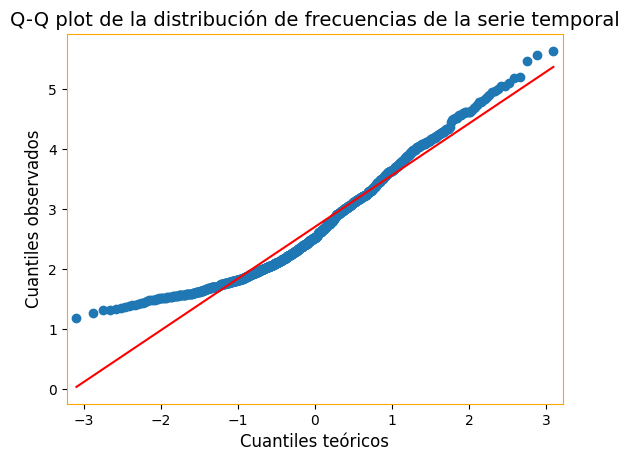

In [ ]:
import statsmodels.api as sm

# Crear el Q-Q plot
plt.figure(figsize=(10, 6))
sm.qqplot(st_Maximum_individual_wave['Maximum individual wave height - media'],  line='s')
          #line='s', markerfacecolor='darkorange')

plt.title('Q-Q plot de la distribución de frecuencias de la serie temporal', fontsize=14)
plt.xlabel('Cuantiles teóricos', fontsize=12)
plt.ylabel('Cuantiles observados', fontsize=12)

# Cambiar el color del borde del gráfico a naranja
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('orange')

plt.show()

**Prueba de Mann-Kendall para conocer la estacionariedad de la serie temporal con respecto a la media.**

In [ ]:
pip install pymannkendall

In [ ]:
from pymannkendall import original_test

# Nivel de significancia deseado (alfa)
nivel_significancia = 0.05

# Realizar la prueba de Mann-Kendall
resultados_mann_kendall = original_test(st_Maximum_individual_wave)

# Imprimir detalles adicionales de los resultados
print(f'Prueba de Mann-Kendall:')
print(f'Estadístico de prueba: {round(resultados_mann_kendall.z, 4)}')
print(f'p-valor: {resultados_mann_kendall.p}')

# Verificar la dirección de la tendencia
if resultados_mann_kendall[0] == 'increasing':
    print('Tendencia: ascendente \n')
elif resultados_mann_kendall[0] == 'decreasing':
    print('Tendencia: descendente \n')
else:
    print('No hay una tendencia clara en los datos \n')


# Comparar el valor p con el nivel de significancia
if resultados_mann_kendall.p < nivel_significancia:
    print(f'Se rechaza la hipótesis nula. Existe evidencia estadística para afirmar que hay una tendencia significativa en los datos.')
else:
    print(f'NO se rechaza la hipótesis nula. NO hay suficiente evidencia para concluir que hay una tendencia significativa en los datos.')

Prueba de Mann-Kendall:
Estadístico de prueba: 3.3158
p-valor: 0.0009136515947165691
Tendencia: ascendente 

Se rechaza la hipótesis nula. Existe evidencia estadística para afirmar que hay una tendencia significativa en los datos.


**Diagrama desviación típica - media para conocer la estacionariedad de la serie temporal con respecto a la varianza.**

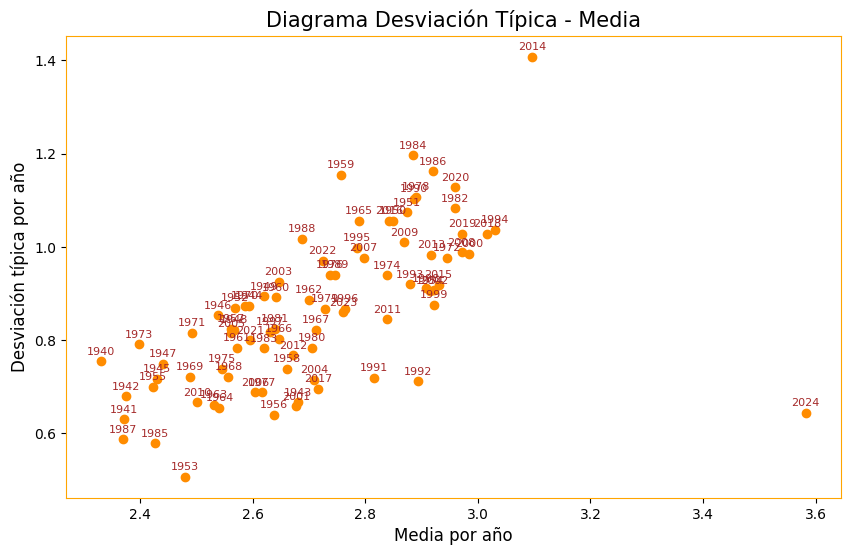

In [ ]:
# Cantidad de grupos de 12 datos
num_groups = len(st_Maximum_individual_wave) // 12

# Listas para almacenar las medias, las desviaciones estándar y los años de cada grupo
means = []
stds = []
years = []

# Iterar sobre los grupos de datos y calcular la media, la desviación estándar y el año para cada uno
for i in range(num_groups):
    group_start = i * 12
    group_end = (i + 1) * 12
    group_data = st_Maximum_individual_wave.iloc[group_start:group_end]
    group_mean = group_data.mean()
    group_std = group_data.std()
    group_year = st_Maximum_individual_wave.index[group_start].year  # Obtener el año del primer dato del grupo
    means.append(group_mean)
    stds.append(group_std)
    years.append(group_year)

# Calcular la media y desviación estándar para el último grupo (año 2024) que tiene menos de 12 datos
last_group_data = st_Maximum_individual_wave.iloc[num_groups * 12:]
last_group_mean = last_group_data.mean()
last_group_std = last_group_data.std()
last_group_year = st_Maximum_individual_wave.index[num_groups * 12].year  # obtener el año del primer dato del último grupo
means.append(last_group_mean)
stds.append(last_group_std)
years.append(last_group_year)

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(means, stds, color='darkorange')

plt.title('Diagrama Desviación Típica - Media', fontsize=15)
plt.xlabel('Media por año', fontsize=12)
plt.ylabel('Desviación típica por año', fontsize=12)

# Mostrar los años de cada punto en el gráfico
for i in range(len(means)):
    plt.text(means[i], stds[i] + 0.01, years[i], fontsize=8, ha='center', va='bottom', color='brown')

# Cambiar el color del borde del gráfico a naranja
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('orange')

plt.show()

**Coeficiente de variación de cada uno de los años de la serie temporal.**

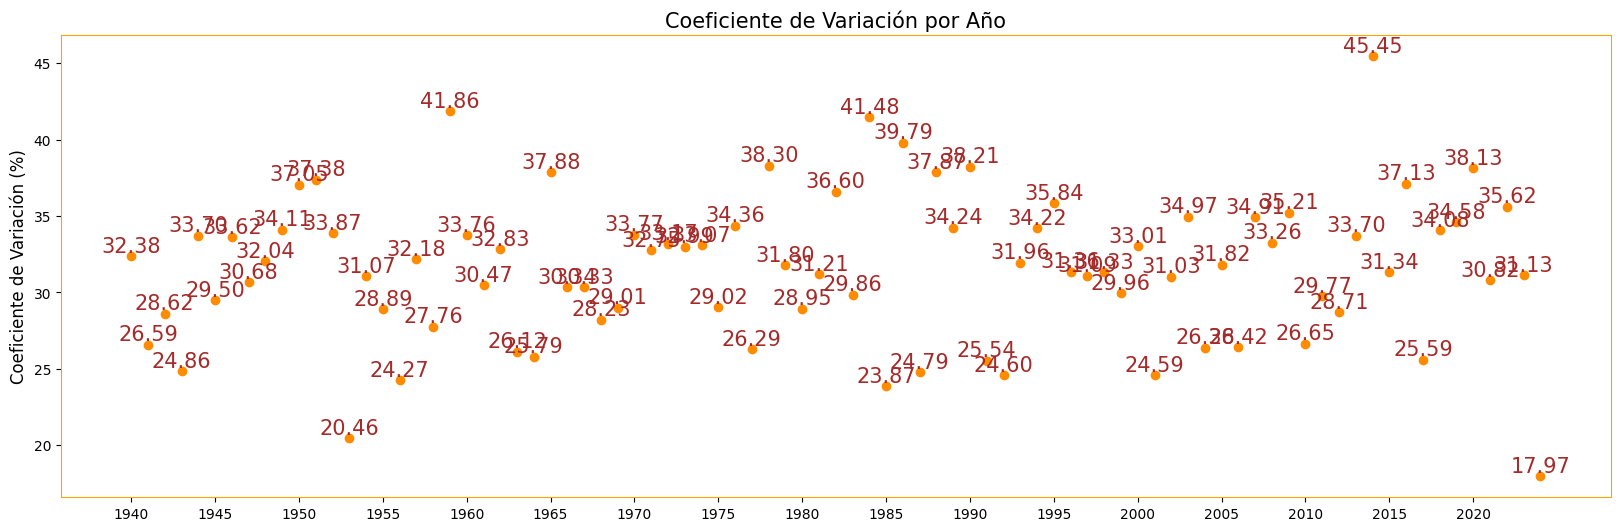

In [ ]:
# Calcular el coeficiente de variación para cada año
cv_por_anio = {}

# Agrupar los datos por año y calcular la media y la desviación estándar para cada año
for year, data_year in st_Maximum_individual_wave['Maximum individual wave height - media'].groupby(st_Maximum_individual_wave.index.year):
    mean_year = data_year.mean()
    std_year = data_year.std()

    # Calcular el coeficiente de variación
    cv_por_anio[year] = (std_year / mean_year) * 100  # Multiplicamos por 100 para expresarlo como porcentaje

# Convertir el diccionario a DataFrame para visualizar los resultados
cv_por_anio_df = pd.DataFrame.from_dict(cv_por_anio, orient='index', columns=['Coeficiente de Variación'])
cv_por_anio_df.index.name = 'Año'

# Crear el gráfico de dispersión
plt.figure(figsize=(20, 6))
plt.scatter(cv_por_anio_df.index, cv_por_anio_df['Coeficiente de Variación'], color='darkorange')

# Agregar los valores de coeficiente de variación junto a cada punto
for i, txt in enumerate(cv_por_anio_df['Coeficiente de Variación']):
    plt.text(cv_por_anio_df.index[i], txt, f'{txt:.2f}', ha='center', va='bottom', color='brown', fontsize=15)

plt.title('Coeficiente de Variación por Año', fontsize=15)
plt.ylabel('Coeficiente de Variación (%)', fontsize=12)

# Ajustar los ticks del eje x para mostrar solo cada dos años
plt.xticks(cv_por_anio_df.index[::5])

# Cambiar el color del borde del gráfico a naranja
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('orange')

plt.show()

#### **5.2. Descomposición de la serie.**

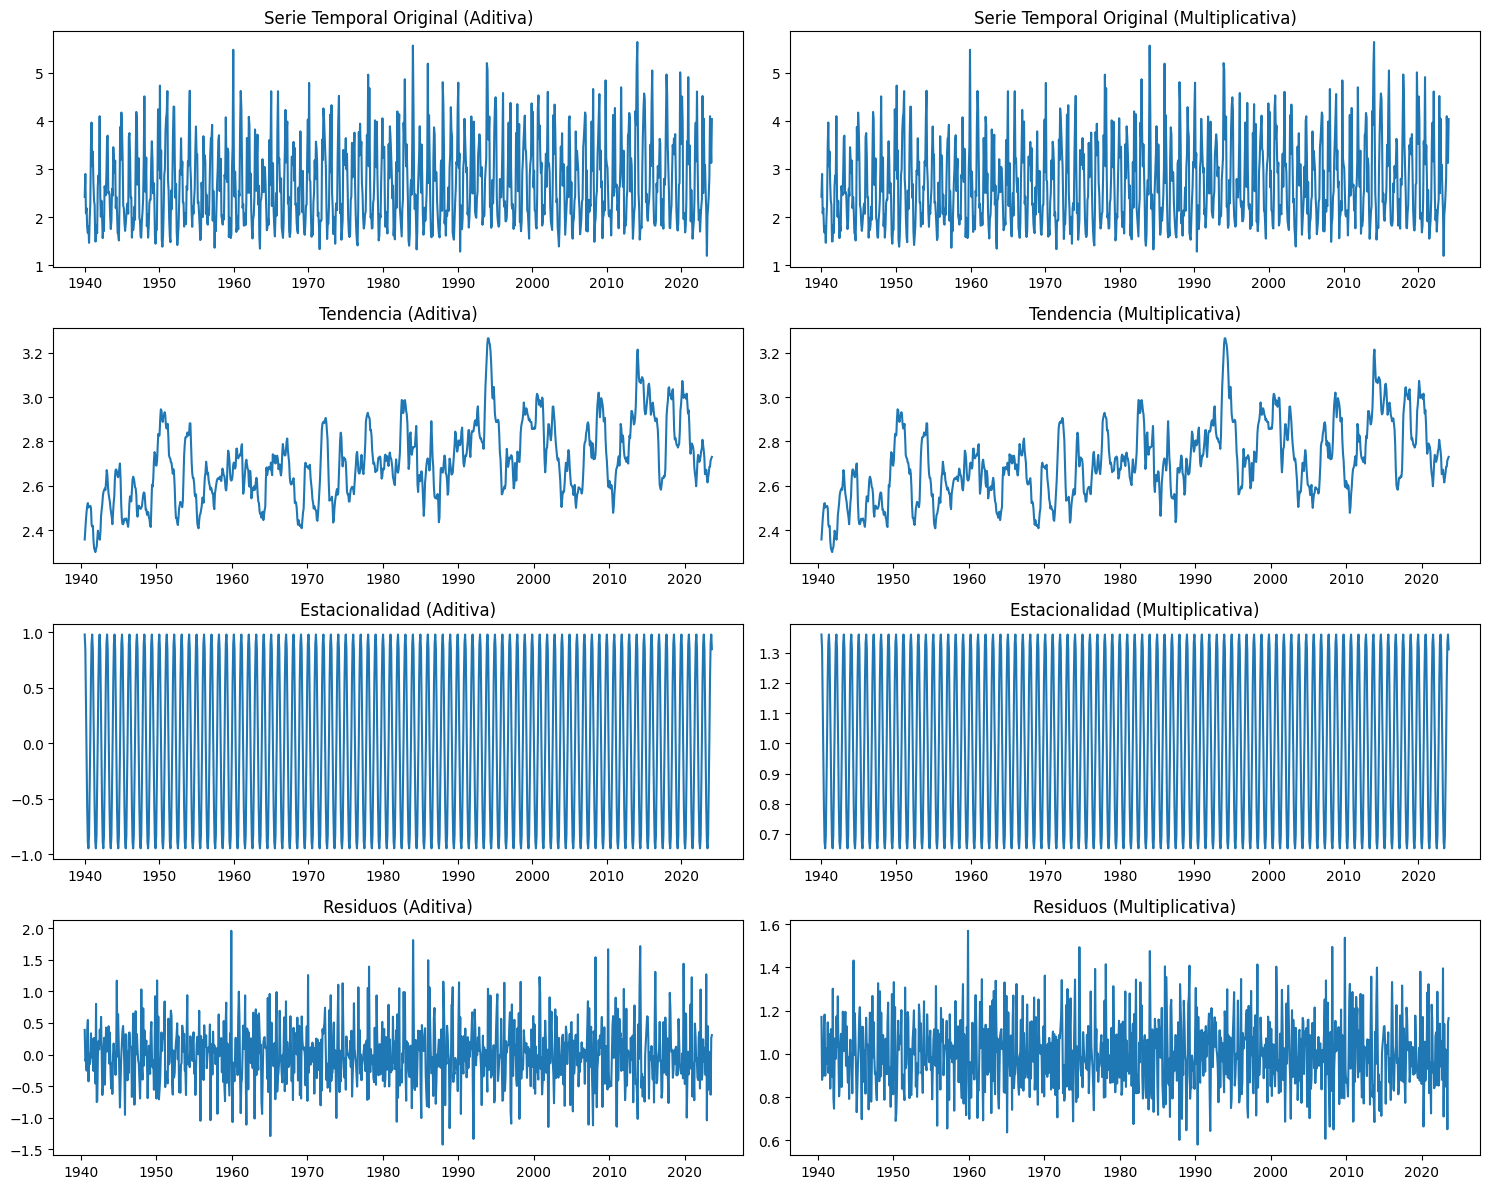

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

st_Maximum_individual_wave.index = pd.to_datetime(st_Maximum_individual_wave.index)
serie = st_Maximum_individual_wave['Maximum individual wave height - media']

# Descomposición aditiva
result_add = seasonal_decompose(serie, model='additive', period=12)

# Descomposición multiplicativa
result_mul = seasonal_decompose(serie, model='multiplicative', period=12)

# Crear figura para gráficos paralelos
fig, axes = plt.subplots(4, 2, figsize=(15, 12))

# Gráficos de la descomposición aditiva
axes[0, 0].plot(result_add.observed)
axes[0, 0].set_title('Serie Temporal Original (Aditiva)')

axes[1, 0].plot(result_add.trend)
axes[1, 0].set_title('Tendencia (Aditiva)')

axes[2, 0].plot(result_add.seasonal)
axes[2, 0].set_title('Estacionalidad (Aditiva)')

axes[3, 0].plot(result_add.resid)
axes[3, 0].set_title('Residuos (Aditiva)')

# Gráficos de la descomposición multiplicativa
axes[0, 1].plot(result_mul.observed)
axes[0, 1].set_title('Serie Temporal Original (Multiplicativa)')

axes[1, 1].plot(result_mul.trend)
axes[1, 1].set_title('Tendencia (Multiplicativa)')

axes[2, 1].plot(result_mul.seasonal)
axes[2, 1].set_title('Estacionalidad (Multiplicativa)')

axes[3, 1].plot(result_mul.resid)
axes[3, 1].set_title('Residuos (Multiplicativa)')

# Ajustar los subplots
plt.tight_layout()
plt.show()


### **6.Modelos predictivos de la estadística clásica**

#### **6.1. Análisis de tendencia determinista**

Se realiza un ajuste de un modelo de regresión lineal de mínimos cuadrados ordinarios (OLS).

PARÁMETROS DE VALIDACIÓN DEL MODELO CON OTROS MODELOS PREDICTIVOS:
ECM: 0.733
R2: 0.013
AIC: 2556.5953
BIC: 2566.4307
Pruebas de heterocedasticidad de los residuos entre los valores observados y los predichos:

Prueba de Breusch-Pagan:
LM Statistic: 6.7755
LM-Test p-value: 0.0092
F-Statistic: 6.8077
F-Test p-value: 0.0092

Prueba de White:
Test Statistic: 6.8548
Test Statistic p-value: 0.0325
F-Statistic: 3.4405
F-Test p-value: 0.0324


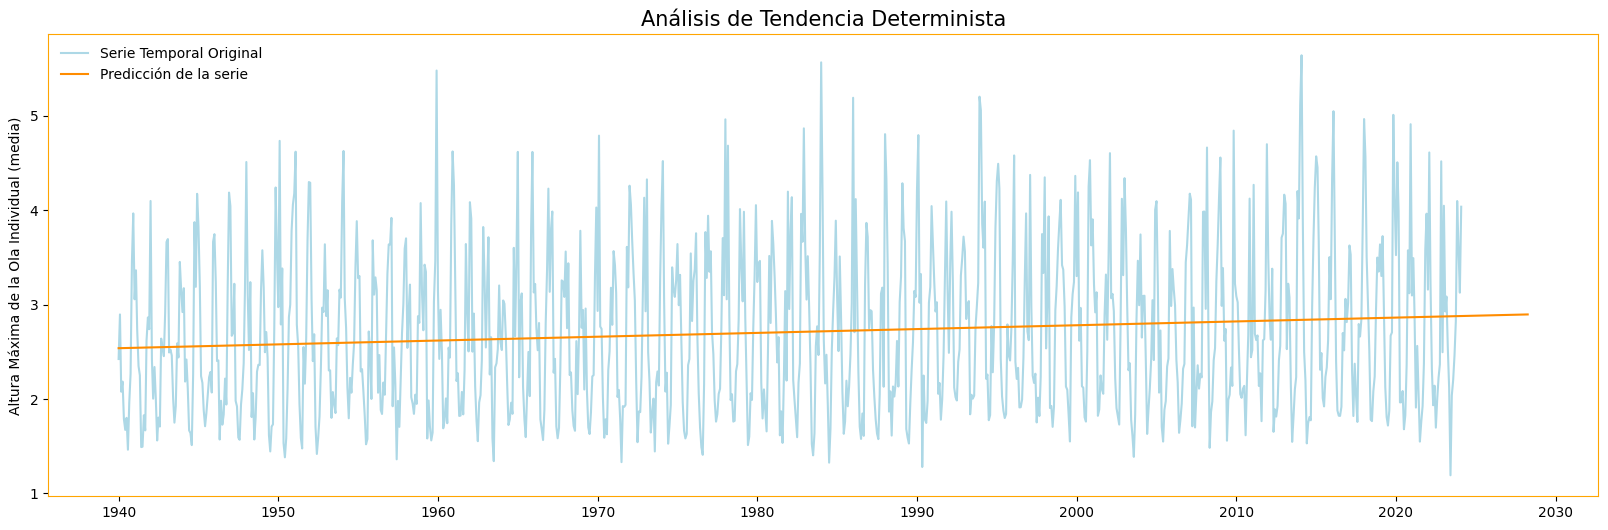

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

# Asegurar de que el índice del DataFrame sea de tipo datetime
st_Maximum_individual_wave.index = pd.to_datetime(st_Maximum_individual_wave.index)

# Obtener los valores de tiempo (eje x) y la serie temporal (eje y)
tiempo = np.arange(len(st_Maximum_individual_wave))
serie_temporal = st_Maximum_individual_wave['Maximum individual wave height - media'].values

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit( tiempo.reshape(-1, 1), serie_temporal)

# Predecir los valores de la tendencia
tendencia = modelo.predict(tiempo.reshape(-1, 1))

# Extender la predicción a 10 valores futuros
tiempo_futuro = np.arange(len(st_Maximum_individual_wave) + 50)
tendencia_futura = modelo.predict(tiempo_futuro.reshape(-1, 1))

# Crear un índice de fechas que incluya los futuros 50 periodos
frecuencia = st_Maximum_individual_wave.index.freq or pd.infer_freq(st_Maximum_individual_wave.index)
index_futuro = pd.date_range(start=st_Maximum_individual_wave.index[0], periods=len(tiempo_futuro), freq=frecuencia)

# Graficar la serie temporal y la tendencia determinista
plt.figure(figsize=(20, 6))

plt.plot(st_Maximum_individual_wave.index, serie_temporal, label='Serie Temporal Original', color='lightblue')
plt.plot(index_futuro, tendencia_futura, label='Predicción de la serie', color='darkorange')

plt.ylabel('Altura Máxima de la Ola Individual (media)')
plt.title('Análisis de Tendencia Determinista', fontsize=15)
plt.legend(loc='upper left', frameon=False)

# Calcular ECM y R²
ecm = mean_squared_error(serie_temporal, tendencia)
r2 = r2_score(serie_temporal, tendencia)

# Calcular AIC y BIC usando statsmodels
serie_temporal = sm.add_constant(tiempo)
modelo_sm = sm.OLS(st_Maximum_individual_wave['Maximum individual wave height - media'], serie_temporal).fit()
aic = modelo_sm.aic
bic = modelo_sm.bic

print('PARÁMETROS DE VALIDACIÓN DEL MODELO CON OTROS MODELOS PREDICTIVOS:')
print(f'ECM: {round(ecm, 4)}')
print(f'R2: {round(r2, 4)}')
print(f'AIC: {round(aic, 4)}')
print(f'BIC: {round(bic, 4)}')

# PRUEBAS DE HETEROCEDASTICIDAD DE LOS ERRORES
print('Pruebas de heterocedasticidad de los residuos entre los valores observados y los predichos:')

# Prueba de Breusch-Pagan
residuos = modelo_sm.resid
X = pd.DataFrame({'constante': np.ones(len(tiempo)), 'tiempo': tiempo})
bp_test = het_breuschpagan(residuos, X)
bp_labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
bp_results = dict(zip(bp_labels, bp_test))

print('\nPrueba de Breusch-Pagan:')
for key in bp_results:
    print(f'{key}: {bp_results[key]:.4f}')

# Prueba de White
white_test = het_white(residuos, X)
white_labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
white_results = dict(zip(white_labels, white_test))

print('\nPrueba de White:')
for key in white_results:
    print(f'{key}: {white_results[key]:.4f}')

# Cambiar el color del borde del gráfico a naranja
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('orange')

plt.show()

In [ ]:
# Obtener el resumen del modelo
summary = modelo_sm.summary()
print(summary)

                                      OLS Regression Results                                      
Dep. Variable:     Maximum individual wave height - media   R-squared:                       0.013
Model:                                                OLS   Adj. R-squared:                  0.012
Method:                                     Least Squares   F-statistic:                     13.33
Date:                                    Sat, 01 Jun 2024   Prob (F-statistic):           0.000275
Time:                                            21:15:09   Log-Likelihood:                -1276.3
No. Observations:                                    1010   AIC:                             2557.
Df Residuals:                                        1008   BIC:                             2566.
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
          

In [ ]:
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

# Modelo de predicción lineal
modelo_prediccion = lambda x: pendiente * x + intercepto

modelo_prediccion_str = f'y = {pendiente:.5f}x + {intercepto:.5f}' # en formato de ecuación matemática
print(modelo_prediccion_str)


y = 0.00034x + 2.53855


In [ ]:
# Función para convertir mes y año en un valor de tiempo
def convertir_mes_y_anio_a_valor_de_tiempo(mes, anio):
    return (anio - st_Maximum_individual_wave.index.year.min()) * 12 + mes - 1

# Mes y año para la predicción
mes_prediccion = 2  # Por ejemplo, junio
anio_prediccion = 2024  # Por ejemplo, el año 2024

# Convierte el mes y año en un valor de tiempo
valor_tiempo_prediccion = convertir_mes_y_anio_a_valor_de_tiempo(mes_prediccion, anio_prediccion)

# Predice el valor para el mes y año especificados
prediccion_para_mes_y_anio = modelo_prediccion(valor_tiempo_prediccion)
print(f'La predicción para {mes_prediccion}/{anio_prediccion} es: {prediccion_para_mes_y_anio}')



La predicción para 2/2024 es: 2.8792332639900717


#### **6.2. Métodos de doble alisado de Holt-Winters.**

            Train        Test
RMSE     0.483622    0.548097
R^2      0.669786    0.651676
AIC  -1153.944654 -222.926352
BIC  -1106.999033 -189.843675


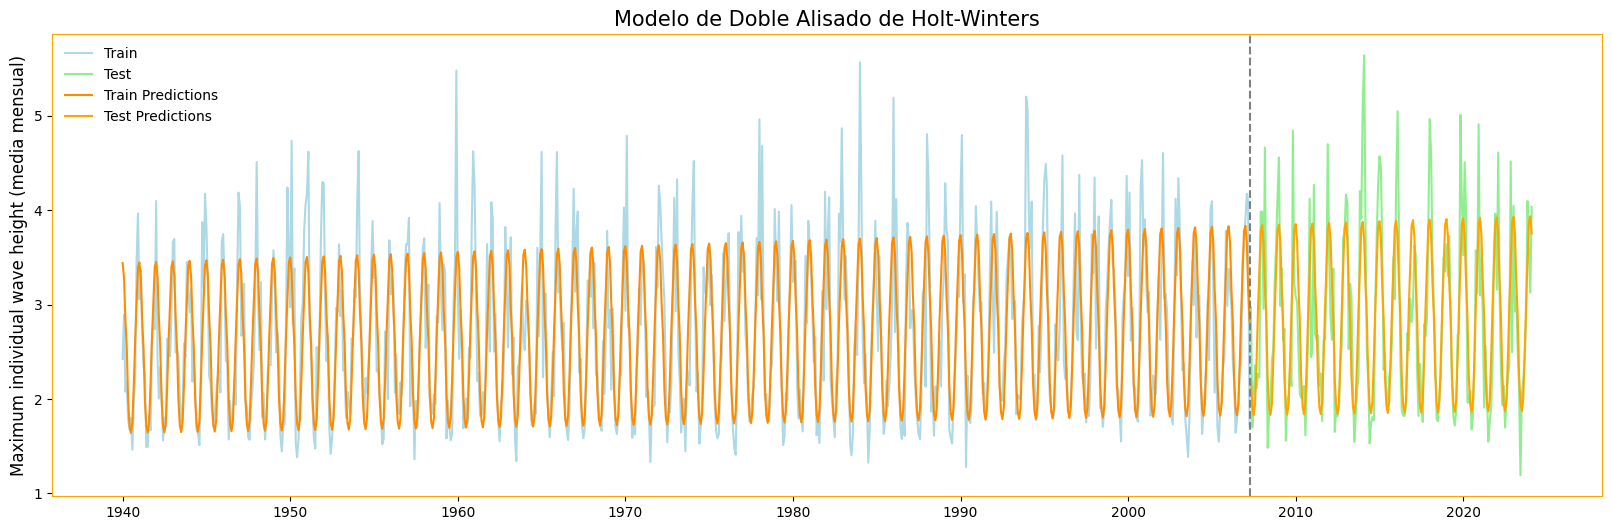

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, r2_score

# Divide los datos en conjuntos de entrenamiento y prueba
train_size = int(len(st_Maximum_individual_wave) * 0.8)
train, test = st_Maximum_individual_wave.iloc[:train_size], st_Maximum_individual_wave.iloc[train_size:]

# Ajustar el modelo de doble alisado de Holt-Winters al conjunto de entrenamiento
modelo_hw = ExponentialSmoothing(train['Maximum individual wave height - media'],
                                 trend='additive', seasonal='multiplicative', seasonal_periods=12)
resultado_hw = modelo_hw.fit()

# Realizar predicciones en los conjuntos de entrenamiento y prueba
predicciones_train = resultado_hw.fittedvalues
predicciones_test = resultado_hw.predict(start=test.index[0], end=test.index[-1])

# Calcular RMSE y R² para los conjuntos de entrenamiento y prueba
rmse_train = np.sqrt(mean_squared_error(train['Maximum individual wave height - media'], predicciones_train))
rmse_test = np.sqrt(mean_squared_error(test['Maximum individual wave height - media'], predicciones_test))
r2_train = r2_score(train['Maximum individual wave height - media'], predicciones_train)
r2_test = r2_score(test['Maximum individual wave height - media'], predicciones_test)

# Calcular AIC y BIC para el conjunto de entrenamiento
n_obs_train = len(train)
k_params_train = len(resultado_hw.params)
aic_train = n_obs_train * np.log(rmse_train**2) + 2 * k_params_train
bic_train = n_obs_train * np.log(rmse_train**2) + k_params_train * np.log(n_obs_train)

# Calcular AIC y BIC para el conjunto de prueba
n_obs_test = len(test)
k_params_test = len(resultado_hw.params)
aic_test = n_obs_test * np.log(rmse_test**2) + 2 * k_params_test
bic_test = n_obs_test * np.log(rmse_test**2) + k_params_test * np.log(n_obs_test)

# Crear un DataFrame para mostrar los resultados en una tabla
results = pd.DataFrame({
    'Train': [rmse_train, r2_train, aic_train, bic_train],
    'Test': [rmse_test, r2_test, aic_test, bic_test]
}, index=['RMSE', 'R^2', 'AIC', 'BIC'])

print(results)

# Visualización de la serie temporal y las predicciones
plt.figure(figsize=(20, 6))
plt.plot(train.index, train['Maximum individual wave height - media'], label='Train', color='lightblue')
plt.plot(test.index, test['Maximum individual wave height - media'], label='Test', color='lightgreen')
plt.plot(train.index, predicciones_train, label='Train Predictions', color='darkorange')
plt.plot(test.index, predicciones_test, label='Test Predictions', color='orange')

plt.title('Modelo de Doble Alisado de Holt-Winters', fontsize=15)
plt.ylabel('Maximum individual wave height (media mensual)', fontsize=12)
plt.legend(loc='upper left', frameon=False)

# Añadir la línea vertical al final de los datos de entrenamiento
plt.axvline(x=train.index[-1], color='gray', linestyle='--')

# Cambiar el color del borde del gráfico a naranja
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('orange')

plt.show()


**Representación gráfica del conjunto test y sus predicciones.**

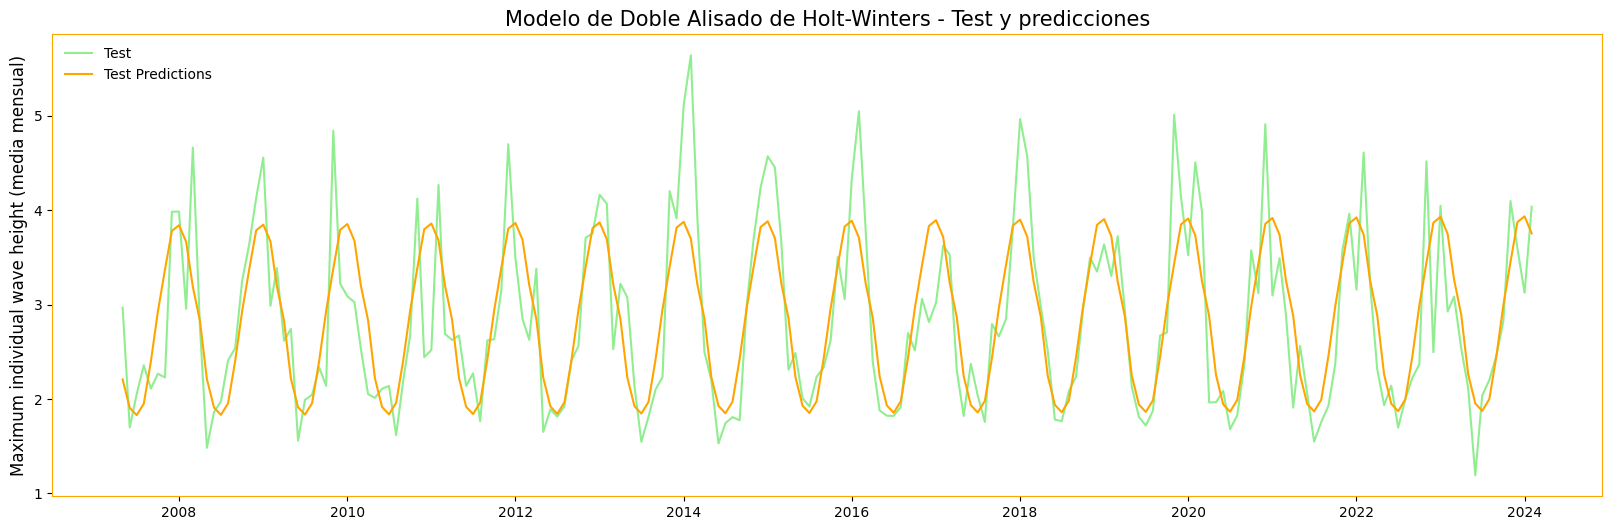

In [ ]:
# Visualización de la serie temporal y las predicciones
plt.figure(figsize=(20, 6))
plt.plot(test.index, test['Maximum individual wave height - media'], label='Test', color='lightgreen')
plt.plot(test.index, predicciones_test, label='Test Predictions', color='orange')

plt.title('Modelo de Doble Alisado de Holt-Winters - Test y predicciones', fontsize=15)
plt.ylabel('Maximum individual wave height (media mensual)', fontsize=12)
plt.legend(loc='upper left', frameon=False)

# Cambiar el color del borde del gráfico a naranja
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('orange')

plt.show()

**Prediccion de la altura de la ola en una fecha concreta.**

In [ ]:
# Predecir una fecha específica
fecha_prediccion = '2024-03-01'  # Cambia esto a la fecha que deseas predecir
prediccion_especifica = resultado_hw.predict(start=fecha_prediccion, end=fecha_prediccion)

print(f'Predicción para {fecha_prediccion}: {prediccion_especifica.values[0]}')

Predicción para 2024-03-01: 3.267864582208406


### **7.Modelo SARIMA**

**Funciones de autocorrelacion simple y parcial de la serie temporal original.**

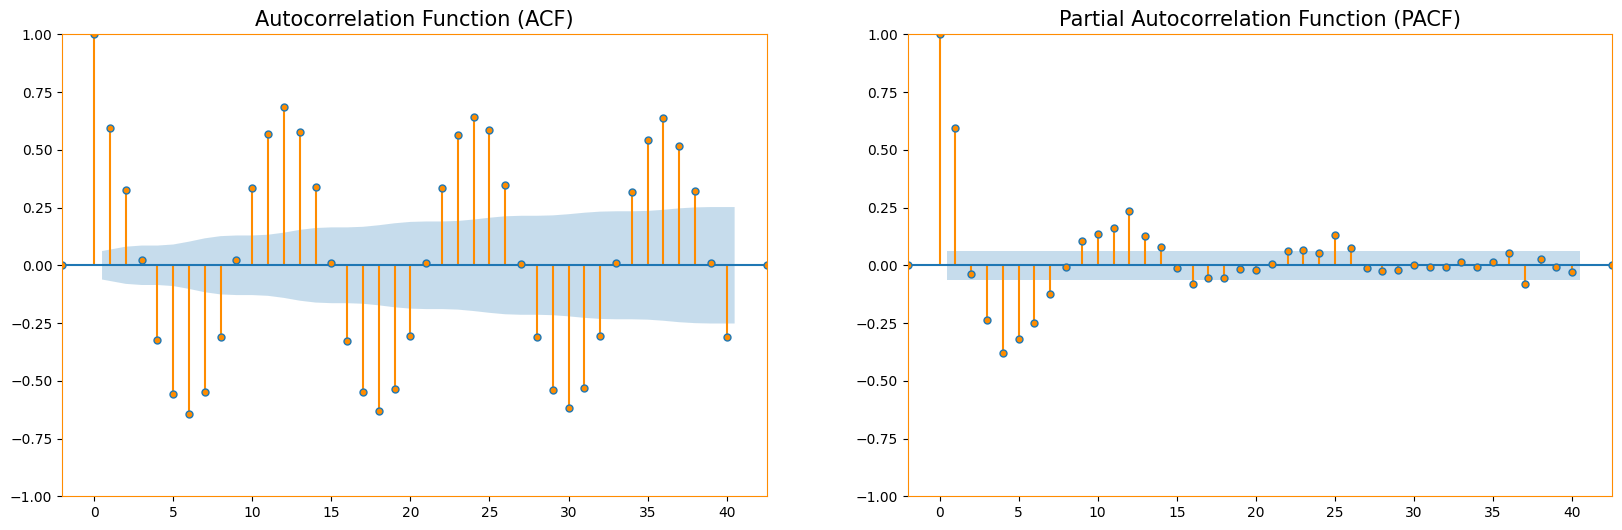

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Extraer la serie específica
serie_temporal = st_Maximum_individual_wave['Maximum individual wave height - media']

# Configurar el tamaño del gráfico
plt.figure(figsize=(20, 6))

# Definir el color naranja oscuro para el formato del gráfico
color_naranja_oscuro = 'darkorange'

# -- FUNCIÓN DE AUTOCORRELACIÓN (ACF)
# Graficar la función de autocorrelación (ACF)
plt.subplot(121)
plot_acf(serie_temporal, lags=40, ax=plt.gca(),
         vlines_kwargs={'colors': color_naranja_oscuro},
         marker='o', markersize=5, markerfacecolor=color_naranja_oscuro)
plt.title('Autocorrelation Function (ACF)', fontsize=15)

# Cambiar el color del borde del gráfico a naranja
ax_acf = plt.gca()
for spine in ax_acf.spines.values():
    spine.set_edgecolor(color_naranja_oscuro)

# -- FUNCIÓN DE AUTOCORRELACIÓN PARCIAL (PACF)
# Graficar la función de autocorrelación parcial (PACF)
plt.subplot(122)
plot_pacf(serie_temporal, lags=40, ax=plt.gca(),
          vlines_kwargs={'colors': color_naranja_oscuro},
          marker='o', markersize=5, markerfacecolor=color_naranja_oscuro)
plt.title('Partial Autocorrelation Function (PACF)', fontsize=15)

# Cambiar el color del borde del gráfico a naranja
ax_pacf = plt.gca()
for spine in ax_pacf.spines.values():
    spine.set_edgecolor(color_naranja_oscuro)

plt.show()


**Contraste de Kwiatkowski-Phillips-Schmidt-Shin (KPSS)**

In [ ]:
from statsmodels.tsa.stattools import kpss

resultado_kpss = kpss(st_Maximum_individual_wave, nlags=0)

print(f'Estadística KPSS: {resultado_kpss[0]}')
print(f'Valor p: {resultado_kpss[1]}')
print(f'Lags utilizados: {resultado_kpss[2]}')
print(f'Valores críticos: {resultado_kpss[3]}\n')

if resultado_kpss[1] < 0.05:
    print('La serie no es estacionaria según el contraste KPSS.\n')
else:
    print('La serie es estacionaria según el contraste KPSS.\n')


Estadística KPSS: 1.3199745313847537
Valor p: 0.01
Lags utilizados: 0
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

La serie no es estacionaria según el contraste KPSS.



<ipython-input-80-357934861ec7>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultado_kpss = kpss(st_Maximum_individual_wave, nlags=0)


**Diferenciación de la serie temporal**

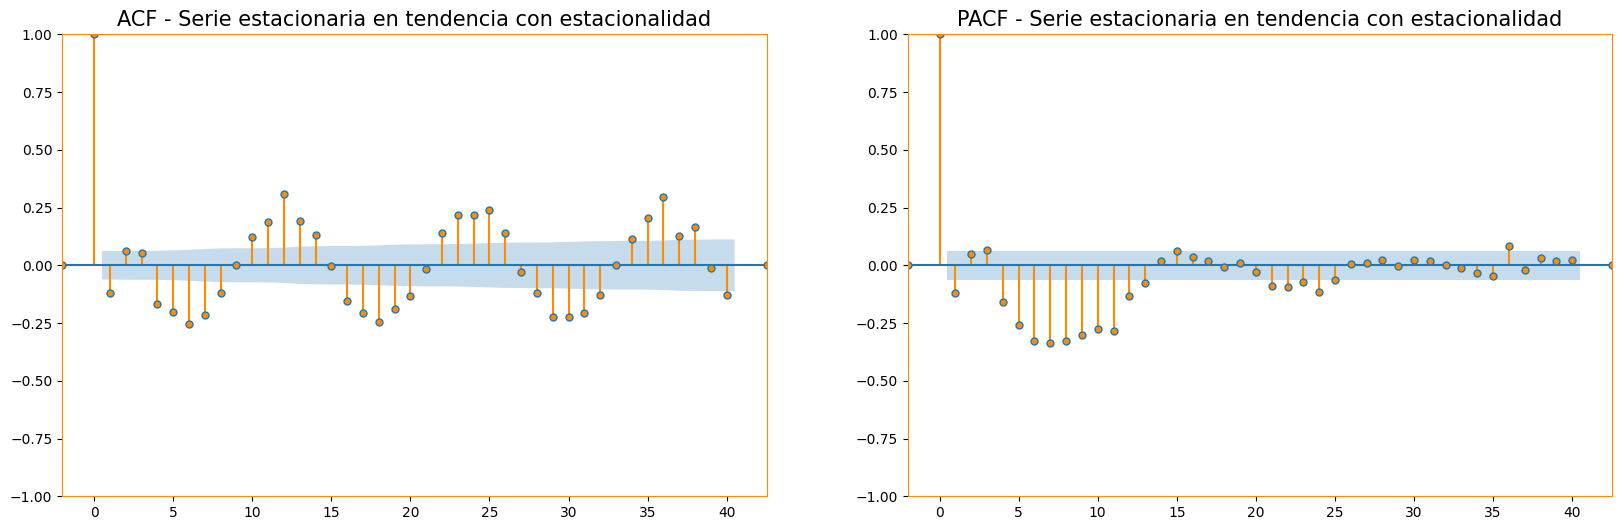

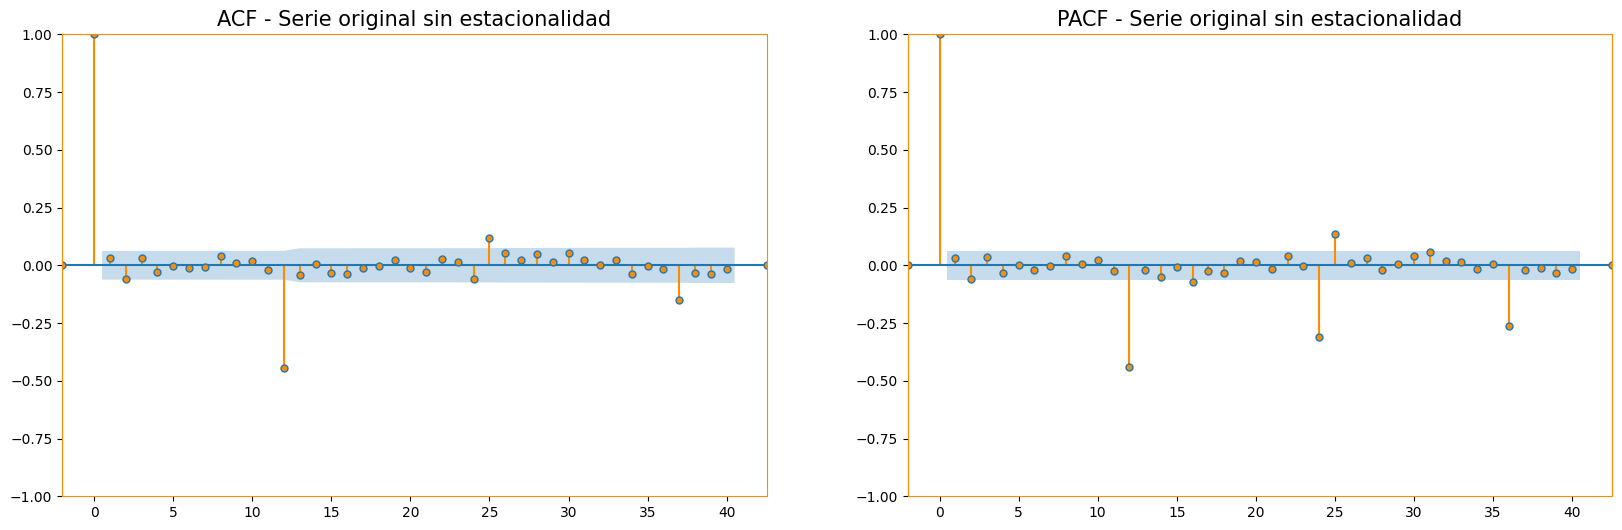

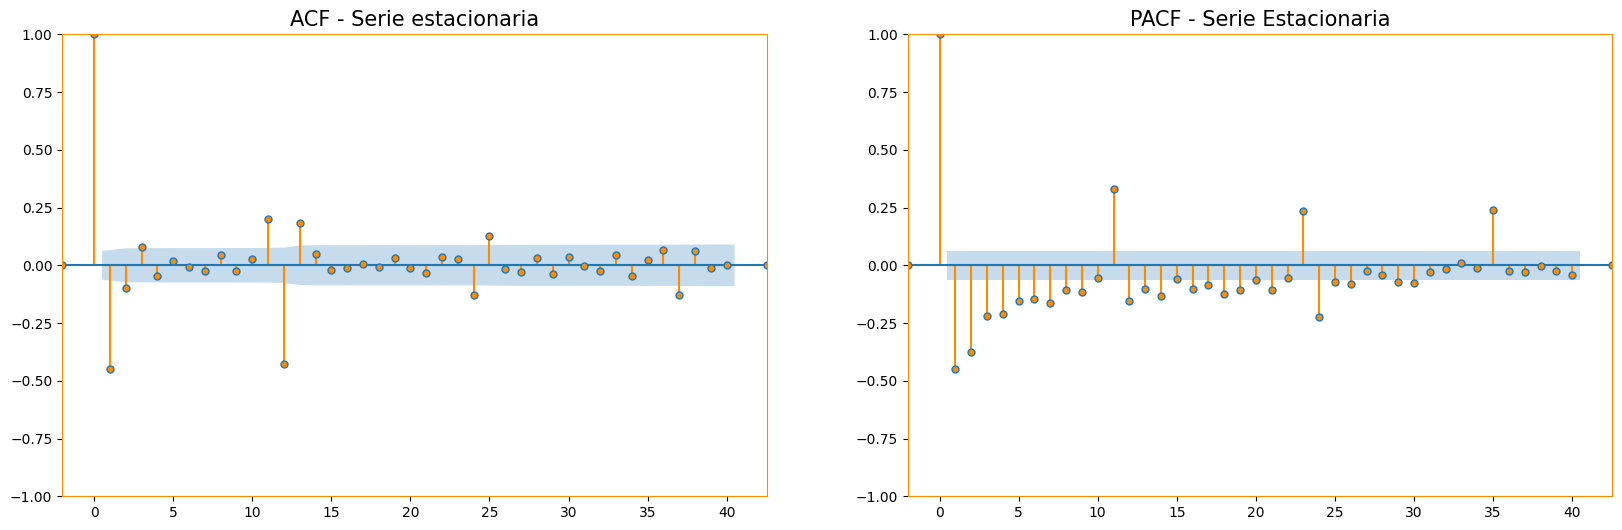

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import numpy as np

# Diferenciación de la serie
# Serie temporal
serie = st_Maximum_individual_wave

# Transformación logarítmica para que la varianza sea constante
serie_log = np.log(serie)

# Diferenciación de la tendencia
diferenciada_log = serie_log.diff().dropna()

# Diferenciación estacional (periodicidad estacional 12)
diferenciada_log_estacional = diferenciada_log.diff(12).dropna()

# Definición formato gráfico
# Función para configurar el borde de los gráficos
def set_plot_border_color(ax, color):
    for spine in ax.spines.values():
        spine.set_edgecolor(color)

# Colores
color_naranja_oscuro = '#FF8C00'

# Gráfica ACF y PACF para la serie estacionaria en la media con estacionalidad
plt.figure(figsize=(20, 6))

plt.subplot(121)
plot_acf(diferenciada_log, lags=40, ax=plt.gca(),
         vlines_kwargs={'colors': color_naranja_oscuro},
         marker='o', markersize=5, markerfacecolor=color_naranja_oscuro)
plt.title('ACF - Serie estacionaria en tendencia con estacionalidad', fontsize=15)
set_plot_border_color(plt.gca(), color_naranja_oscuro)

plt.subplot(122)
plot_pacf(diferenciada_log, lags=40, ax=plt.gca(),
          vlines_kwargs={'colors': color_naranja_oscuro},
          marker='o', markersize=5, markerfacecolor=color_naranja_oscuro)
plt.title('PACF - Serie estacionaria en tendencia con estacionalidad', fontsize=15)
set_plot_border_color(plt.gca(), color_naranja_oscuro)

# Gráfica ACF y PACF para la serie sin estacionalidad con tendencia
# Diferenciación de la tendencia
diferenciada12_log = serie_log.diff(12).dropna()

plt.figure(figsize=(20, 6))

plt.subplot(121)
plot_acf(diferenciada12_log, lags=40, ax=plt.gca(),
         vlines_kwargs={'colors': color_naranja_oscuro},
         marker='o', markersize=5, markerfacecolor=color_naranja_oscuro)
plt.title('ACF - Serie original sin estacionalidad', fontsize=15)
set_plot_border_color(plt.gca(), color_naranja_oscuro)

plt.subplot(122)
plot_pacf(diferenciada12_log, lags=40, ax=plt.gca(),
          vlines_kwargs={'colors': color_naranja_oscuro},
          marker='o', markersize=5, markerfacecolor=color_naranja_oscuro)
plt.title('PACF - Serie original sin estacionalidad', fontsize=15)
set_plot_border_color(plt.gca(), color_naranja_oscuro)

plt.show()

# Gráfica ACF y PACF para la serie estacionaria sin estacionalidad
plt.figure(figsize=(20, 6))

plt.subplot(121)
plot_acf(diferenciada_log_estacional, lags=40, ax=plt.gca(),
         vlines_kwargs={'colors': color_naranja_oscuro},
         marker='o', markersize=5, markerfacecolor=color_naranja_oscuro)
plt.title('ACF - Serie estacionaria', fontsize=15)
set_plot_border_color(plt.gca(), color_naranja_oscuro)

plt.subplot(122)
plot_pacf(diferenciada_log_estacional, lags=40, ax=plt.gca(),
          vlines_kwargs={'colors': color_naranja_oscuro},
          marker='o', markersize=5, markerfacecolor=color_naranja_oscuro)
plt.title('PACF - Serie Estacionaria', fontsize=15)
set_plot_border_color(plt.gca(), color_naranja_oscuro)

plt.show()

**Contraste de Kwiatkowski-Phillips-Schmidt-Shin (KPSS)**

In [ ]:
from statsmodels.tsa.stattools import kpss

resultado_kpss = kpss(diferenciada_log_estacional, nlags=12)

print(f'Estadística KPSS: {resultado_kpss[0]}')
print(f'P-valor: {resultado_kpss[1]}')
print(f'Lags utilizados: {resultado_kpss[2]}')
print(f'Valores críticos: {resultado_kpss[3]}\n')

if resultado_kpss[1] < 0.05:
    print('La serie no es estacionaria según el contraste KPSS.\n')
else:
    print('La serie es estacionaria según el contraste KPSS.\n')

Estadística KPSS: 0.015212186591191884
P-valor: 0.1
Lags utilizados: 12
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

La serie es estacionaria según el contraste KPSS.



<ipython-input-81-3d0a43ee64a2>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultado_kpss = kpss(diferenciada_log_estacional, nlags=12)


DENOMINACIONES DE LAS SERIES TEMPORALES

**Serie temporal original:** serie = st_Maximum_individual_wave['Maximum individual wave height - media']


**Serie temporal con varianza constante:** serie_log


**Serie temporal eliminando la tendencia en media:** diferenciada_log


**Serie temporal eliminada la tendencia en media y la estacionalidad:** diferenciada_log_estacional

**Modelo predictivo SARIMA.**

           Train        Test
RMSE    0.288111    0.344167
R^2     0.148735   -0.059801
AIC   234.390266   95.794661
BIC   267.041129  118.412421


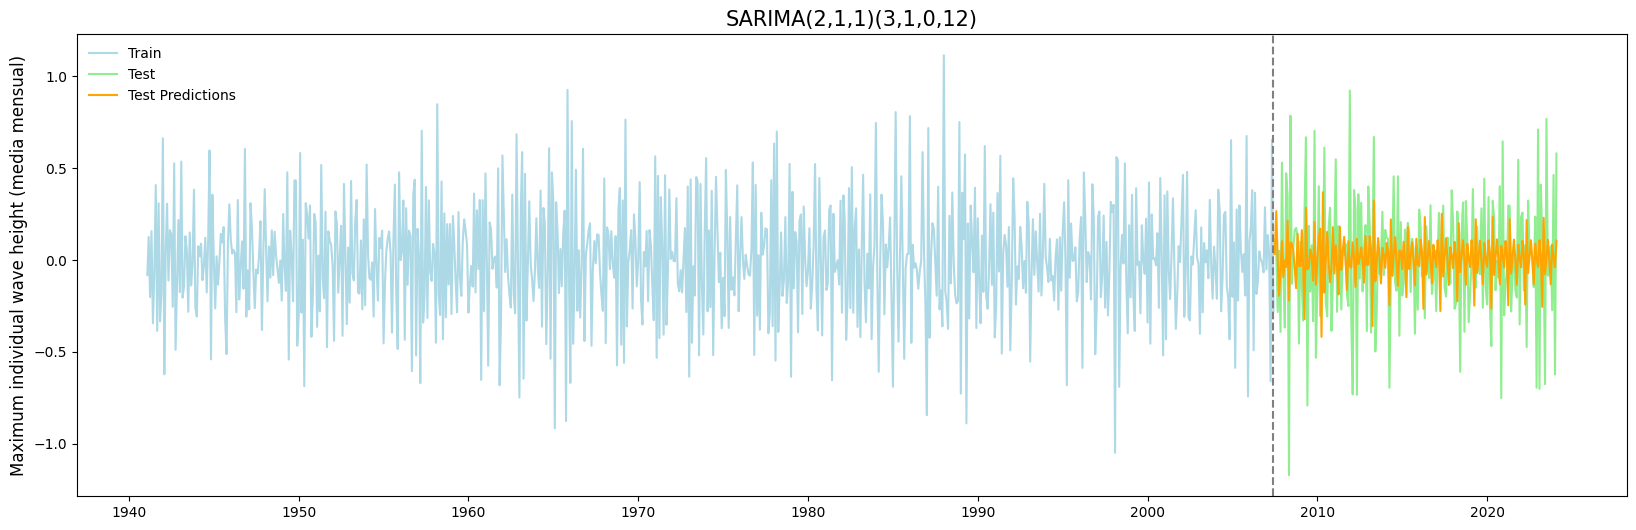

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score

# Divide los datos en conjuntos de entrenamiento y prueba
train_size = int(len(diferenciada_log_estacional) * 0.8)
train, test = diferenciada_log_estacional.iloc[:train_size], diferenciada_log_estacional.iloc[train_size:]

# Definir los valores de los parámetros SARIMA
p = 2  # Orden de autorregresión
d = 1  # Orden de diferenciación
q = 1  # Orden de media móvil

P = 3  # Orden de autorregresión estacional
D = 1  # Orden de diferenciación estacional
Q = 0  # Orden de media móvil estacional

s = 12  # Longitud del ciclo estacional - ANUAL

# Ajustar el modelo SARIMA a tus datos de entrenamiento
modelo_sarima = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
resultado_SARIMA = modelo_sarima.fit()

# Realizar predicciones para el conjunto de entrenamiento
predicciones_train = resultado_SARIMA.predict(start=train.index[0], end=train.index[-1])

# Realizar predicciones para el conjunto de prueba
predicciones_test = resultado_SARIMA.predict(start=test.index[0], end=test.index[-1])

# Calcular el ECM (Error Cuadrático Medio)
ecm_train = mean_squared_error(train, predicciones_train)
ecm_test = mean_squared_error(test, predicciones_test)

# Calcular el RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(ecm_train)
rmse_test = np.sqrt(ecm_test)

# Ajustar el modelo SARIMA al conjunto de prueba
modelo_sarima_test = SARIMAX(test, order=(p, d, q), seasonal_order=(P, D, Q, s))
resultado_SARIMA_test = modelo_sarima_test.filter(resultado_SARIMA.params)

# Calcular el criterio de información de Akaike (AIC) y el criterio de información bayesiano (BIC) para el conjunto de entrenamiento
aic_train = resultado_SARIMA.aic
aic_test = resultado_SARIMA_test.aic

bic_train = resultado_SARIMA.bic
bic_test = resultado_SARIMA_test.bic

# Calcular R^2
r2_train = r2_score(train, predicciones_train)
r2_test = r2_score(test, predicciones_test)

# Crear un DataFrame para mostrar los resultados en una tabla
results = pd.DataFrame({
    'Train': [rmse_train, r2_train, aic_train, bic_train],
    'Test': [rmse_test, r2_test, aic_test, bic_test]
}, index=['RMSE', 'R^2', 'AIC', 'BIC'])

print(results)

# Visualización de la serie temporal y las predicciones
plt.figure(figsize=(20, 6))
plt.plot(train.index, train, label='Train', color='lightblue')
plt.plot(test.index, test, label='Test', color='lightgreen')
#plt.plot(train.index, predicciones_train, label='Train Predictions', color='darkorange')
plt.plot(test.index, predicciones_test, label='Test Predictions', color='orange')

# Añadir la línea vertical al final de los datos de entrenamiento
plt.axvline(x=train.index[-1], color='gray', linestyle='--')

plt.title('SARIMA(2,1,1)(3,1,0,12)', fontsize=15)
plt.ylabel('Maximum individual wave height (media mensual)', fontsize=12)
plt.legend(loc='upper left', frameon=False)
plt.show()


**Representación gráfica del conjunto test y sus predicciones.**

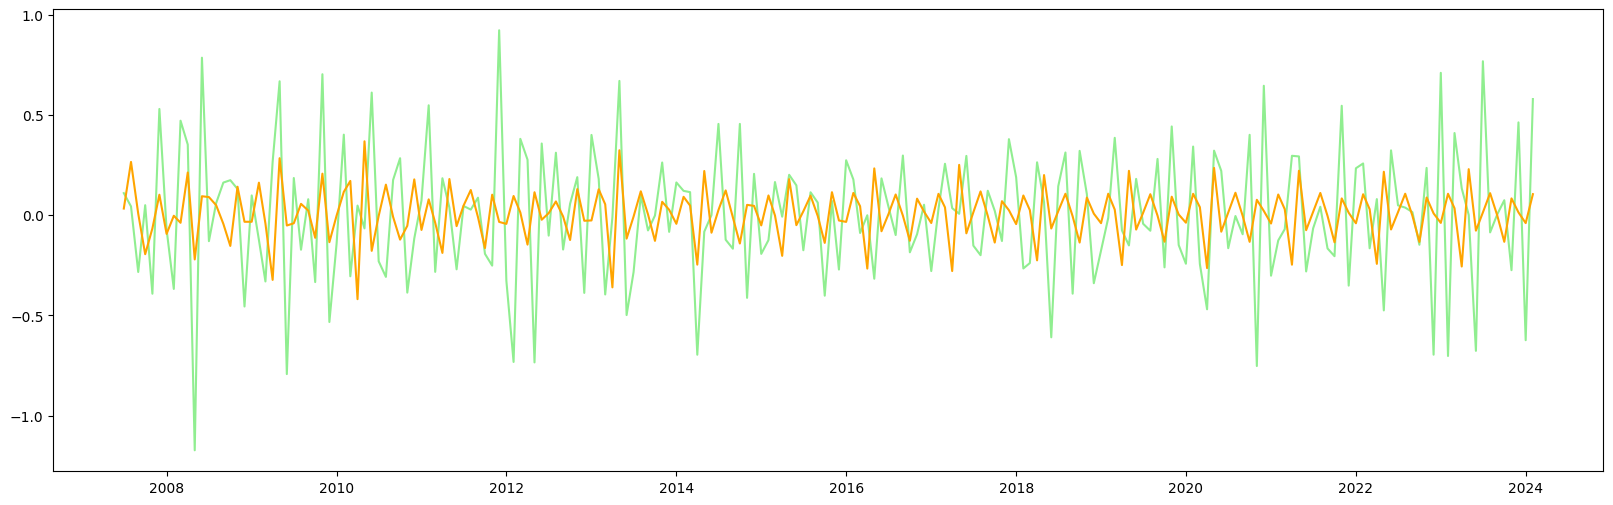

In [ ]:
# Visualización de la serie temporal y las predicciones
plt.figure(figsize=(20, 6))

plt.plot(test.index, test, label='Test', color='lightgreen')
plt.plot(test.index, predicciones_test, label='Test Predictions', color='orange')

**Test de Ljung-Box para los residuos**

In [ ]:
# Test de Ljung-Box para los residuos
from statsmodels.stats.diagnostic import acorr_ljungbox

residuos = resultado_SARIMA.resid
ljung_box_test = acorr_ljungbox(residuos, lags=[12], return_df=True)
print("\nTest de Ljung-Box para los residuos del modelo SARIMA")
print(ljung_box_test)


Test de Ljung-Box para los residuos del modelo SARIMA
       lb_stat     lb_pvalue
12  435.296608  1.247911e-85


**Prediccion de la altura de la ola con el modelo SARIMA.**

In [ ]:
# Definir el número de pasos a predecir
n_steps = 10

# Realizar predicciones futuras con intervalos de confianza
predicciones_futuras = resultado_SARIMA.get_forecast(steps=n_steps)
pred_media = predicciones_futuras.predicted_mean
pred_intervalo_confianza = predicciones_futuras.conf_int()

# Asegurar de que todas las series tengan la misma longitud
assert len(pred_media) == len(pred_intervalo_confianza)

# Revertir la transformación logarítmica
predicciones_revertidas = np.exp(pred_media)
limite_inferior_revertido = np.exp(pred_intervalo_confianza.iloc[:, 0])
limite_superior_revertido = np.exp(pred_intervalo_confianza.iloc[:, 1])

# Revertir las diferenciaciones acumuladas
predicciones_revertidas_acumulado = predicciones_revertidas.cumsum()
limite_inferior_revertido_acumulado = limite_inferior_revertido.cumsum()
limite_superior_revertido_acumulado = limite_superior_revertido.cumsum()

# Calcular las diferencias mensuales
pred_diff = np.diff(predicciones_revertidas_acumulado)
lim_inf_diff = np.diff(limite_inferior_revertido_acumulado)
lim_sup_diff = np.diff(limite_superior_revertido_acumulado)

# Concatenar el primer valor original para mantener la misma longitud
predicciones_revertidas = np.concatenate(([predicciones_revertidas.iloc[0]], pred_diff))
limite_inferior_revertido = np.concatenate(([limite_inferior_revertido.iloc[0]], lim_inf_diff))
limite_superior_revertido = np.concatenate(([limite_superior_revertido.iloc[0]], lim_sup_diff))

# Crear un rango de fechas futuras a partir del final del conjunto de prueba
ultimo_dia_mes_test = test.index[-1].replace(day=1) + pd.offsets.MonthEnd(1)
fechas_futuras = pd.date_range(start=ultimo_dia_mes_test, periods=n_steps, freq='MS')

# Imprimir las predicciones futuras y los intervalos de confianza revertidos
for fecha, pred, li, ls in zip(fechas_futuras, predicciones_revertidas, limite_inferior_revertido, limite_superior_revertido):
    print(f"Fecha: {fecha.strftime('%Y-%m-%d')}, Predicción: {pred}, Límite Inferior: {li}, Límite Superior: {ls}")


Fecha: 2024-03-01, Predicción: 1.0337263051418353, Límite Inferior: 0.6050254827974582, Límite Superior: 1.7661901925210608
Fecha: 2024-04-01, Predicción: 1.3044592506368902, Límite Inferior: 0.7025751499252202, Límite Superior: 2.4219671543368295
Fecha: 2024-05-01, Predicción: 1.0079010009861338, Límite Inferior: 0.5426196729893935, Límite Superior: 1.872148169992185
Fecha: 2024-06-01, Predicción: 0.8232153065061003, Límite Inferior: 0.4371067747141537, Límite Superior: 1.5503842083186763
Fecha: 2024-07-01, Predicción: 0.9366543132467591, Límite Inferior: 0.495592660550801, Límite Superior: 1.7702467618239224
Fecha: 2024-08-01, Predicción: 1.1077661490863182, Límite Inferior: 0.5860792992187869, Límite Superior: 2.0938221887332524
Fecha: 2024-09-01, Predicción: 0.911033209064863, Límite Inferior: 0.48160429919427683, Límite Superior: 1.7233681456074645
Fecha: 2024-10-01, Predicción: 0.9973487007691997, Límite Inferior: 0.5271533210585289, Límite Superior: 1.8869357190591831
Fecha: 202

### **8.Modelo predicitivos multivariante**

**Variables candidatas**

In [ ]:
# Seleccionar unicamente las variables 'Maximum individual wave height' con mayor corrrelación lineal
df_multivariante = df_datos[['Maximum individual wave height - media', 'Mean wave period based on first moment for swell - media',
                             'Mean zero-crossing wave period - media', 'Mean period of total swell - media', 'Mean wave period based on first moment - media',
                             'Period corresponding to maximum individual wave height - media', 'Mean wave period - media',
                             'Mean wave period of first swell partition - media', 'Peak wave period - media', 'Mean square slope of waves - media',
                             'Instantaneous 10 metre wind gust - media', 'Friction velocity - media',
                             'Mean wave period based on first moment for wind waves - media', 'Significant height of wind waves - media']]

# Ordenar si no está ordenado
df_multivariante.sort_index(inplace=True)

# Convertir la fecha en formato timestamp
df_multivariante.index = pd.to_datetime(df_multivariante.index, format='%Y-%m-%d')

# Definir la frecuencia de la serie temporal como mensual
df_multivariante = df_multivariante.asfreq('MS')

In [ ]:
df_Maximum_individual_wave_height = df_multivariante[['Maximum individual wave height - media']]
df_Instantaneous_10_metre_wind_gust = df_multivariante[['Instantaneous 10 metre wind gust - media']]
#df_Peak_wave_period = df_multivariante[['Peak wave period - media']]
#df_Mean_wave_period = df_multivariante[['Mean wave period - media']]
#df_Friction_velocity = df_multivariante[['Friction velocity - media']]

**Representación gráfica de las dos series temporales**

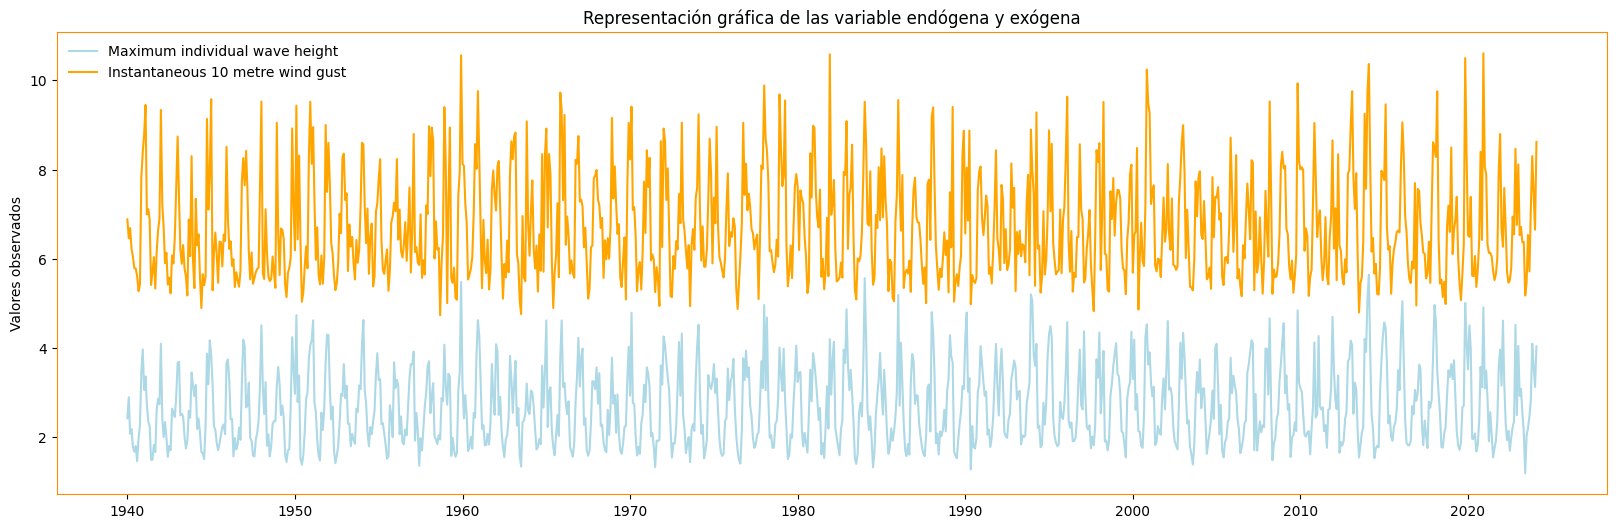

In [ ]:
plt.figure(figsize=(20, 6))  # Define el tamaño de la figura

plt.plot(df_Maximum_individual_wave_height, label='Maximum individual wave height', color='lightblue')
plt.plot(df_Instantaneous_10_metre_wind_gust, label='Instantaneous 10 metre wind gust', color='orange')
#plt.plot(df_Peak_wave_period, label='Peak wave period', color='orange')
#plt.plot(df_Mean_wave_period, label='Mean wave period', color='green')
#plt.plot(df_Friction_velocity, label='Friction velocity', color='purple')

plt.title('Representación gráfica de las variable endógena y exógena')  # Título del gráfico
plt.ylabel('Valores observados')  # Etiqueta del eje Y

plt.legend(loc='upper left', frameon=False)

# Cambiar el color del borde del gráfico a naranja
ax_pacf = plt.gca()
for spine in ax_pacf.spines.values():
    spine.set_edgecolor(color_naranja_oscuro)

plt.show()  # Muestra el gráfico


**Obtener la gráfica de los diez últimos años.**

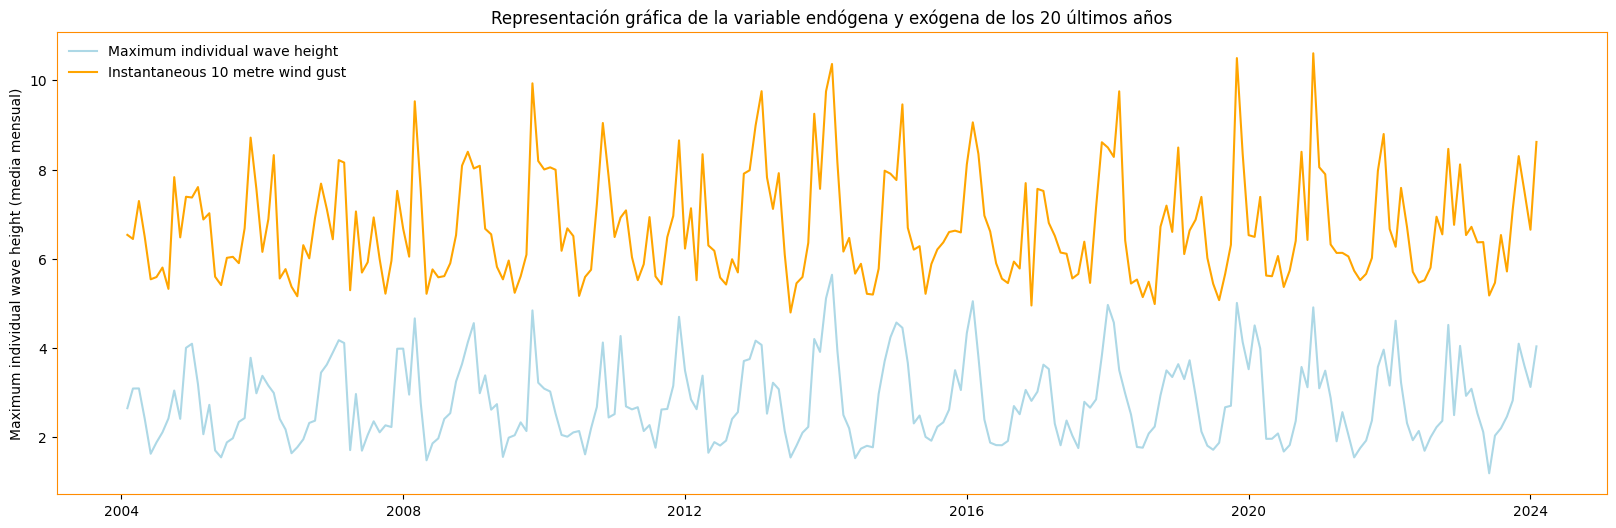

In [ ]:
# Filtrar los datos para los últimos veinte últimos años
end_date = df_Maximum_individual_wave_height.index.max()
start_date = end_date - pd.DateOffset(years=20)

df_Maximum_individual_wave_height_last_10_years = df_Maximum_individual_wave_height[start_date:end_date]
df_Instantaneous_10_metre_wind_gust_last_10_years = df_Instantaneous_10_metre_wind_gust[start_date:end_date]
#df_Peak_wave_period_last_10_years = df_Peak_wave_period[start_date:end_date]
#df_Mean_wave_period_last_10_years = df_Mean_wave_period[start_date:end_date]
#df_Friction_velocity_last_10_years = df_Friction_velocity[start_date:end_date]

# Definir el tamaño de la figura
plt.figure(figsize=(20, 6))

# Graficar las tres series
plt.plot(df_Maximum_individual_wave_height_last_10_years, label='Maximum individual wave height', color='lightblue')
plt.plot(df_Instantaneous_10_metre_wind_gust_last_10_years, label='Instantaneous 10 metre wind gust', color='orange')
#plt.plot(df_Peak_wave_period_last_10_years, label='Peak wave period', color='orange')
#plt.plot(df_Mean_wave_period_last_10_years, label='Mean wave period', color='green')
#plt.plot(df_Friction_velocity, label='Friction velocity', color='purple')

# Añadir título y etiqueta del eje Y
plt.title('Representación gráfica de la variable endógena y exógena de los 20 últimos años')
plt.ylabel('Maximum individual wave height (media mensual)')

plt.legend(loc='upper left', frameon=False)

# Cambiar el color del borde del gráfico a naranja
color_naranja_oscuro = '#FF8C00'  # Definir el color naranja oscuro
ax_pacf = plt.gca()
for spine in ax_pacf.spines.values():
    spine.set_edgecolor(color_naranja_oscuro)

# Mostrar el gráfico
plt.show()


In [ ]:
df_multivariante = df_datos[['Maximum individual wave height - media', 'Instantaneous 10 metre wind gust - media']]

**RandomForestRegressor**

<ipython-input-97-30adec4f1660>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train[exog_cols], train[endog_cols])


            Train        Test
RMSE     0.234106    0.625308
R^2      0.922624    0.546626
AIC  -2146.404708   10.317718
BIC  -1676.948502  341.144487


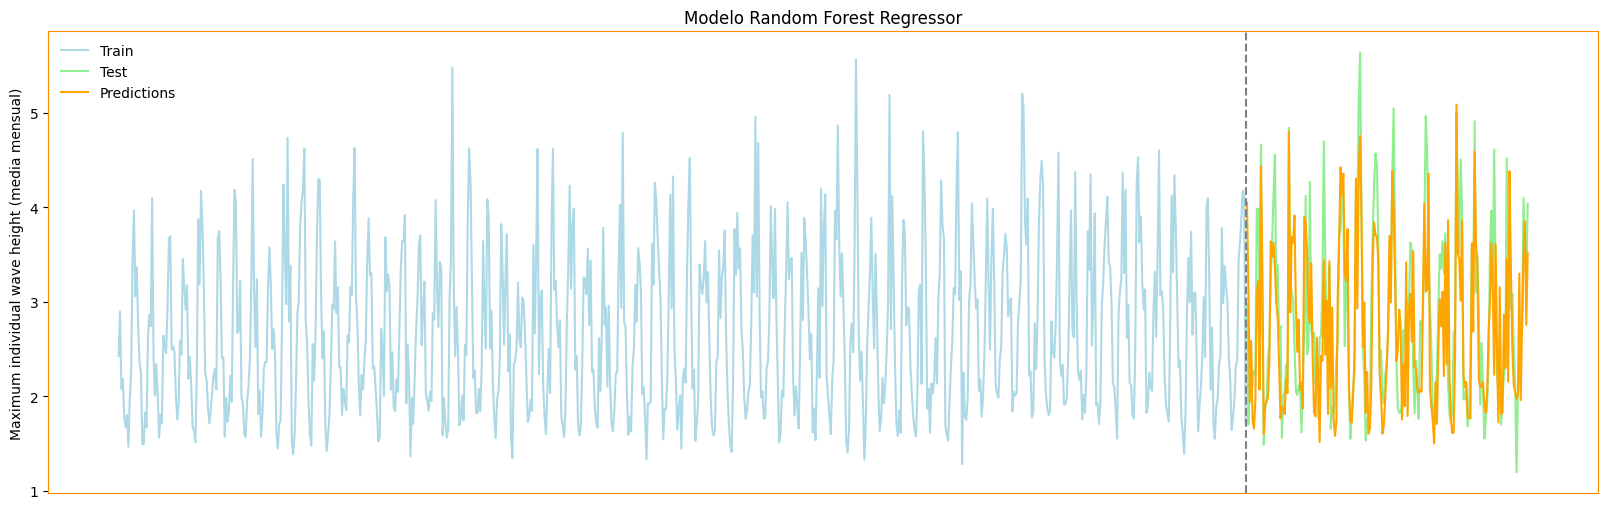

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Seleccionar las variables relevantes
endog_cols = ['Maximum individual wave height - media']
exog_cols = ['Instantaneous 10 metre wind gust - media']
data = df_multivariante[endog_cols + exog_cols]

# Dividir los datos en conjuntos de entrenamiento y prueba
train, test = train_test_split(data, test_size=0.2, shuffle=False)

# Entrenar el modelo de regresión con variables exógenas
regressor = RandomForestRegressor(random_state=123)
regressor.fit(train[exog_cols], train[endog_cols])

# Predecir para los datos de entrenamiento
train_predictions = regressor.predict(train[exog_cols])

# Predecir para los datos de prueba
test_predictions = regressor.predict(test[exog_cols])

# Calcular RMSE
rmse_train = mean_squared_error(train[endog_cols], train_predictions, squared=False)
rmse_test = mean_squared_error(test[endog_cols], test_predictions, squared=False)

# Calcular R²
r2_train = r2_score(train[endog_cols], train_predictions)
r2_test = r2_score(test[endog_cols], test_predictions)

# Calcular AIC y BIC para los datos de entrenamiento
num_params = len(regressor.estimators_)
n_train = len(train)
n_test = len(test)

aic_train = n_train * np.log(rmse_train**2) + 2 * num_params
aic_test = n_test * np.log(rmse_test**2) + 2 * num_params

# Calcular AIC y BIC para los datos de prueba
bic_train = n_train * np.log(rmse_train**2) + num_params * np.log(n_train)
bic_test = n_test * np.log(rmse_test**2) + num_params * np.log(n_test)

# Crear un DataFrame para mostrar los resultados en una tabla
results = pd.DataFrame({
    'Train': [rmse_train, r2_train, aic_train, bic_train],
    'Test': [rmse_test, r2_test, aic_test, bic_test]
}, index=['RMSE', 'R^2', 'AIC', 'BIC'])

print(results)

# Gráfico predicciones vs valores reales
plt.figure(figsize=(20, 6))
plt.plot(train.index, train['Maximum individual wave height - media'], label='Train', color='lightblue')
plt.plot(test.index, test['Maximum individual wave height - media'], label='Test', color='lightgreen')
plt.plot(test.index, test_predictions, label='Predictions', color='orange')

plt.title('Modelo Random Forest Regressor')
plt.ylabel('Maximum individual wave height (media mensual)')

# Añadir la línea vertical al final de los datos de entrenamiento
plt.axvline(x=train.index[-1], color='gray', linestyle='--')

plt.legend(loc='upper left', frameon=False)

# Ocultar las etiquetas del eje x
plt.xticks([])

# Cambiar el color del borde del gráfico a naranja
ax_pacf = plt.gca()
for spine in ax_pacf.spines.values():
    spine.set_edgecolor(color_naranja_oscuro)

plt.show()

**Modelo SARIMA con variable exógena**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            Train        Test
RMSE     0.434841    0.446657
R^2      0.733041    0.768679
AIC  -1329.763672 -309.609964
BIC  -1292.207175 -283.143822


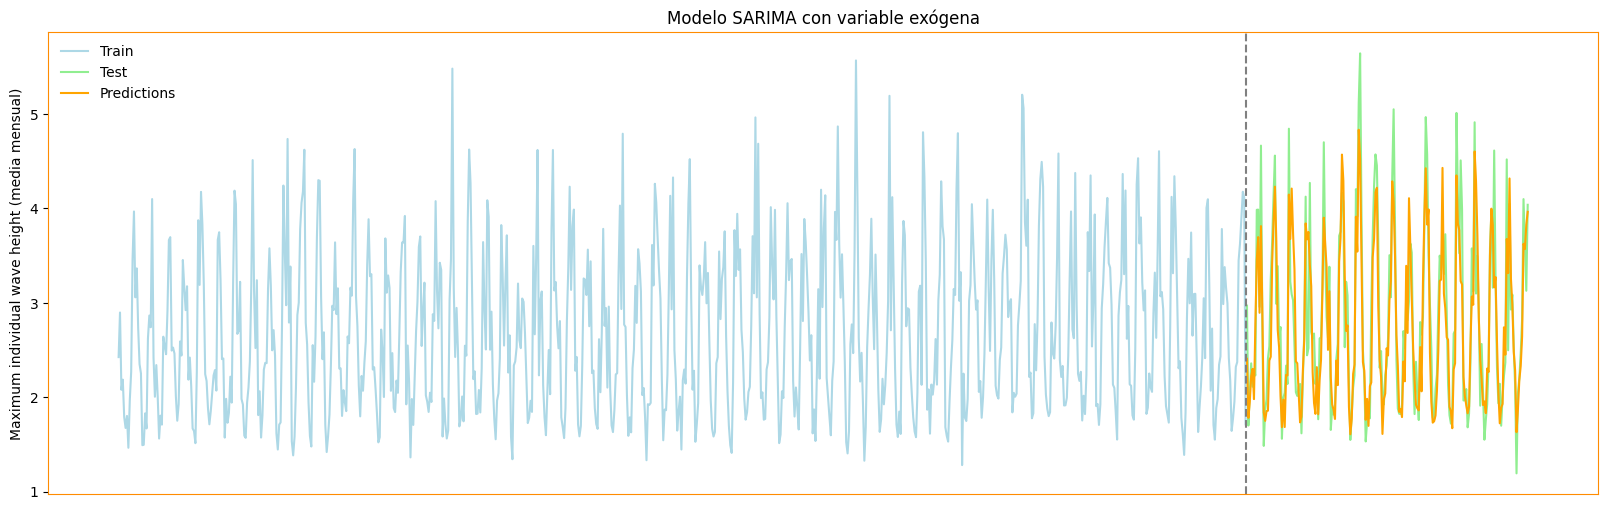

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las variables relevantes
data = df_multivariante[['Maximum individual wave height - media', 'Instantaneous 10 metre wind gust - media']]

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Definir el modelo SARIMAX con la variable endógena y exógena
model = sm.tsa.statespace.SARIMAX(train['Maximum individual wave height - media'],
                                  exog=train['Instantaneous 10 metre wind gust - media'],
                                  order=(2, 1, 1),
                                  seasonal_order=(3, 1, 0, 12))

# Ajustar el modelo
model_fit = model.fit()

# Realizar predicciones en el conjunto de entrenamiento
train_predictions = model_fit.predict(start=0, end=len(train)-1, exog=train['Instantaneous 10 metre wind gust - media'])

# Realizar predicciones en el conjunto de prueba
test_predictions = model_fit.forecast(steps=len(test), exog=test['Instantaneous 10 metre wind gust - media'])

# Calcular el error RMSE en el conjunto de prueba
rmse_train = np.sqrt(mean_squared_error(train['Maximum individual wave height - media'], train_predictions))
rmse_test = np.sqrt(mean_squared_error(test['Maximum individual wave height - media'], test_predictions))

# Calcular R^2
r2_train = r2_score(train['Maximum individual wave height - media'], train_predictions)
r2_test = r2_score(test['Maximum individual wave height - media'], test_predictions)

# Calcular AIC y BIC
def calculate_aic(n, mse, num_params):
    return n * np.log(mse) + 2 * num_params

def calculate_bic(n, mse, num_params):
    return n * np.log(mse) + num_params * np.log(n)

# Número de parámetros
num_params = len(model_fit.params)
aic_train = calculate_aic(len(train['Maximum individual wave height - media']), mean_squared_error(train['Maximum individual wave height - media'], train_predictions), num_params)
aic_test = calculate_aic(len(test['Maximum individual wave height - media']), mean_squared_error(test['Maximum individual wave height - media'], test_predictions), num_params)
bic_train = calculate_bic(len(train['Maximum individual wave height - media']), mean_squared_error(train['Maximum individual wave height - media'], train_predictions), num_params)
bic_test = calculate_bic(len(test['Maximum individual wave height - media']), mean_squared_error(test['Maximum individual wave height - media'], test_predictions), num_params)

# Crear un DataFrame para mostrar los resultados en una tabla
results = pd.DataFrame({
    'Train': [rmse_train, r2_train, aic_train, bic_train],
    'Test': [rmse_test, r2_test, aic_test, bic_test]
}, index=['RMSE', 'R^2', 'AIC', 'BIC'])

print(results)

# Gráfico predicciones vs valores reales
plt.figure(figsize=(20, 6))
plt.plot(train.index, train['Maximum individual wave height - media'], label='Train', color='lightblue')
plt.plot(test.index, test['Maximum individual wave height - media'], label='Test', color='lightgreen')
plt.plot(test.index, test_predictions, label='Predictions', color='orange')

plt.title('Modelo SARIMA con variable exógena')
plt.ylabel('Maximum individual wave height (media mensual)')

# Añadir la línea vertical al final de los datos de entrenamiento
plt.axvline(x=train.index[-1], color='gray', linestyle='--')

plt.legend(loc='upper left', frameon=False)

# Ocultar las etiquetas del eje x
plt.xticks([])

# Cambiar el color del borde del gráfico a naranja
ax_pacf = plt.gca()
for spine in ax_pacf.spines.values():
    spine.set_edgecolor(color_naranja_oscuro)

plt.show()


**Predicciones**

**1. Calculamos la media mensual de los diez últimos años**

In [ ]:
# Convertir el índice a objetos Timestamp si es una cadena
df_multivariante.index = pd.to_datetime(df_multivariante.index, format='%Y-%m-%d')

# Filtrar los datos de los últimos diez años
ten_years_data = df_multivariante[df_multivariante.index >= df_multivariante.index.max() - pd.DateOffset(years=10)]

# Calcular la media mensual de la variable exógena sin considerar el año
monthly_exog_mean = ten_years_data.groupby(ten_years_data.index.month)['Instantaneous 10 metre wind gust - media'].mean()

# Obtener el nombre del mes correspondiente a cada media mensual
month_names = ten_years_data.index.month_name().unique()

# Agregar el nombre del mes como una columna al DataFrame
monthly_exog_mean_with_month = pd.DataFrame({'Month': month_names, 'Mean': monthly_exog_mean.values})

# Mostrar las medias mensuales con el mes correspondiente
print(monthly_exog_mean_with_month)


        Month      Mean
0    February  7.645406
1       March  7.873144
2       April  7.440902
3         May  6.397528
4        June  6.216072
5        July  5.720790
6      August  5.554901
7   September  5.669528
8     October  5.925201
9    November  6.472167
10   December  7.830289
11    January  7.668956


In [ ]:
# Convertir el índice a objetos Timestamp si es una cadena
df_multivariante.index = pd.to_datetime(df_multivariante.index, format='%Y-%m-%d')

# Filtrar los datos de los últimos diez años
ten_years_data = df_multivariante[df_multivariante.index >= df_multivariante.index.max() - pd.DateOffset(years=10)]

# Calcular la media mensual de la variable exógena sin considerar el año
monthly_exog_mean = ten_years_data.groupby(ten_years_data.index.month)['Instantaneous 10 metre wind gust - media'].mean()

# Obtener el nombre del mes correspondiente a cada media mensual
month_names = ten_years_data.index.month_name().unique()

# Agregar el nombre del mes como una columna al DataFrame
monthly_exog_mean_with_month = pd.DataFrame({'Month': month_names, 'Mean': monthly_exog_mean.values})

# Mostrar las medias mensuales con el mes correspondiente
#print(monthly_exog_mean_with_month)

# Obtener solo las medias de marzo a diciembre
monthly_exog_mean_with_month = monthly_exog_mean.loc[3:12]  # Aquí se utilizan los índices del 3 al 12, ambos inclusivos

# Obtener las predicciones para cada mes de los próximos 10 meses
next_predictions = []
for month in range(3, 13):  # Cambiado el rango para que empiece desde marzo (índice 3) hasta diciembre (índice 12)
    next_exog_value = monthly_exog_mean_with_month[month]
    prediction = model_fit.forecast(steps=1, exog=[[next_exog_value]])
    next_predictions.append(prediction[0])

# Mostrar las predicciones de los próximos 10 meses con el mes correspondiente
for i, prediction in enumerate(next_predictions, start=3):  # Comenzamos desde el mes de marzo (índice 3)
    month = i
    print(f"Mes: {month}, Predicción: {prediction}")

Mes: 3, Predicción: 2.5338543543340135
Mes: 4, Predicción: 2.1820734274257156
Mes: 5, Predicción: 2.1208942536867545
Mes: 6, Predicción: 1.953906400278142
Mes: 7, Predicción: 1.8979756805219699
Mes: 8, Predicción: 1.9366230792255155
Mes: 9, Predicción: 2.0228251114663114
Mes: 10, Predicción: 2.207238609362297
Mes: 11, Predicción: 2.6651388645156433
Mes: 12, Predicción: 2.6107441531998923


### **9.Deep Learning - Redes neuronales**

**Red Neuronal - LSTM**

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.1168
Epoch 2/100
1/1 [==============================] - 0s 86ms/step - loss: 0.1013
Epoch 3/100
1/1 [==============================] - 0s 47ms/step - loss: 0.0871
Epoch 4/100
1/1 [==============================] - 0s 66ms/step - loss: 0.0742
Epoch 5/100
1/1 [==============================] - 0s 69ms/step - loss: 0.0629
Epoch 6/100
1/1 [==============================] - 0s 84ms/step - loss: 0.0536
Epoch 7/100
1/1 [==============================] - 0s 76ms/step - loss: 0.0469
Epoch 8/100
1/1 [==============================] - 0s 74ms/step - loss: 0.0436
Epoch 9/100
1/1 [==============================] - 0s 65ms/step - loss: 0.0442
Epoch 10/100
1/1 [==============================] - 0s 52ms/step - loss: 0.0476
Epoch 11/100
1/1 [==============================] - 0s 66ms/step - loss: 0.0508
Epoch 12/100
1/1 [==============================] - 0s 69ms/step - loss: 0.0518
Epoch 13/100
1/1 [==============================] -

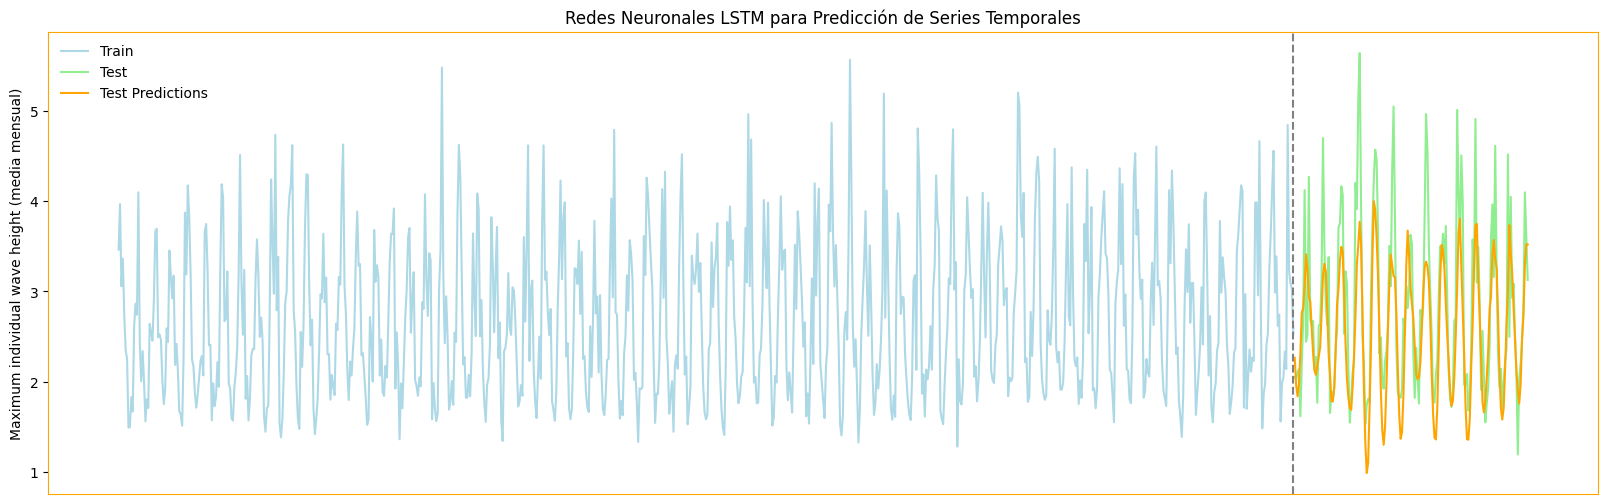

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from keras.models import Sequential
from keras.layers import LSTM, Dense
import math

# Seleccionar las variables relevantes
data = df_Maximum_individual_wave[['Maximum individual wave height - media']]

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Función para crear el dataset adecuado para LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X, y = create_dataset(data_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape para LSTM

# Implementar TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
rmse_train_scores = []
r2_train_scores = []
rmse_test_scores = []
r2_test_scores = []
aic_train_scores = []
bic_train_scores = []
aic_test_scores = []
bic_test_scores = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Crear el modelo LSTM
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=100, batch_size=256, verbose=1)

    # Realizar predicciones
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Invertir la escala de las predicciones y los valores reales
    y_pred_train_inv = scaler.inverse_transform(y_pred_train)
    y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_pred_test_inv = scaler.inverse_transform(y_pred_test)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calcular el error RMSE y R^2 para cada split
    rmse_train = np.sqrt(mean_squared_error(y_train_inv, y_pred_train_inv))
    r2_train = r2_score(y_train_inv, y_pred_train_inv)
    rmse_test = np.sqrt(mean_squared_error(y_test_inv, y_pred_test_inv))
    r2_test = r2_score(y_test_inv, y_pred_test_inv)

    rmse_train_scores.append(rmse_train)
    r2_train_scores.append(r2_train)
    rmse_test_scores.append(rmse_test)
    r2_test_scores.append(r2_test)

    # Calcular AIC y BIC para el conjunto de entrenamiento
    n_train = len(y_train)
    num_params_train = sum([np.prod(w.shape) for w in model.get_weights()])
    mse_train = mean_squared_error(y_train_inv, y_pred_train_inv)
    aic_train = n_train * np.log(mse_train) + 2 * num_params_train
    bic_train = n_train * np.log(mse_train) + num_params_train * np.log(n_train)

    aic_train_scores.append(aic_train)
    bic_train_scores.append(bic_train)

    # Calcular AIC y BIC para el conjunto de prueba
    n_test = len(y_test)
    num_params_test = num_params_train  # Mantener el mismo número de parámetros para AIC y BIC en el conjunto de prueba
    mse_test = mean_squared_error(y_test_inv, y_pred_test_inv)
    aic_test = n_test * np.log(mse_test) + 2 * num_params_test
    bic_test = n_test * np.log(mse_test) + num_params_test * np.log(n_test)

    aic_test_scores.append(aic_test)
    bic_test_scores.append(bic_test)

print('RMSE scores (Train):', rmse_train_scores)
print('Mean RMSE (Train):', np.mean(rmse_train_scores))
print('R^2 scores (Train):', r2_train_scores)
print('Mean R^2 (Train):', np.mean(r2_train_scores))
print('RMSE scores (Test):', rmse_test_scores)
print('Mean RMSE (Test):', np.mean(rmse_test_scores))
print('R^2 scores (Test):', r2_test_scores)
print('Mean R^2 (Test):', np.mean(r2_test_scores))
print('AIC train scores:', aic_train_scores)
print('Mean AIC train:', np.mean(aic_train_scores))
print('BIC train scores:', bic_train_scores)
print('Mean BIC train:', np.mean(bic_train_scores))
print('AIC test scores:', aic_test_scores)
print('Mean AIC test:', np.mean(aic_test_scores))
print('BIC test scores:', bic_test_scores)
print('Mean BIC test:', np.mean(bic_test_scores))

# Graficar los resultados
plt.figure(figsize=(20, 6))
plt.plot(data.index[time_step:len(train_index) + time_step], scaler.inverse_transform(y[train_index].reshape(-1, 1)), label='Train', color='lightblue')
plt.plot(data.index[len(train_index) + time_step:len(train_index) + time_step + len(test_index)], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Test', color='lightgreen')
plt.plot(data.index[len(train_index) + time_step:len(train_index) + time_step + len(test_index)], y_pred_test_inv, label='Test Predictions', color='orange')

plt.title('Redes Neuronales LSTM para Predicción de Series Temporales')
plt.ylabel('Maximum individual wave height (media mensual)')
plt.legend(loc='upper left', frameon=False)

# Añadir la línea vertical al final de los datos de entrenamiento
plt.axvline(x=data.index[len(train_index) + time_step - 1], color='gray', linestyle='--')

# Ocultar las etiquetas del eje x
plt.xticks([])

# Cambiar el color del borde del gráfico a naranja
ax_pacf = plt.gca()
for spine in ax_pacf.spines.values():
    spine.set_edgecolor('orange')

plt.show()

**Predicciones - Modelo LSTM**

In [ ]:
# Función para predecir múltiples pasos futuros
def predict_multiple_future(data, model, scaler, time_step, n_steps):
    temp_input = data[-time_step:]
    future_predictions = []

    for _ in range(n_steps):
        temp_input = temp_input.reshape((1, time_step, 1))
        future_pred = model.predict(temp_input)
        future_pred_inv = scaler.inverse_transform(future_pred)

        future_predictions.append(future_pred_inv[0, 0])

        # Añadir la predicción actual al conjunto de datos para predecir el siguiente paso
        temp_input = np.append(temp_input[:, 1:, :], future_pred.reshape((1, 1, 1)), axis=1)

    return future_predictions

# Definir el número de pasos a predecir
n_steps = 10  # Por ejemplo, predecir los próximos 10 valores

# Obtener las predicciones futuras
future_predictions = predict_multiple_future(data_scaled, model, scaler, time_step, n_steps)

print(f"Predicciones para las próximas {n_steps} fechas: {future_predictions}")


1/1 [==============================] - 0s 21ms/step
Predicciones para las próximas 10 fechas: [2.7327862, 2.2650867, 1.9452312, 1.7225046, 1.7129025, 1.9502527, 2.4122765, 2.8167207, 3.2423565, 3.5911417]


**Red Neuronal - Transformer**

Epoch 1/100
1/1 [==============================] - 22s 22s/step - loss: 0.2673
Epoch 2/100
1/1 [==============================] - 1s 613ms/step - loss: 38.7810
Epoch 3/100
1/1 [==============================] - 1s 632ms/step - loss: 23.6978
Epoch 4/100
1/1 [==============================] - 1s 681ms/step - loss: 12.3728
Epoch 5/100
1/1 [==============================] - 1s 592ms/step - loss: 6.8730
Epoch 6/100
1/1 [==============================] - 1s 573ms/step - loss: 4.3112
Epoch 7/100
1/1 [==============================] - 1s 523ms/step - loss: 2.5118
Epoch 8/100
1/1 [==============================] - 1s 570ms/step - loss: 1.3150
Epoch 9/100
1/1 [==============================] - 1s 516ms/step - loss: 0.3920
Epoch 10/100
1/1 [==============================] - 1s 571ms/step - loss: 0.1208
Epoch 11/100
1/1 [==============================] - 1s 538ms/step - loss: 0.4281
Epoch 12/100
1/1 [==============================] - 0s 482ms/step - loss: 0.9990
Epoch 13/100
1/1 [=================

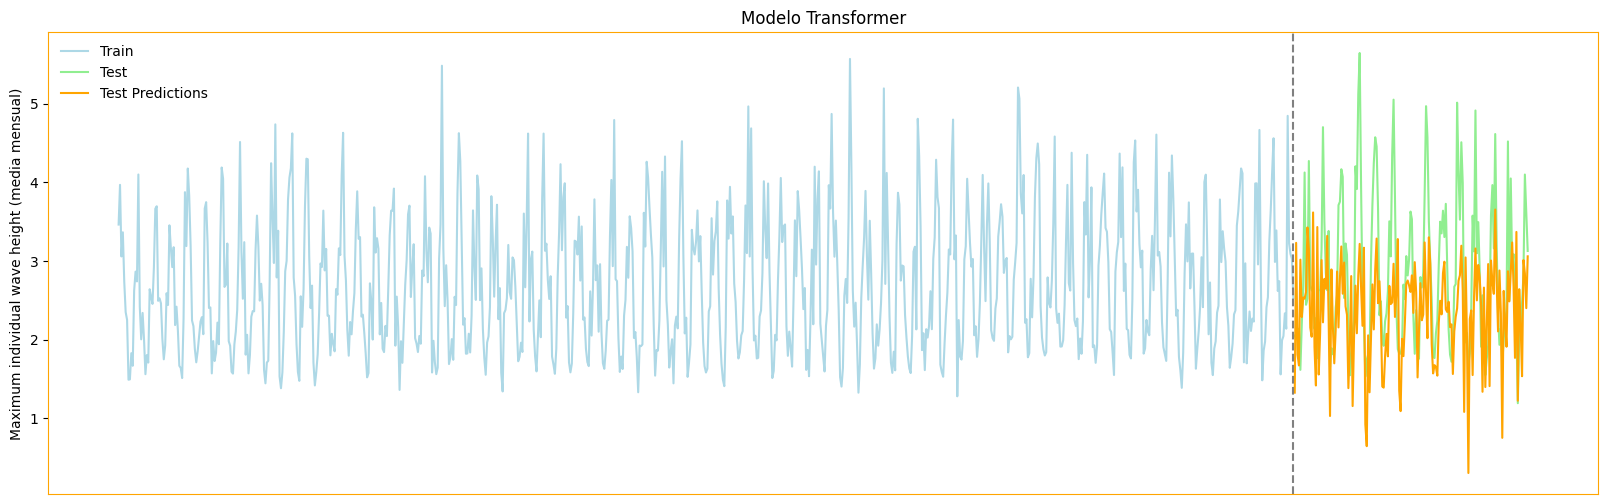

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from keras.models import Model
from keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D, Add
import tensorflow as tf

# Seleccionar las variables relevantes
data = df_Maximum_individual_wave[['Maximum individual wave height - media']]

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Función para crear el dataset adecuado para Transformer
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X, y = create_dataset(data_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape para Transformer

# Función para crear un bloque Transformer
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = Add()([x, inputs])

    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    res = Add()([x, res])
    return res

# Crear el modelo Transformer
def build_model(input_shape, head_size, num_heads, ff_dim, num_blocks, dropout=0):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = GlobalAveragePooling1D(data_format="channels_first")(x)
    x = Dropout(dropout)(x)
    outputs = Dense(1)(x)
    return Model(inputs, outputs)

# Parámetros del modelo
head_size = 256
num_heads = 2
ff_dim = 8
num_blocks = 6
dropout = 0.1

# Implementar TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
rmse_scores_train = []
rmse_scores_test = []
r2_scores_train = []
r2_scores_test = []
aic_scores_train = []
aic_scores_test = []
bic_scores_train = []
bic_scores_test = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Crear el modelo Transformer
    model = build_model(input_shape=(time_step, 1), head_size=head_size, num_heads=num_heads, ff_dim=ff_dim, num_blocks=num_blocks, dropout=dropout)
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=100, batch_size=256, verbose=1)

    # Realizar predicciones
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Invertir la escala de las predicciones y los valores reales
    y_pred_train_inv = scaler.inverse_transform(y_pred_train)
    y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_pred_test_inv = scaler.inverse_transform(y_pred_test)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calcular métricas para entrenamiento y prueba
    rmse_train = np.sqrt(mean_squared_error(y_train_inv, y_pred_train_inv))
    r2_train = r2_score(y_train_inv, y_pred_train_inv)

    rmse_test = np.sqrt(mean_squared_error(y_test_inv, y_pred_test_inv))
    r2_test = r2_score(y_test_inv, y_pred_test_inv)

    rmse_scores_train.append(rmse_train)
    r2_scores_train.append(r2_train)

    rmse_scores_test.append(rmse_test)
    r2_scores_test.append(r2_test)

    # Calcular AIC y BIC para entrenamiento
    n_train = len(y_train_inv)
    k_train = model.count_params()
    residual_sum_of_squares_train = np.sum((y_train_inv - y_pred_train_inv) ** 2)
    aic_train = n_train * np.log(residual_sum_of_squares_train / n_train) + 2 * k_train
    bic_train = n_train * np.log(residual_sum_of_squares_train / n_train) + k_train * np.log(n_train)

    aic_scores_train.append(aic_train)
    bic_scores_train.append(bic_train)

    # Calcular AIC y BIC para prueba
    n_test = len(y_test_inv)
    k_test = model.count_params()
    residual_sum_of_squares_test = np.sum((y_test_inv - y_pred_test_inv) ** 2)
    aic_test = n_test * np.log(residual_sum_of_squares_test / n_test) + 2 * k_test
    bic_test = n_test * np.log(residual_sum_of_squares_test / n_test) + k_test * np.log(n_test)

    aic_scores_test.append(aic_test)
    bic_scores_test.append(bic_test)

print('RMSE Train scores:', rmse_scores_train)
print('Mean RMSE Train:', np.mean(rmse_scores_train))
print('R^2 Train scores:', r2_scores_train)
print('Mean R^2 Train:', np.mean(r2_scores_train))
print('AIC Train scores:', aic_scores_train)
print('Mean AIC Train:', np.mean(aic_scores_train))
print('BIC Train scores:', bic_scores_train)
print('Mean BIC Train:', np.mean(bic_scores_train))
print('')

print('RMSE Test scores:', rmse_scores_test)
print('Mean RMSE Test:', np.mean(rmse_scores_test))
print('R^2 Test scores:', r2_scores_test)
print('Mean R^2 Test:', np.mean(r2_scores_test))
print('AIC Test scores:', aic_scores_test)
print('Mean AIC Test:', np.mean(aic_scores_test))
print('BIC Test scores:', bic_scores_test)
print('Mean BIC Test:', np.mean(bic_scores_test))

# Predicciones
train_predict_plot = np.empty_like(data_scaled)
train_predict_plot[:, :] = np.nan
test_predict_plot = np.empty_like(data_scaled)
test_predict_plot[:, :] = np.nan

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    if i == len(rmse_scores_test) - 1:  # Only plot the last fold
        y_pred_test = model.predict(X_test)
        y_pred_test_inv = scaler.inverse_transform(y_pred_test)
        train_predict_plot[time_step:len(train_index) + time_step] = scaler.inverse_transform(y[train_index].reshape(-1, 1))
        test_predict_plot[len(train_index) + time_step:len(train_index) + time_step + len(test_index)] = y_pred_test_inv

# Graficar los resultados
plt.figure(figsize=(20, 6))
plt.plot(data.index[time_step:len(train_index) + time_step], scaler.inverse_transform(y[train_index].reshape(-1, 1)), label='Train', color='lightblue')
plt.plot(data.index[len(train_index) + time_step:len(train_index) + time_step + len(test_index)], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Test', color='lightgreen')
plt.plot(data.index[len(train_index) + time_step:len(train_index) + time_step + len(test_index)], test_predict_plot[len(train_index) + time_step:len(train_index) + time_step + len(test_index)], label='Test Predictions', color='orange')

plt.title('Modelo Transformer')
plt.ylabel('Maximum individual wave height (media mensual)')
plt.legend(loc='upper left', frameon=False)

# Añadir la línea vertical al final de los datos de entrenamiento
plt.axvline(x=data.index[len(train_index) + time_step - 1], color='gray', linestyle='--')

# Ocultar las etiquetas del eje x
plt.xticks([])

# Cambiar el color del borde del gráfico a naranja
ax_pacf = plt.gca()
for spine in ax_pacf.spines.values():
    spine.set_edgecolor('orange')

plt.show()


Predicciones -  Transforme

In [ ]:
# Función para predecir múltiples pasos futuros
def predict_multiple_future(data, model, scaler, time_step, n_steps):
    temp_input = data[-time_step:]
    future_predictions = []

    for _ in range(n_steps):
        temp_input = temp_input.reshape((1, time_step, 1))
        future_pred = model.predict(temp_input)
        future_pred_inv = scaler.inverse_transform(future_pred)

        future_predictions.append(future_pred_inv[0, 0])

        # Añadir la predicción actual al conjunto de datos para predecir el siguiente paso
        temp_input = np.append(temp_input[:, 1:, :], future_pred.reshape((1, 1, 1)), axis=1)

    return future_predictions

# Definir el número de pasos a predecir
n_steps = 10  # Por ejemplo, predecir los próximos 10 valores

# Obtener las predicciones futuras
future_predictions = predict_multiple_future(data_scaled, model, scaler, time_step, n_steps)

print(f"Predicciones para las próximas {n_steps} fechas: {future_predictions}")

1/1 [==============================] - 0s 36ms/step
Predicciones para las próximas 10 fechas: [2.261693, 0.7085908, 2.5599437, 2.8488307, 2.0303748, 3.6535058, 4.7998524, 1.9045128, 0.9813764, 2.93294]


**Red Neuronal - Gru**

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.1605
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 0.1431
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 0.1271
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 0.1123
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0988
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0866
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0756
Epoch 8/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0660
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0577
Epoch 10/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0508
Epoch 11/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0452
Epoch 12/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0411
Epoch 13/100
1/1 [==============================] -

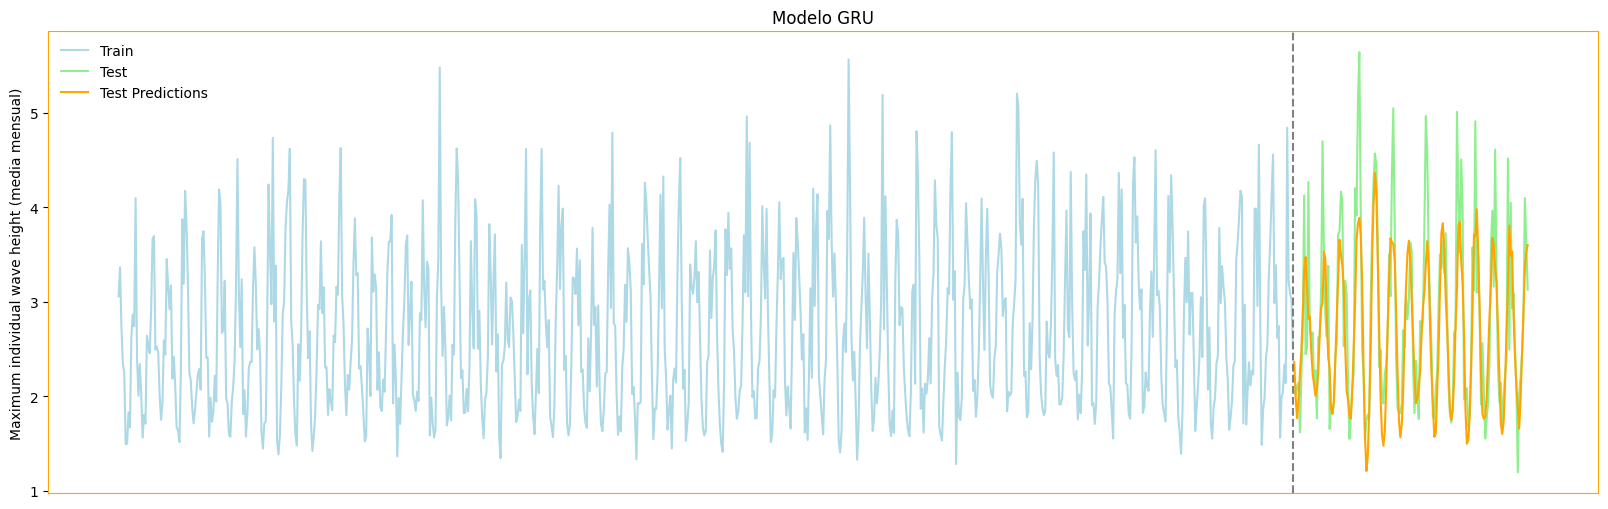

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout

# Seleccionar las variables relevantes
data = df_Maximum_individual_wave[['Maximum individual wave height - media']]

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Función para crear el dataset adecuado para GRU
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 12
X, y = create_dataset(data_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape para GRU

# Implementar TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
rmse_scores_train = []
rmse_scores_test = []
r2_scores_train = []
r2_scores_test = []
aic_scores_train = []
aic_scores_test = []
bic_scores_train = []
bic_scores_test = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Crear el modelo GRU
    model = Sequential()
    model.add(GRU(50, input_shape=(time_step, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=100, batch_size=256, verbose=1)

    # Realizar predicciones
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Invertir la escala de las predicciones y los valores reales
    y_pred_train_inv = scaler.inverse_transform(y_pred_train)
    y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_pred_test_inv = scaler.inverse_transform(y_pred_test)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calcular métricas para entrenamiento y prueba
    rmse_train = np.sqrt(mean_squared_error(y_train_inv, y_pred_train_inv))
    r2_train = r2_score(y_train_inv, y_pred_train_inv)

    rmse_test = np.sqrt(mean_squared_error(y_test_inv, y_pred_test_inv))
    r2_test = r2_score(y_test_inv, y_pred_test_inv)

    rmse_scores_train.append(rmse_train)
    r2_scores_train.append(r2_train)

    rmse_scores_test.append(rmse_test)
    r2_scores_test.append(r2_test)

    # Calcular AIC y BIC para entrenamiento
    n_train = len(y_train_inv)
    k_train = model.count_params()
    residual_sum_of_squares_train = np.sum((y_train_inv - y_pred_train_inv) ** 2)
    aic_train = n_train * np.log(residual_sum_of_squares_train / n_train) + 2 * k_train
    bic_train = n_train * np.log(residual_sum_of_squares_train / n_train) + k_train * np.log(n_train)

    aic_scores_train.append(aic_train)
    bic_scores_train.append(bic_train)

    # Calcular AIC y BIC para prueba
    n_test = len(y_test_inv)
    k_test = model.count_params()
    residual_sum_of_squares_test = np.sum((y_test_inv - y_pred_test_inv) ** 2)
    aic_test = n_test * np.log(residual_sum_of_squares_test / n_test) + 2 * k_test
    bic_test = n_test * np.log(residual_sum_of_squares_test / n_test) + k_test * np.log(n_test)

    aic_scores_test.append(aic_test)
    bic_scores_test.append(bic_test)

print('RMSE Train scores:', rmse_scores_train)
print('Mean RMSE Train:', np.mean(rmse_scores_train))
print('R^2 Train scores:', r2_scores_train)
print('Mean R^2 Train:', np.mean(r2_scores_train))
print('AIC Train scores:', aic_scores_train)
print('Mean AIC Train:', np.mean(aic_scores_train))
print('BIC Train scores:', bic_scores_train)
print('Mean BIC Train:', np.mean(bic_scores_train))
print('')

print('RMSE Test scores:', rmse_scores_test)
print('Mean RMSE Test:', np.mean(rmse_scores_test))
print('R^2 Test scores:', r2_scores_test)
print('Mean R^2 Test:', np.mean(r2_scores_test))
print('AIC Test scores:', aic_scores_test)
print('Mean AIC Test:', np.mean(aic_scores_test))
print('BIC Test scores:', bic_scores_test)
print('Mean BIC Test:', np.mean(bic_scores_test))

# Predicciones
train_predict_plot = np.empty_like(data_scaled)
train_predict_plot[:, :] = np.nan
test_predict_plot = np.empty_like(data_scaled)
test_predict_plot[:, :] = np.nan

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    if i == len(rmse_scores_test) - 1:  # Only plot the last fold
        y_pred_test = model.predict(X_test)
        y_pred_test_inv = scaler.inverse_transform(y_pred_test)
        train_predict_plot[time_step:len(train_index) + time_step] = scaler.inverse_transform(y[train_index].reshape(-1, 1))
        test_predict_plot[len(train_index) + time_step:len(train_index) + time_step + len(test_index)] = y_pred_test_inv

# Graficar los resultados
plt.figure(figsize=(20, 6))
plt.plot(data.index[time_step:len(train_index) + time_step], scaler.inverse_transform(y[train_index].reshape(-1, 1)), label='Train', color='lightblue')
plt.plot(data.index[len(train_index) + time_step:len(train_index) + time_step + len(test_index)], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Test', color='lightgreen')
plt.plot(data.index[len(train_index) + time_step:len(train_index) + time_step + len(test_index)], test_predict_plot[len(train_index) + time_step:len(train_index) + time_step + len(test_index)], label='Test Predictions', color='orange')

plt.title('Modelo GRU')
plt.ylabel('Maximum individual wave height (media mensual)')
plt.legend(loc='upper left', frameon=False)

# Añadir la línea vertical al final de los datos de entrenamiento
plt.axvline(x=data.index[len(train_index) + time_step - 1], color='gray', linestyle='--')

# Ocultar las etiquetas del eje x
plt.xticks([])

# Cambiar el color del borde del gráfico a naranja
ax_pacf = plt.gca()
for spine in ax_pacf.spines.values():
    spine.set_edgecolor('orange')

plt.show()


**Predicciones - Gru**

In [ ]:
# Función para predecir múltiples pasos futuros
def predict_multiple_future(data, model, scaler, time_step, n_steps):
    temp_input = data[-time_step:]
    future_predictions = []

    for _ in range(n_steps):
        temp_input = temp_input.reshape((1, time_step, 1))
        future_pred = model.predict(temp_input)
        future_pred_inv = scaler.inverse_transform(future_pred)

        future_predictions.append(future_pred_inv[0, 0])

        # Añadir la predicción actual al conjunto de datos para predecir el siguiente paso
        temp_input = np.append(temp_input[:, 1:, :], future_pred.reshape((1, 1, 1)), axis=1)

    return future_predictions

# Definir el número de pasos a predecir
n_steps = 10  # Por ejemplo, predecir los próximos 10 valores

# Obtener las predicciones futuras
future_predictions = predict_multiple_future(data_scaled, model, scaler, time_step, n_steps)

print(f"Predicciones para las próximas {n_steps} fechas: {future_predictions}")

1/1 [==============================] - 0s 19ms/step
Predicciones para las próximas 10 fechas: [2.9094517, 2.3783998, 1.9300686, 1.6674044, 1.7589507, 1.9928087, 2.4169998, 2.934107, 3.4040895, 3.543785]


### 10.Lectura de datos desde enero hasta abril de 2024.

**Número de variables y mensajes (datos) de las variables en el fichero GRIB de Copernicus.**

In [ ]:
# ruta del fichero GRIB
#ruta_fichero = '/Users/montse/01_DATOS/01_ESTUDIOS/02_MASTER_VIU/21_TFM/01_Convocatoria_2023_2024/04_Codigo/14MBID_TFM_datos_version3.grib'
ruta_fichero = '/content/drive/MyDrive/VIU_Master Big Data/14 TFM/04_Codigo/datos_olas_2024.grib'

# Abrir el fichero GRIB
fichero_grib = pygrib.open(ruta_fichero)

# Listar para almacenar las variables
variables = []

# Diccionario para almacenar el número de mensajes por variable
mensajes_por_variable = {}

# Iterar sobre cada mensaje en el archivo GRIB
for grb in fichero_grib:

    variable = grb.name # nombre de la variable del mensaje

    if grb.name not in variables:
        variables.append(grb.name)

    if variable in mensajes_por_variable: # si la variable ya está en el diccionario, incrementa su conteo
        mensajes_por_variable[variable] += 1

    else: # si no está en el diccionario, inicializa su conteo en 1
        mensajes_por_variable[variable] = 1

# Número de variables del estudio
print(f'\033[1mNúmero total de variables del fichero grib:\033[0m {len(variables)} variables\n')

# Imprimir el número de mensajes por variable
for variable, conteo in mensajes_por_variable.items():
    print(f'Número de mensajes para la variable \033[1m{variable}\033[0m: {conteo} mensajes')

# Cerrar el fichero grib
fichero_grib.close()

Número total de variables del fichero grib: 1 variables

Número de mensajes para la variable Maximum individual wave height: 4 mensajes


**Extracción de los datos.**

In [ ]:
# ruta del fichero GRIB
#ruta_fichero = '/Users/montse/01_DATOS/01_ESTUDIOS/02_MASTER_VIU/21_TFM/01_Convocatoria_2023_2024/04_Codigo/14MBID_TFM_datos_version3.grib'
ruta_fichero = '/content/drive/MyDrive/VIU_Master Big Data/14 TFM/04_Codigo/datos_olas_2024.grib'

# Abrir el fichero GRIB
fichero_grib = pygrib.open(ruta_fichero)

# Diccionario para almacenar toda la información necesaria para nuestro estudio
datos = {}

for grb in fichero_grib:

    if grb.validDate not in datos:
        datos[grb.validDate] = {} # diccionario para guardar los datos por fecha

    datos[grb.validDate][grb.name + ' - media'] = grb.average
    datos[grb.validDate][grb.name + ' - dsv'] = grb.standardDeviation

# Cerrar el fichero grib
fichero_grib.close()

df_datos = pd.DataFrame(datos)
df_datos = df_datos.T
df_datos

Maximum individual wave height - media  \
2024-01-01                                3.192981   
2024-02-01                                4.010954   
2024-03-01                                3.588132   
2024-04-01                                2.357650   

            Maximum individual wave height - dsv  
2024-01-01                              0.059647  
2024-02-01                              0.074628  
2024-03-01                              0.076918  
2024-04-01                              0.031830

**Guardar el dataset df_datos en un fichero csv.**

In [ ]:
df_datos.to_csv('/content/drive/MyDrive/VIU_Master Big Data/14 TFM/04_Codigo/dataset_original.csv', index=True)